In [330]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [331]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/PCA/genetic_effects/PCA15/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()

ENSG00000006282-17_48615329_G_A  \
iudw_1-d30-cluster0                        -0.501317   
iudw_1-d30-cluster1                        -0.142076   
iudw_1-d30-cluster2                        -0.287011   
iudw_1-d30-cluster3                        -0.133622   
iudw_1-d30-cluster4                        -0.301572   

                     ENSG00000007341-1_113094022_G_A  \
iudw_1-d30-cluster0                         0.058329   
iudw_1-d30-cluster1                         0.058329   
iudw_1-d30-cluster2                         0.058329   
iudw_1-d30-cluster3                         0.058329   
iudw_1-d30-cluster4                         0.058329   

                     ENSG00000008988-8_56894421_G_T  \
iudw_1-d30-cluster0                        0.179719   
iudw_1-d30-cluster1                        0.179719   
iudw_1-d30-cluster2                        0.179719   
iudw_1-d30-cluster3                        0.179719   
iudw_1-d30-cluster4                        0.179719   

                     ENSG00000008988-8_56969683_T_C  \
iudw_1-d30-cluster0                        0.133432   
iudw_1-d30-cluster1                        0.133432   
iudw_1-d30-cluster2                        0.133432   
iudw_1-d30-cluster3                        0.133432   
iudw_1-d30-cluster4                        0.133432   

                     ENSG00000008988-8_56996675_C_T  \
iudw_1-d30-cluster0                        0.156494   
iudw_1-d30-cluster1                        0.156494   
iudw_1-d30-cluster2                        0.156494   
iudw_1-d30-cluster3                        0.156494   
iudw_1-d30-cluster4                        0.156494   

                     ENSG00000013573-12_31255263_G_A  \
iudw_1-d30-cluster0                        -0.181765   
iudw_1-d30-cluster1                        -0.107176   
iudw_1-d30-cluster2                        -0.127814   
iudw_1-d30-cluster3                        -0.096777   
iudw_1-d30-cluster4                        -0.136981   

                     ENSG00000013573-12_31265823_A_G  \
iudw_1-d30-cluster0                        -0.197696   
iudw_1-d30-cluster1                        -0.102986   
iudw_1-d30-cluster2                        -0.129005   
iudw_1-d30-cluster3                        -0.098300   
iudw_1-d30-cluster4                        -0.143126   

                     ENSG00000013573-12_31265925_C_G  \
iudw_1-d30-cluster0                        -0.190428   
iudw_1-d30-cluster1                        -0.098681   
iudw_1-d30-cluster2                        -0.127176   
iudw_1-d30-cluster3                        -0.096756   
iudw_1-d30-cluster4                        -0.137248   

                     ENSG00000016391-3_53855083_C_T  \
iudw_1-d30-cluster0                       -0.191986   
iudw_1-d30-cluster1                       -0.142761   
iudw_1-d30-cluster2                       -0.178326   
iudw_1-d30-cluster3                       -0.110505   
iudw_1-d30-cluster4                       -0.105622   

                     ENSG00000042317-14_88827433_G_A  ...  \
iudw_1-d30-cluster0                         0.122295  ...   
iudw_1-d30-cluster1                         0.122295  ...   
iudw_1-d30-cluster2                         0.122295  ...   
iudw_1-d30-cluster3                         0.122295  ...   
iudw_1-d30-cluster4                         0.122295  ...   

                     ENSG00000258315-17_6876860_A_G  \
iudw_1-d30-cluster0                        0.152599   
iudw_1-d30-cluster1                        0.152599   
iudw_1-d30-cluster2                        0.152599   
iudw_1-d30-cluster3                        0.152599   
iudw_1-d30-cluster4                        0.152599   

                     ENSG00000258315-17_6892812_G_C  \
iudw_1-d30-cluster0                        0.348075   
iudw_1-d30-cluster1                        0.149051   
iudw_1-d30-cluster2                        0.281384   
iudw_1-d30-cluster3                        0.291213   
iudw_1-d30-cluster4                    

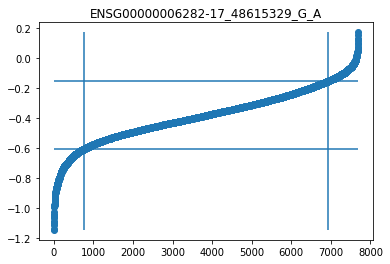

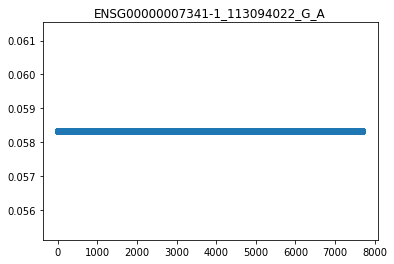

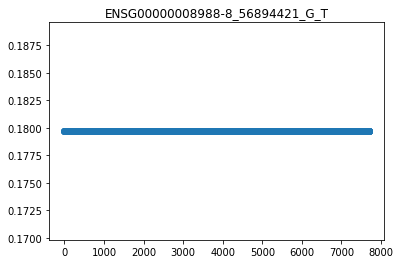

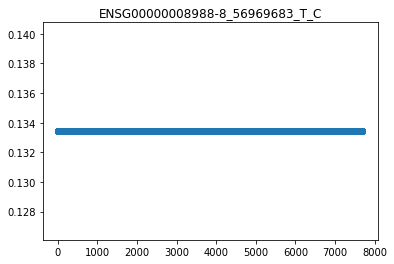

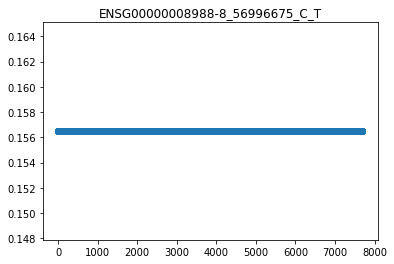

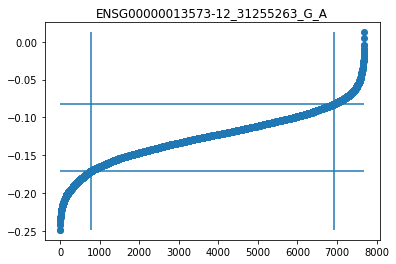

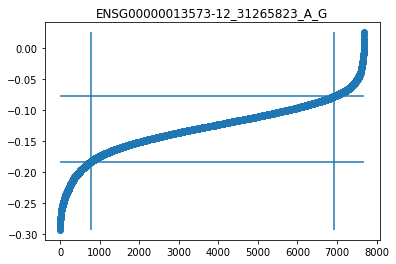

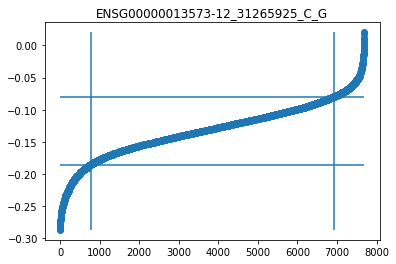

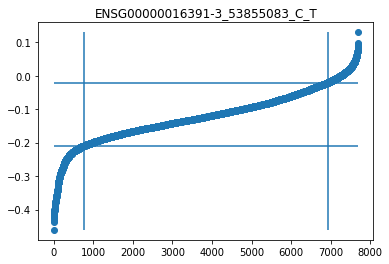

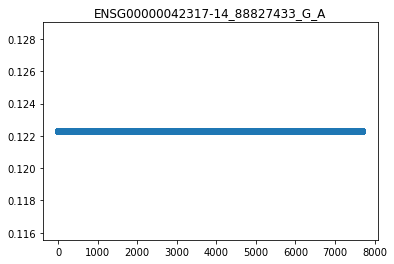

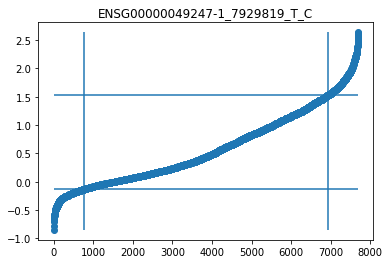

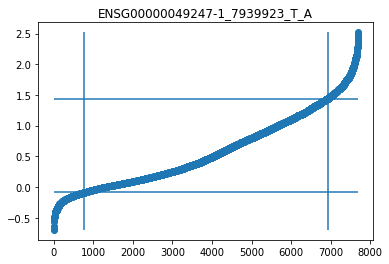

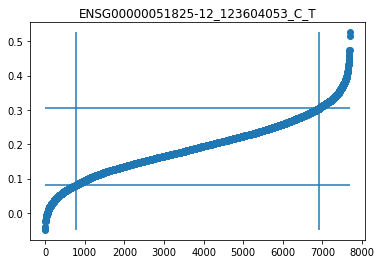

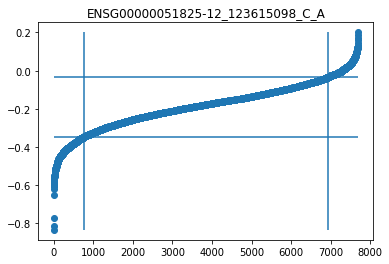

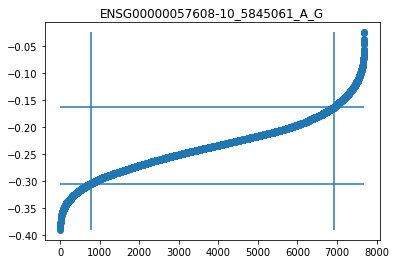

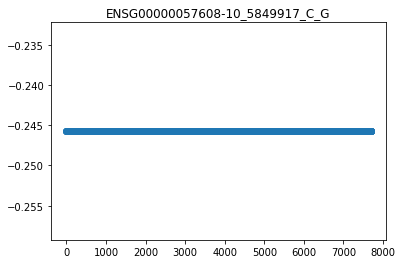

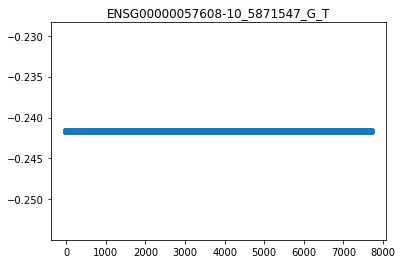

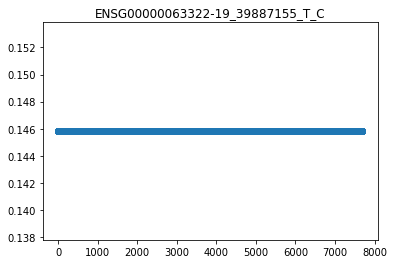

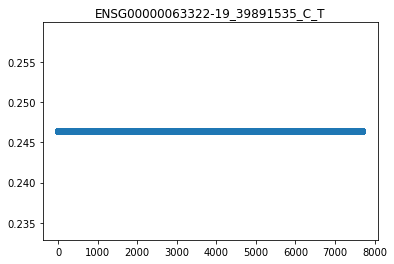

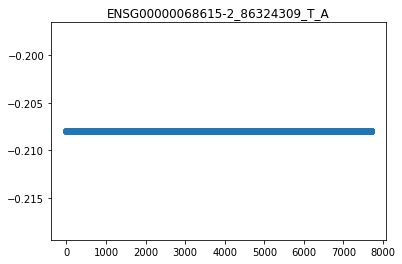

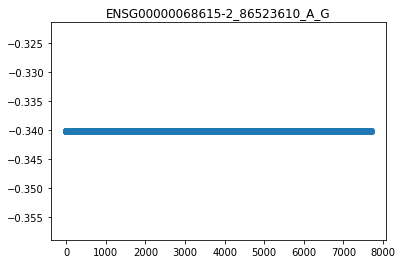

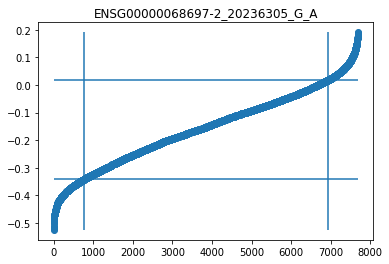

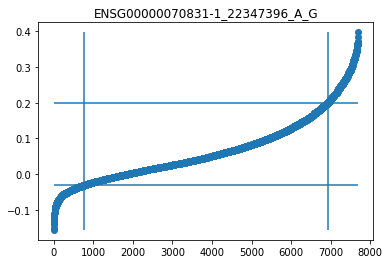

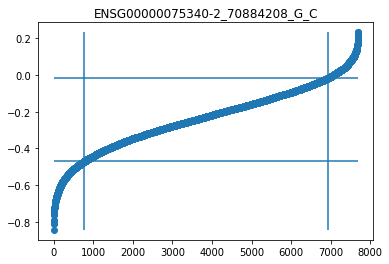

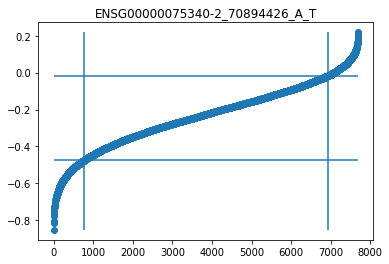

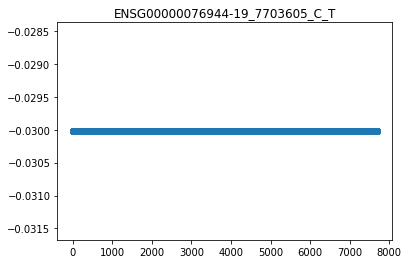

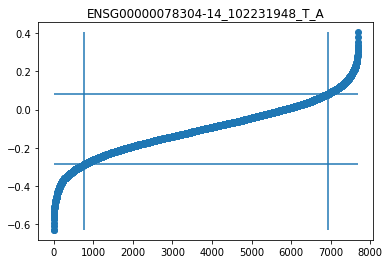

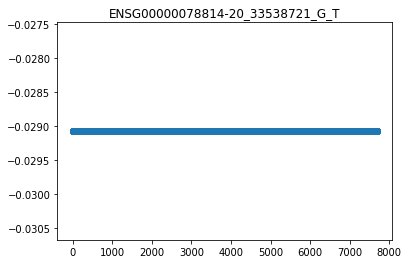

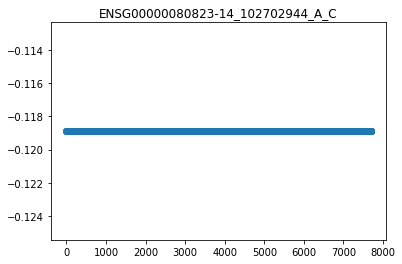

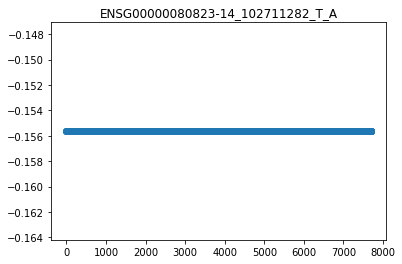

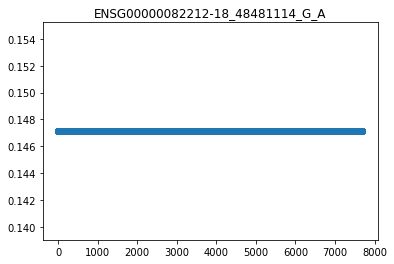

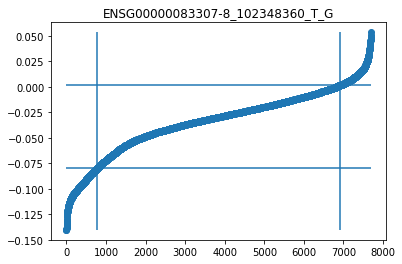

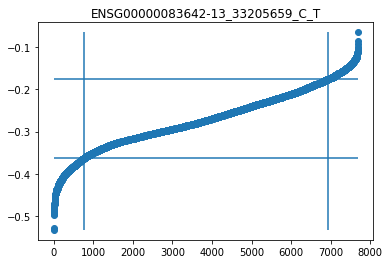

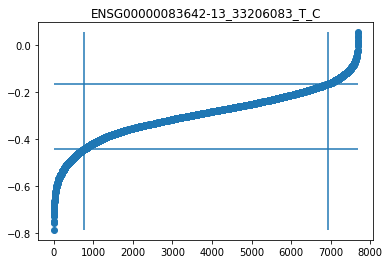

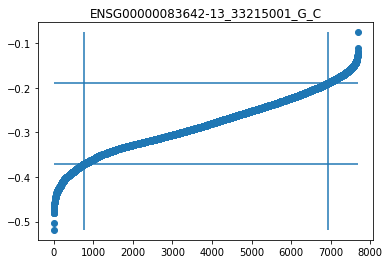

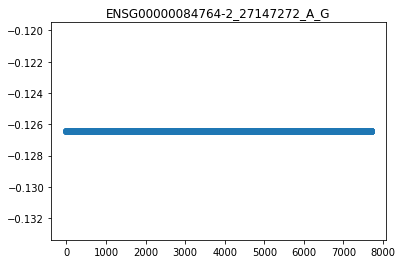

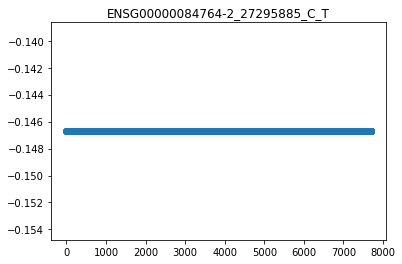

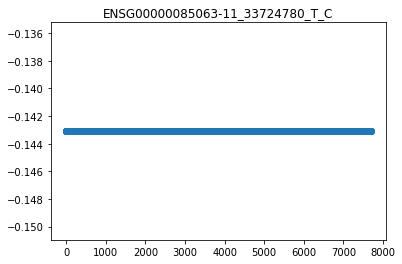

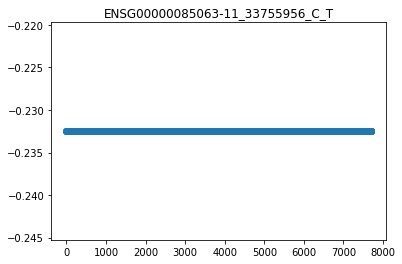

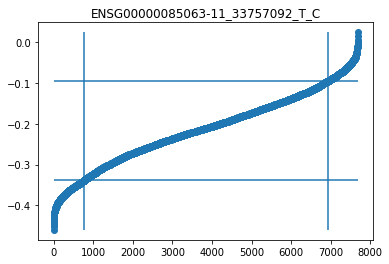

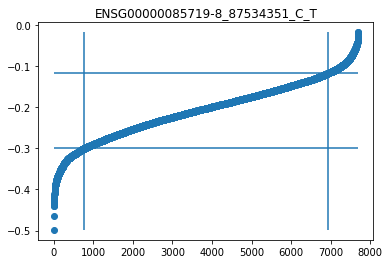

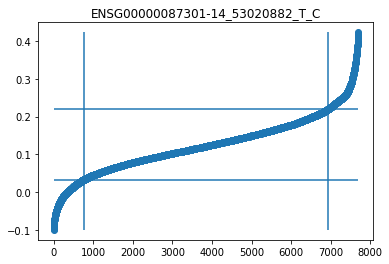

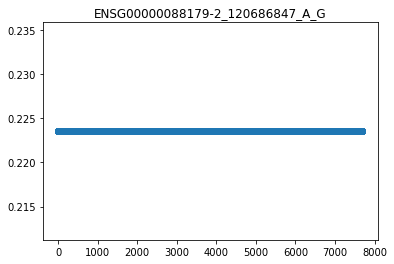

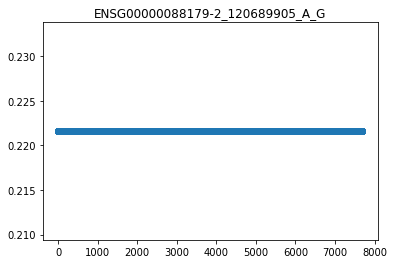

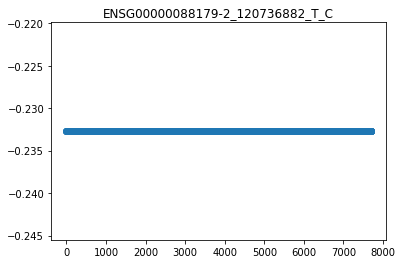

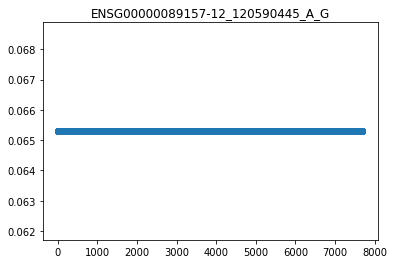

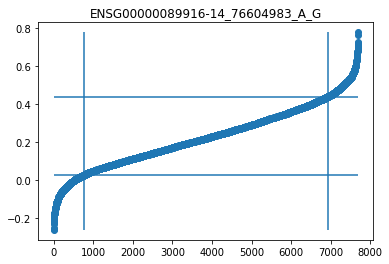

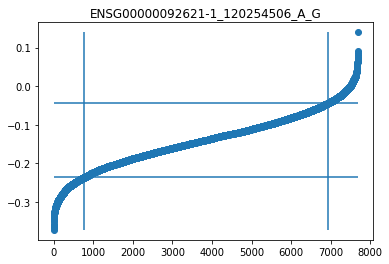

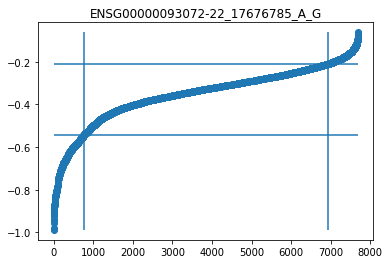

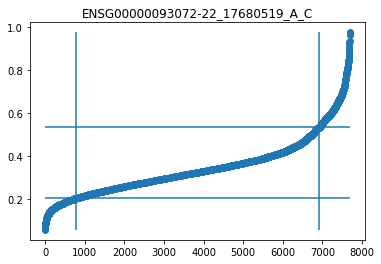

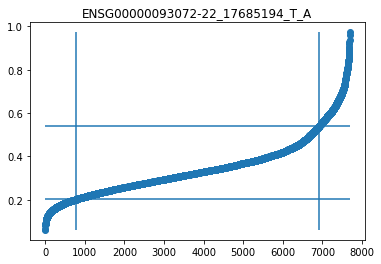

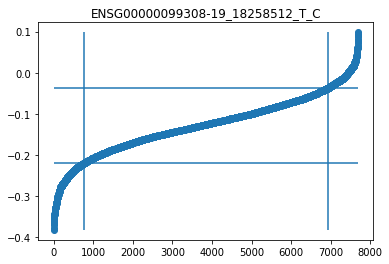

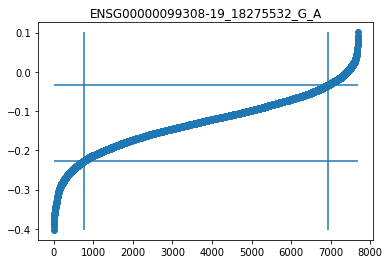

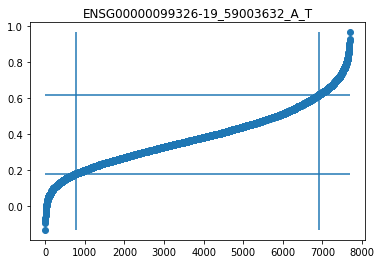

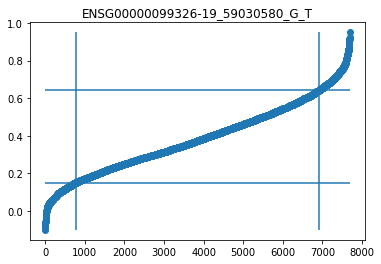

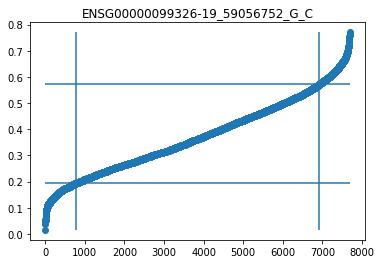

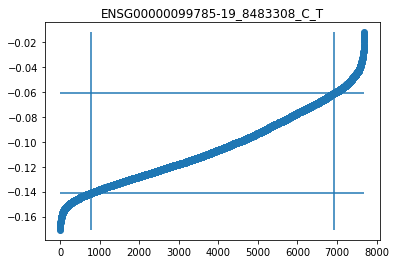

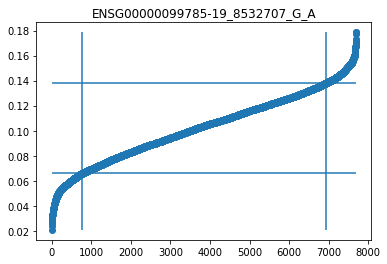

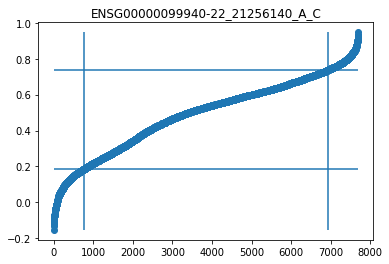

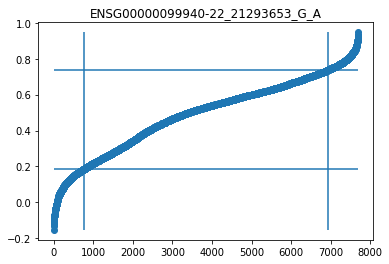

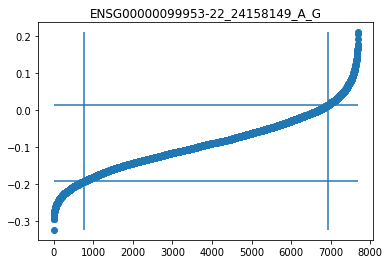

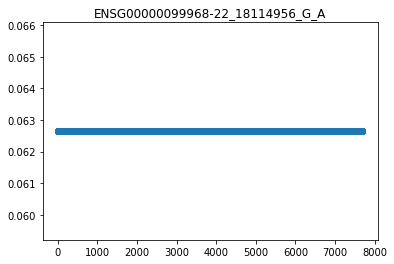

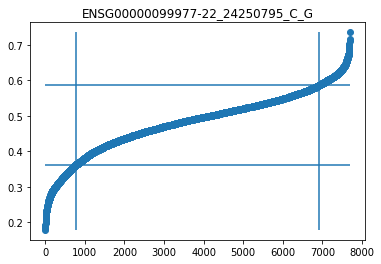

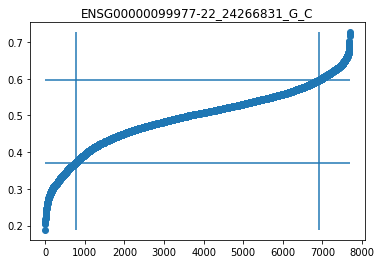

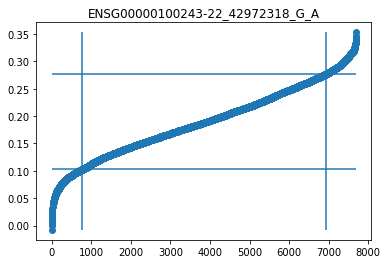

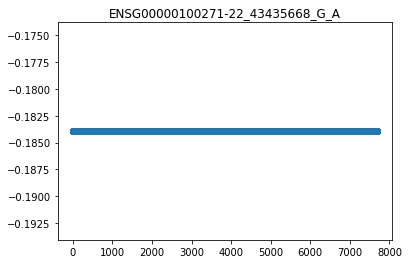

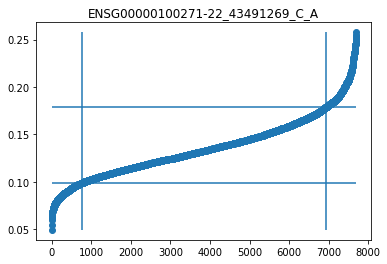

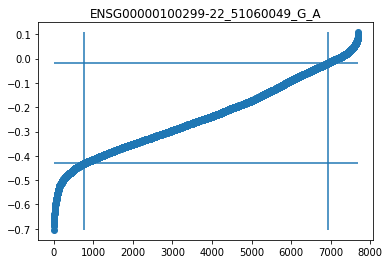

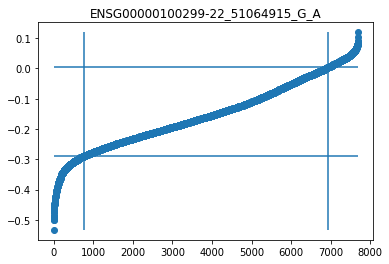

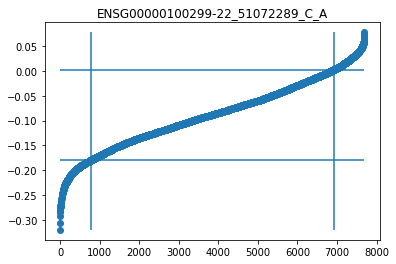

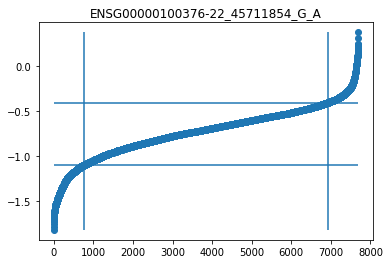

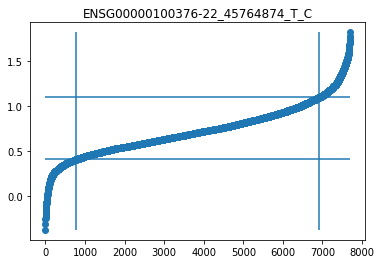

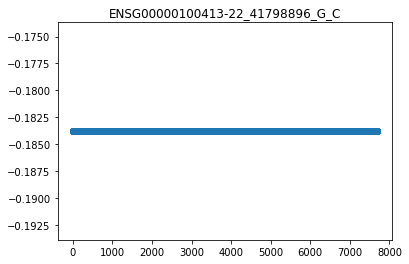

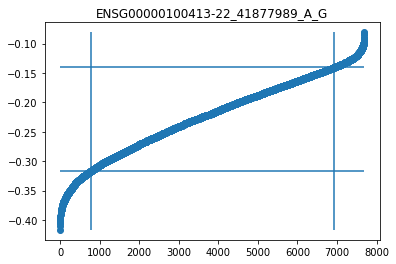

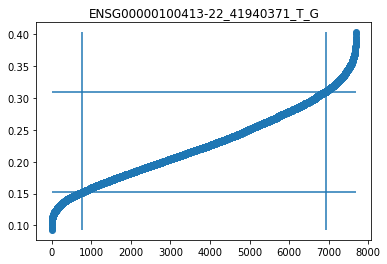

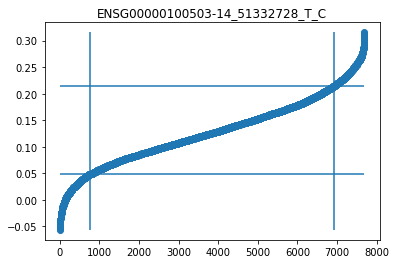

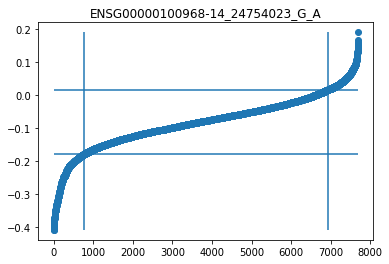

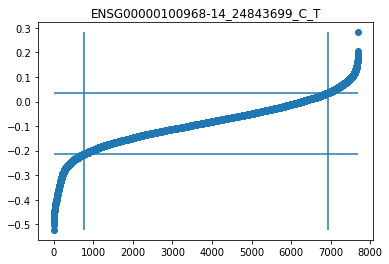

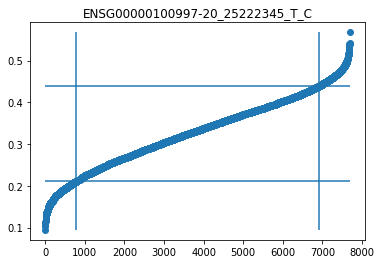

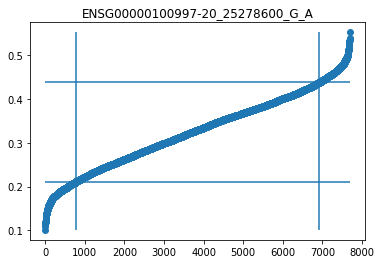

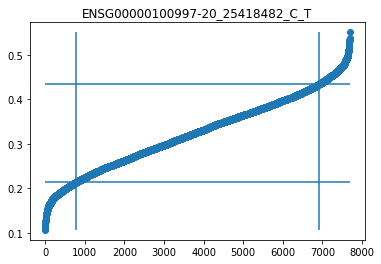

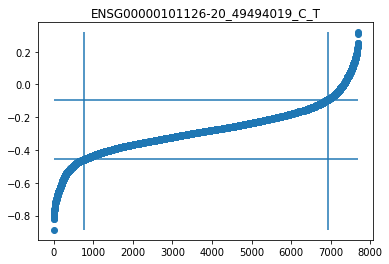

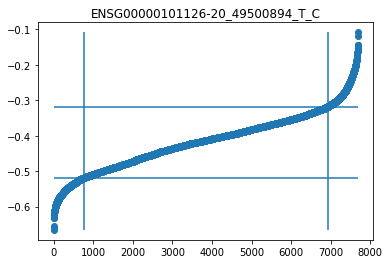

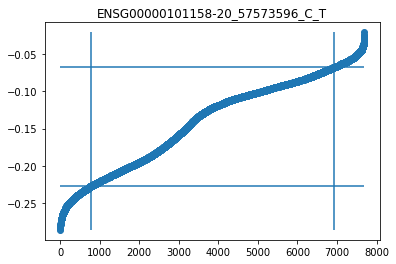

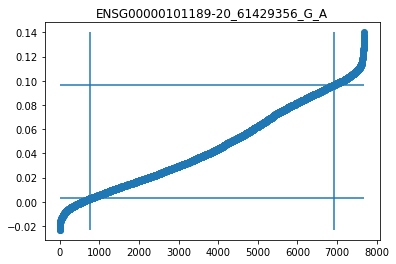

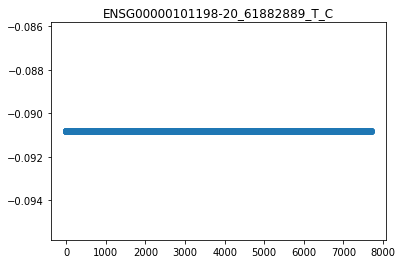

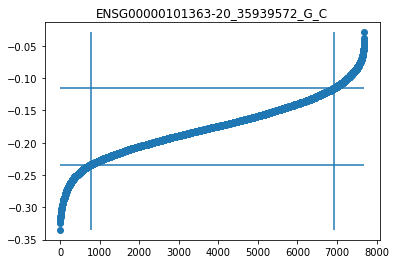

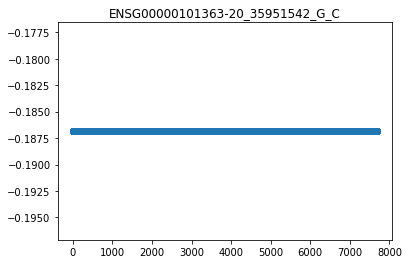

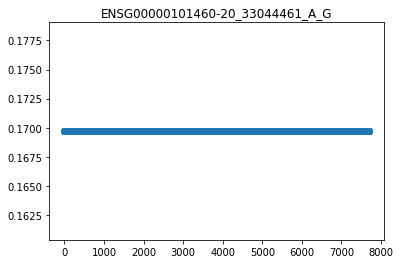

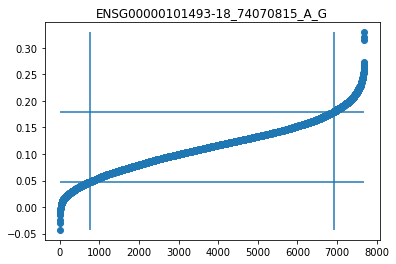

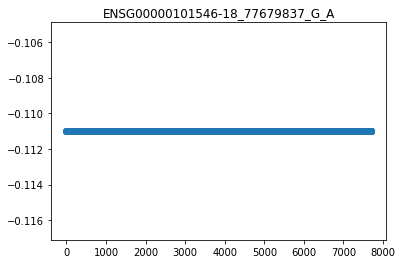

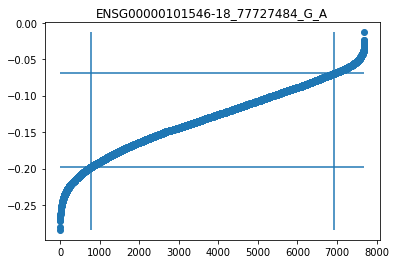

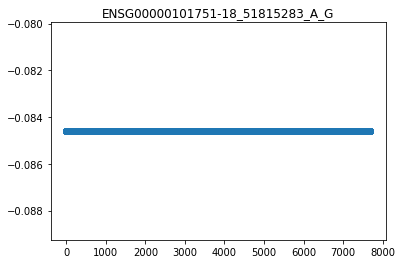

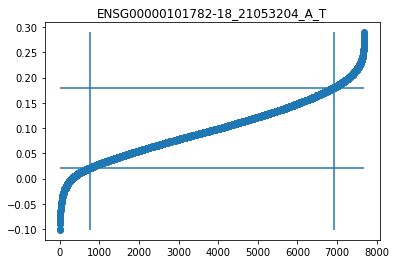

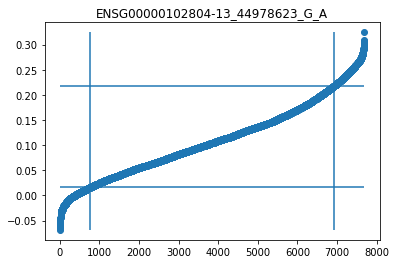

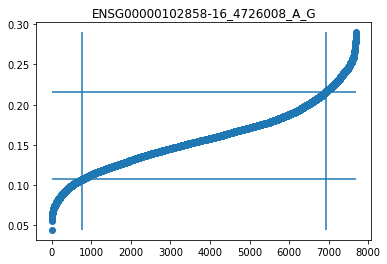

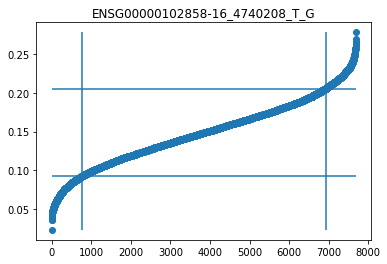

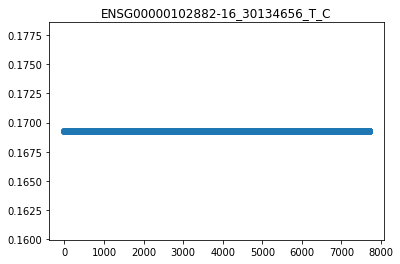

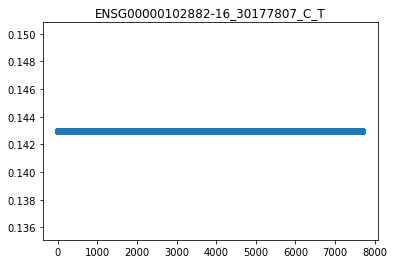

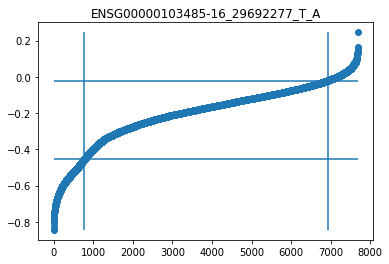

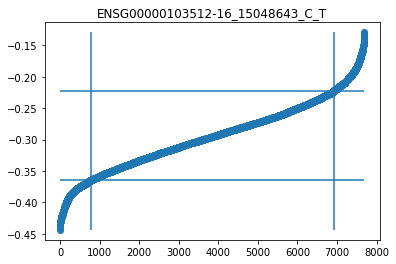

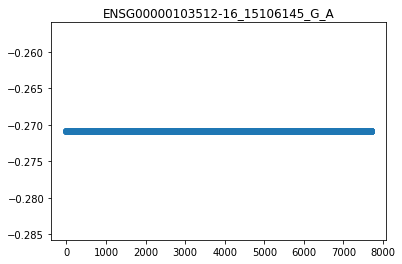

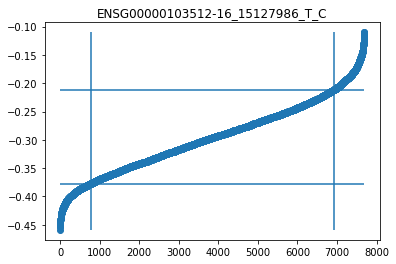

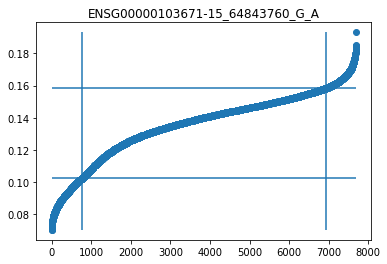

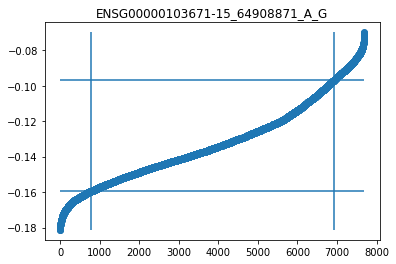

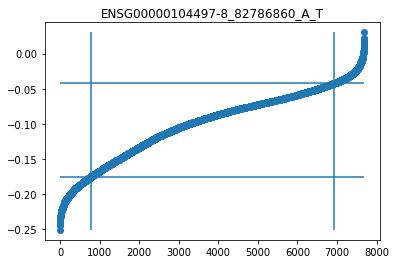

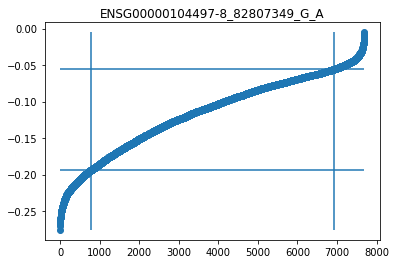

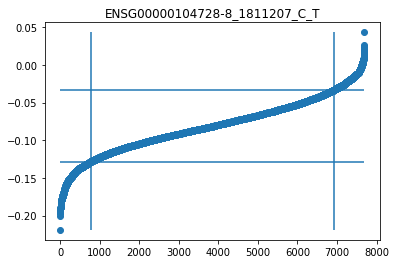

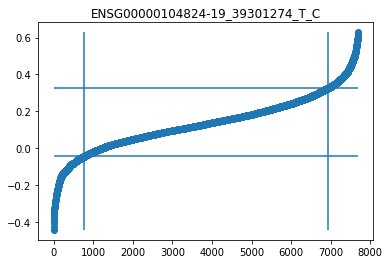

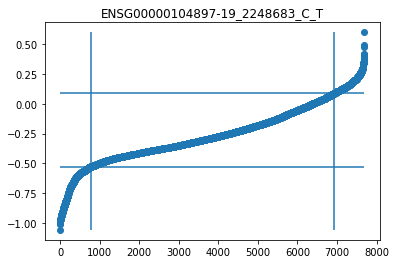

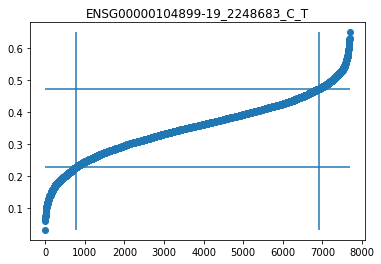

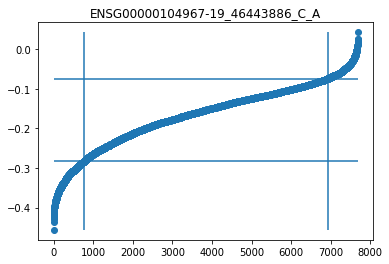

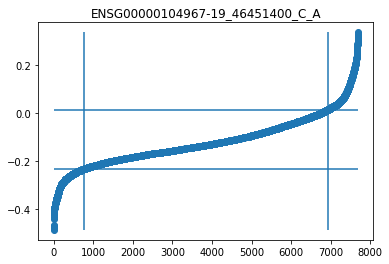

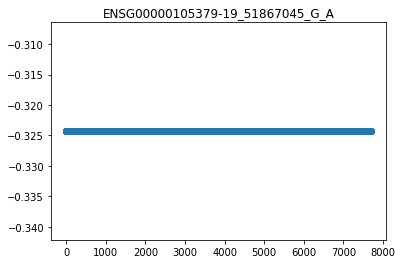

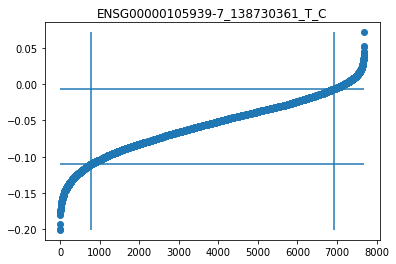

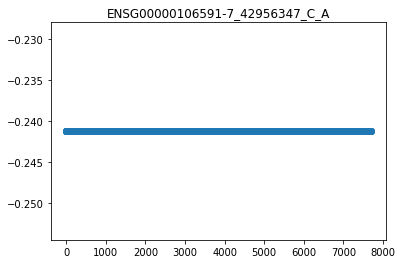

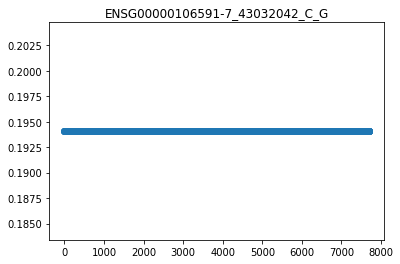

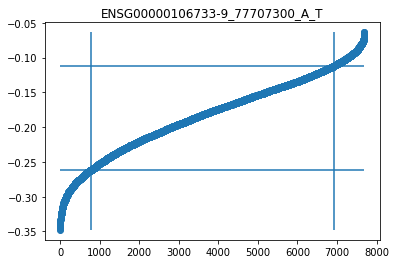

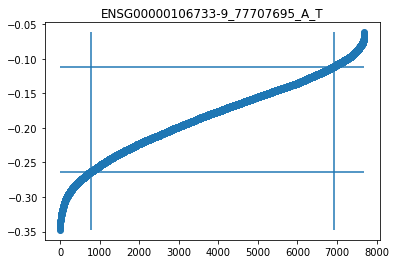

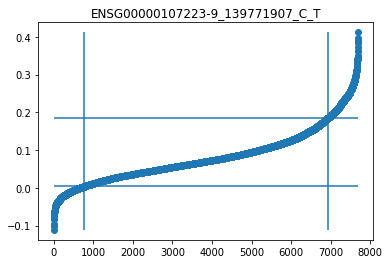

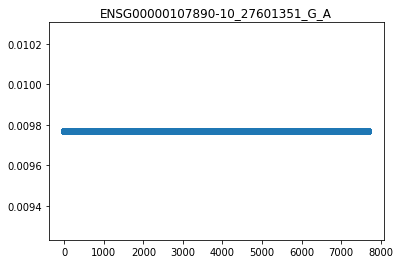

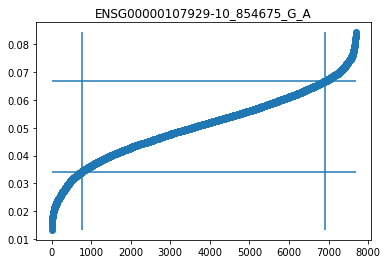

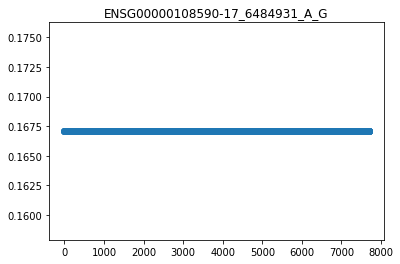

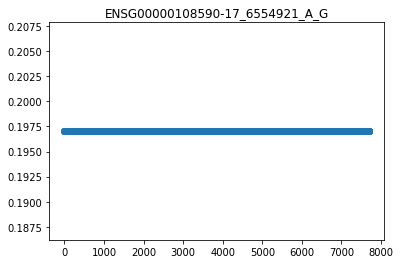

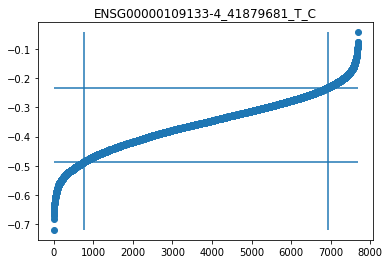

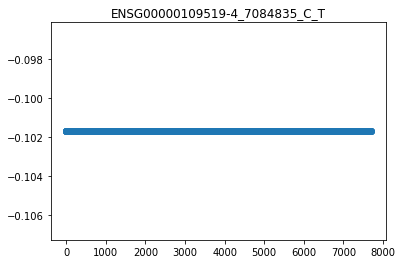

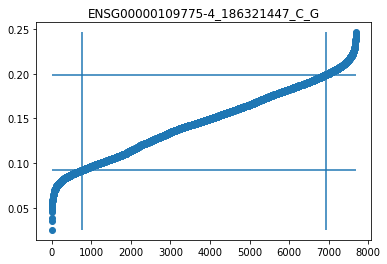

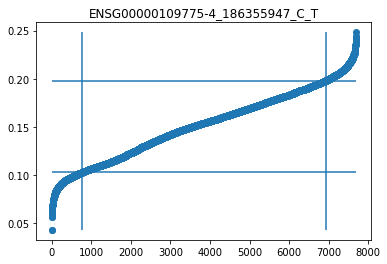

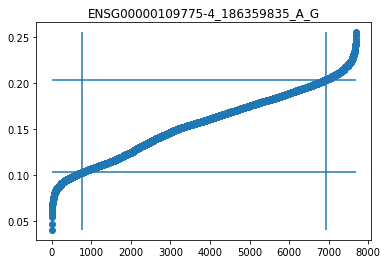

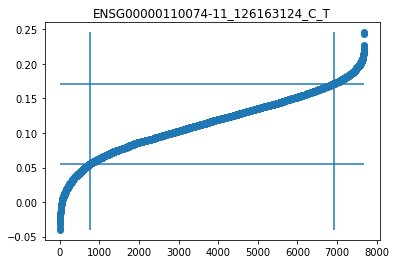

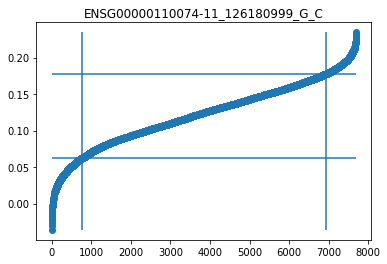

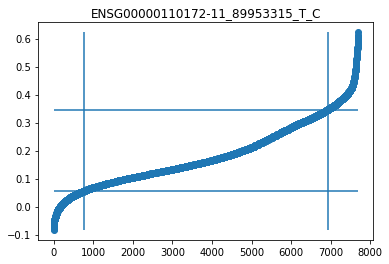

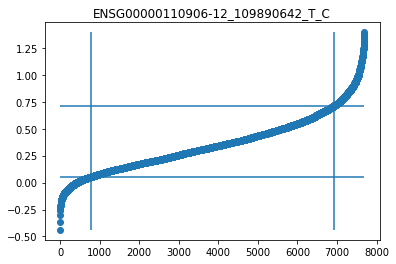

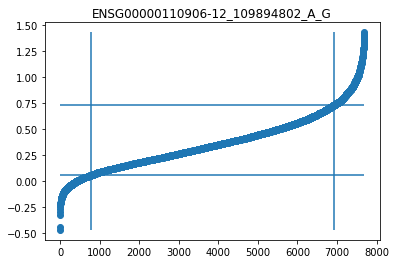

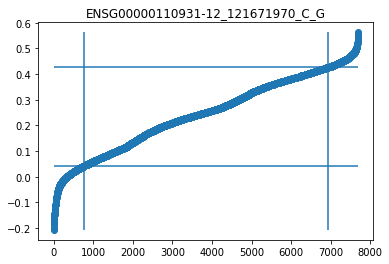

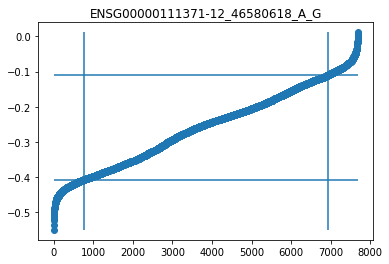

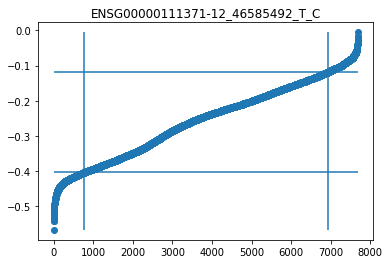

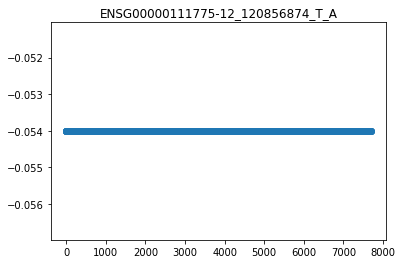

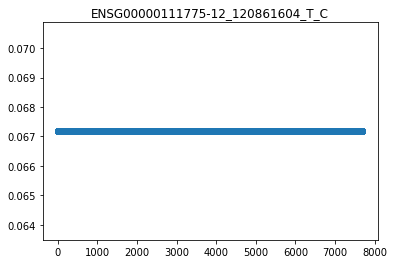

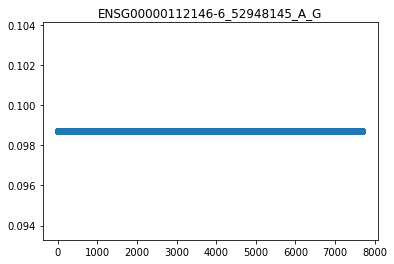

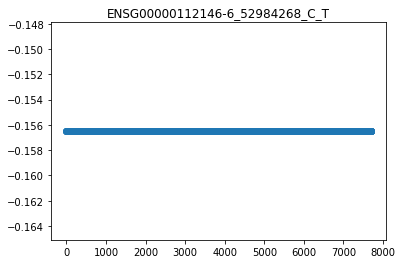

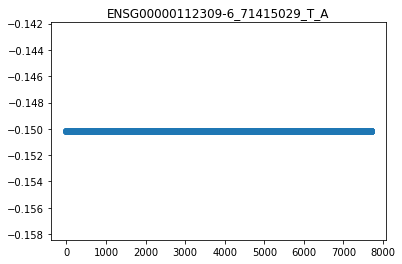

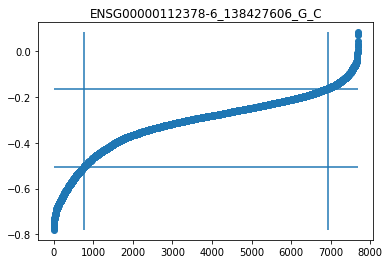

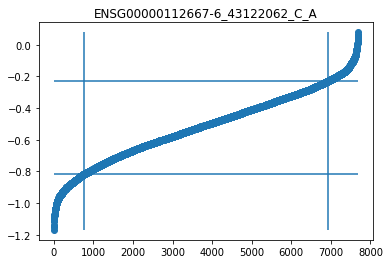

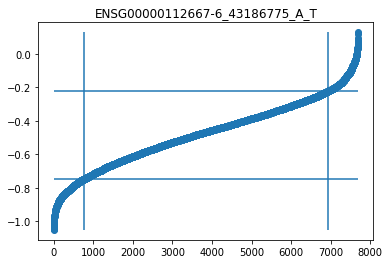

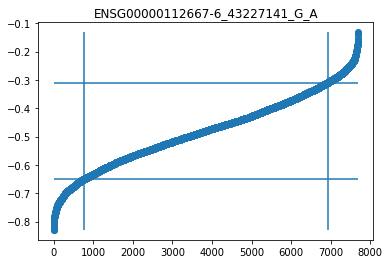

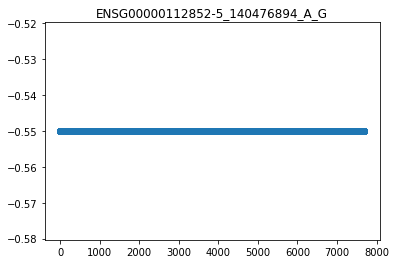

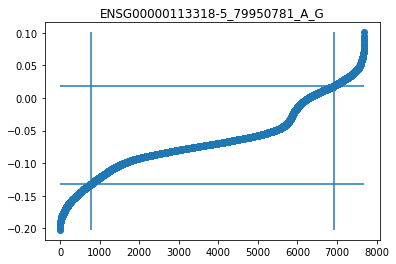

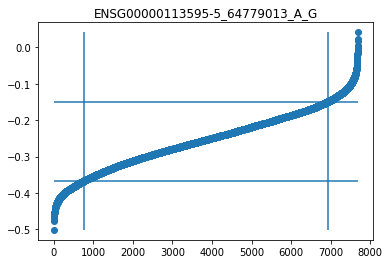

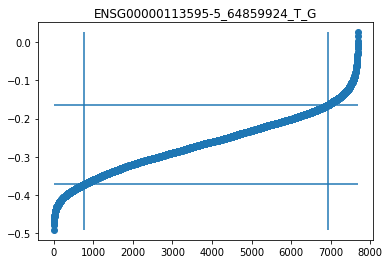

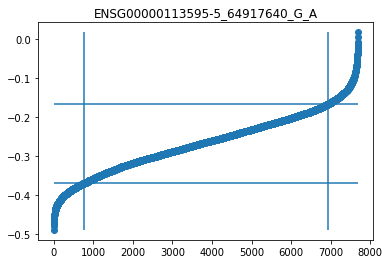

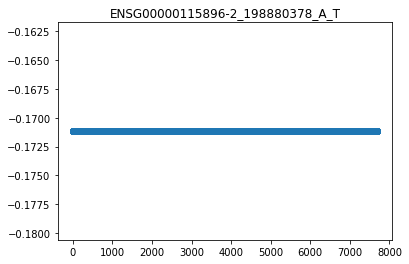

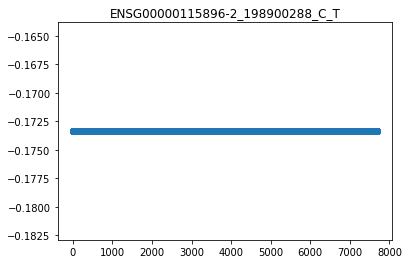

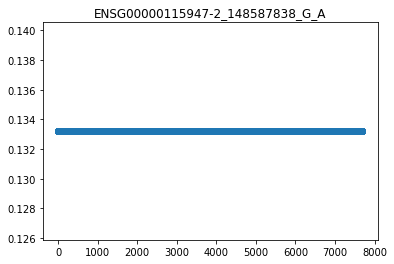

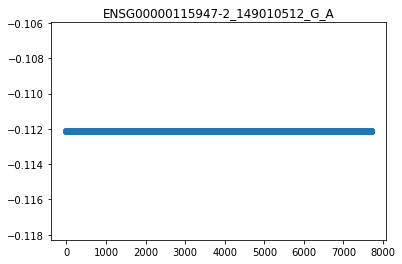

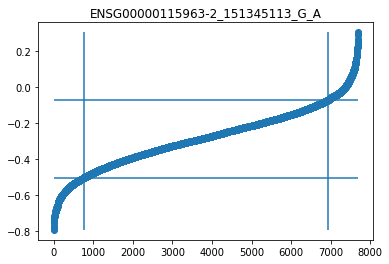

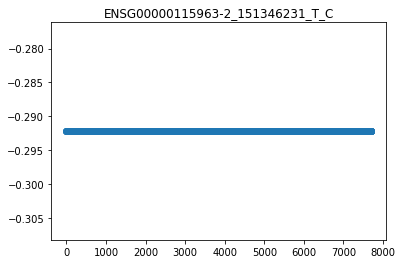

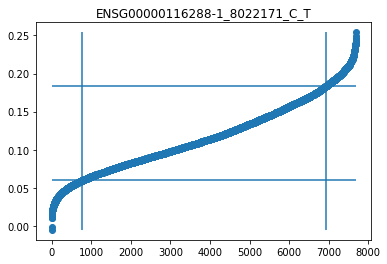

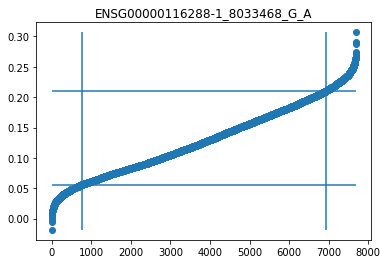

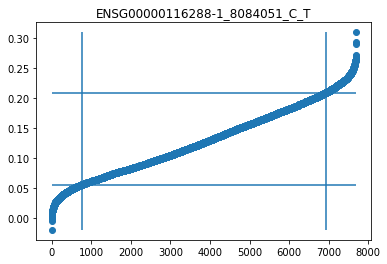

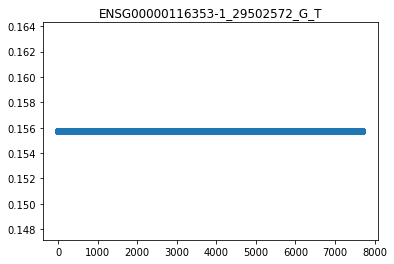

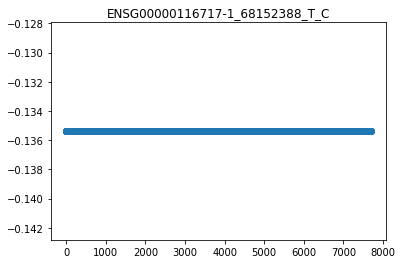

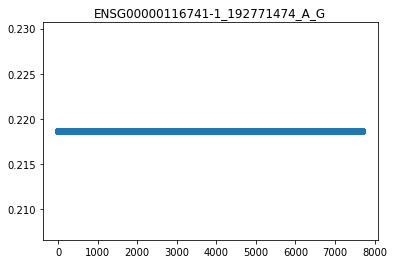

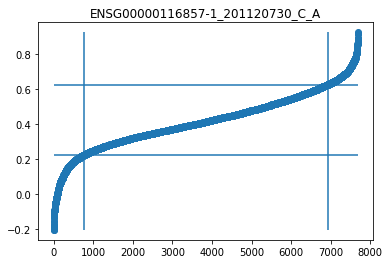

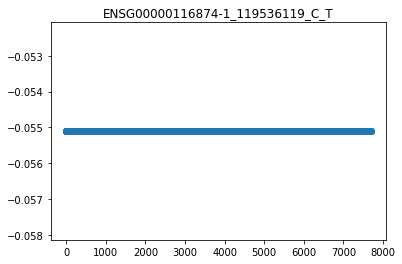

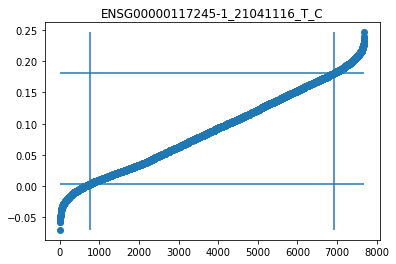

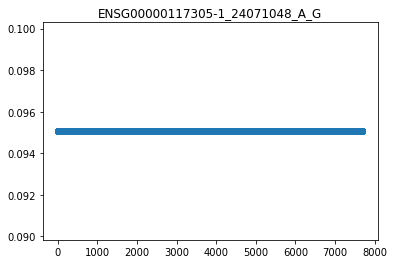

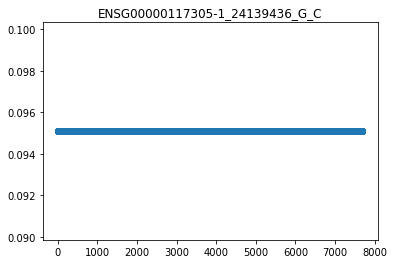

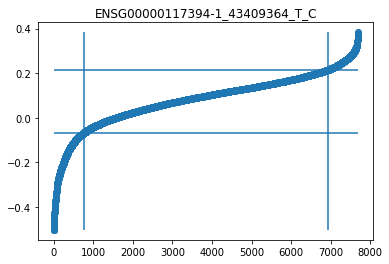

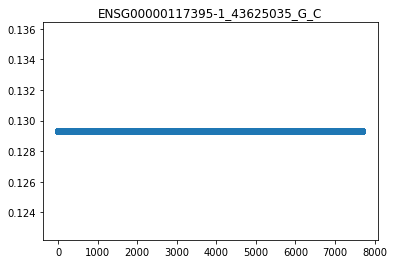

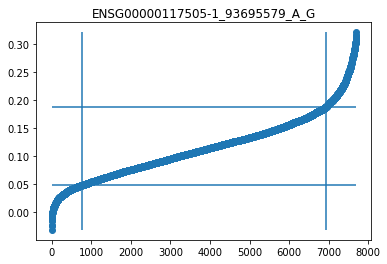

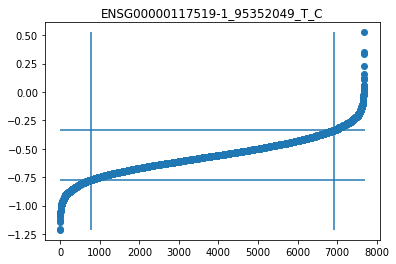

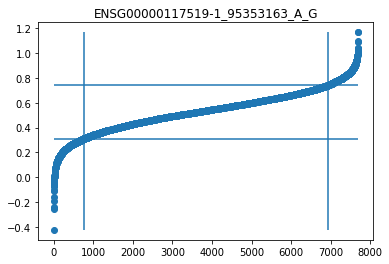

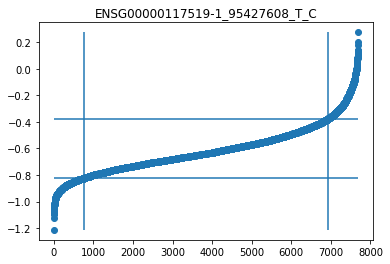

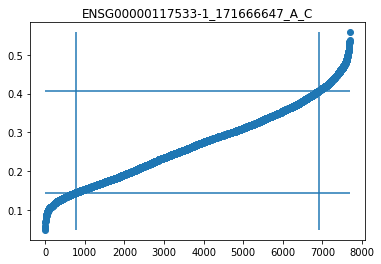

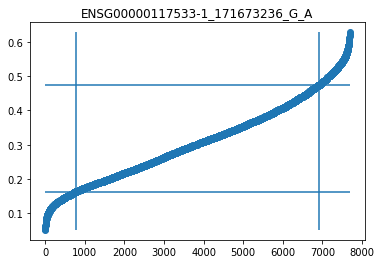

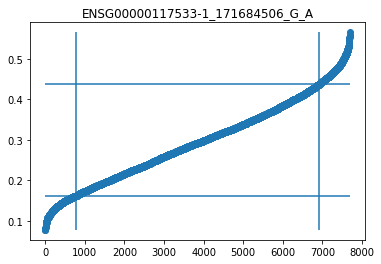

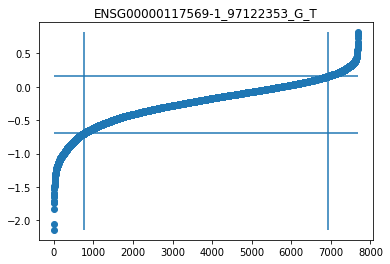

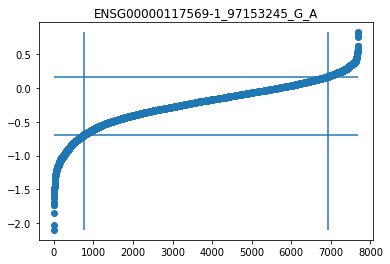

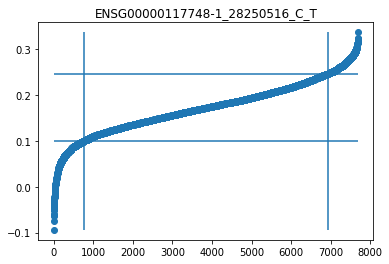

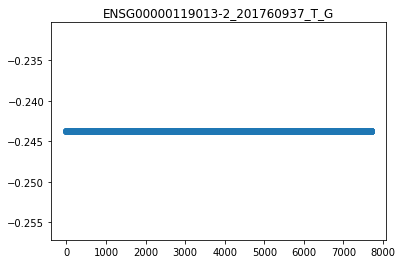

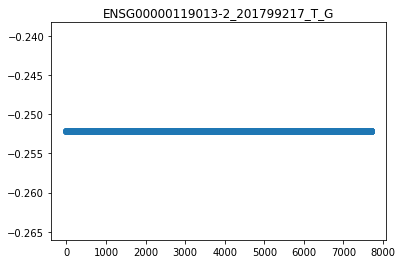

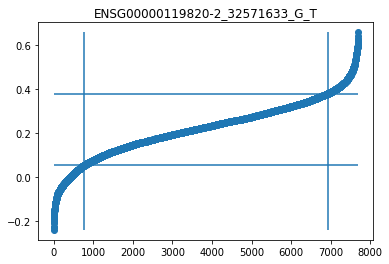

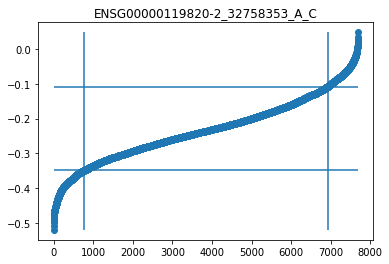

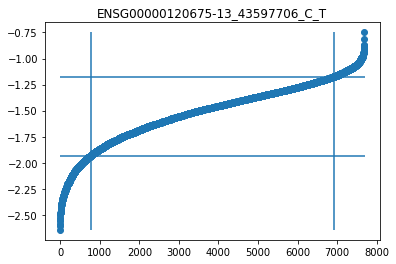

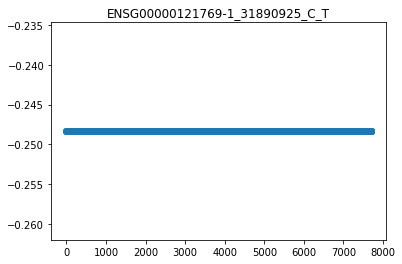

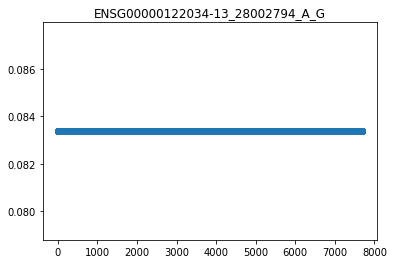

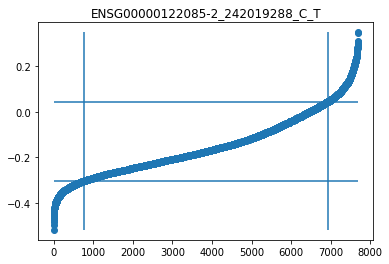

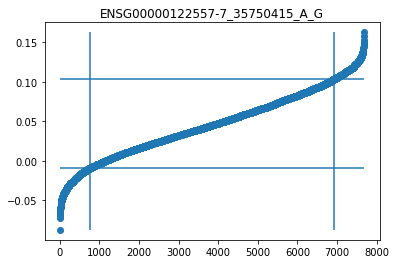

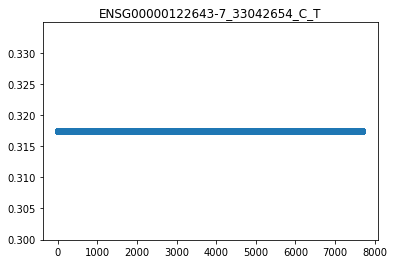

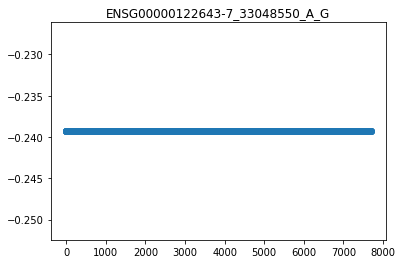

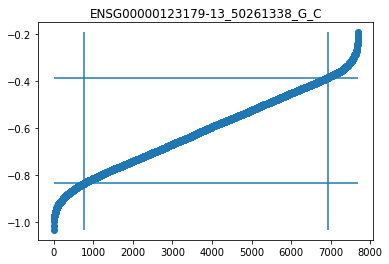

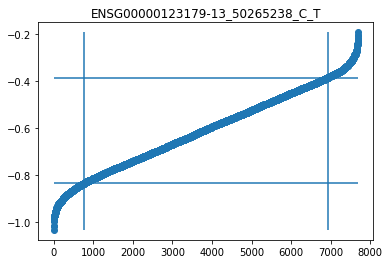

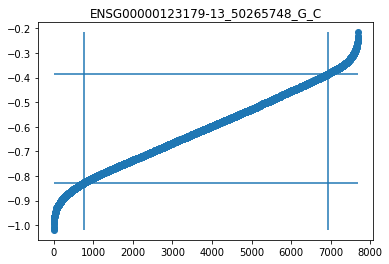

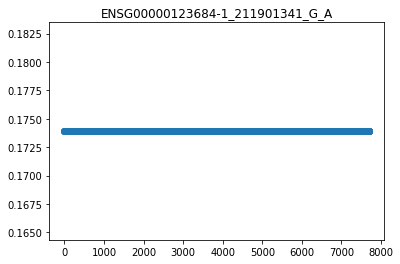

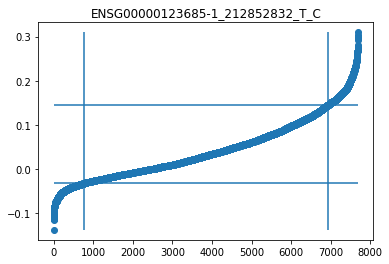

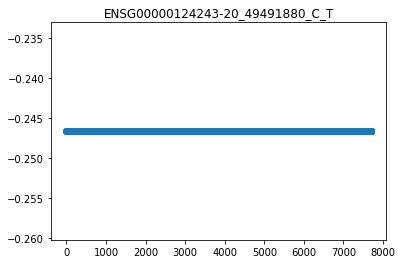

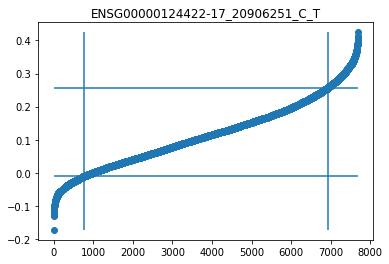

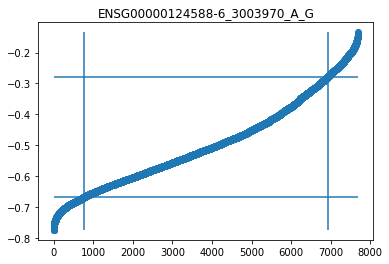

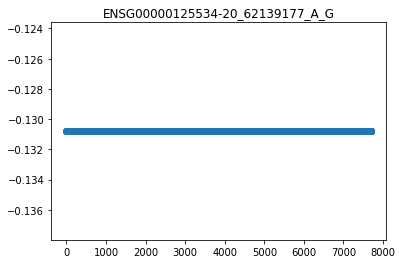

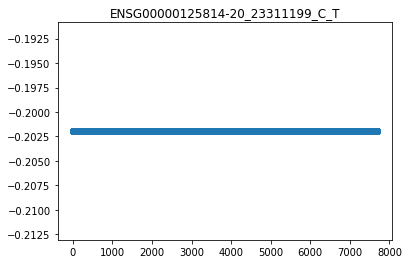

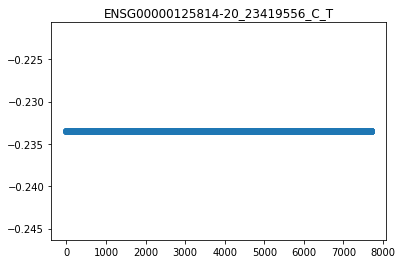

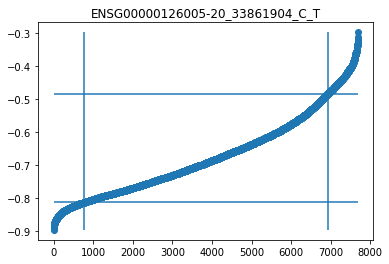

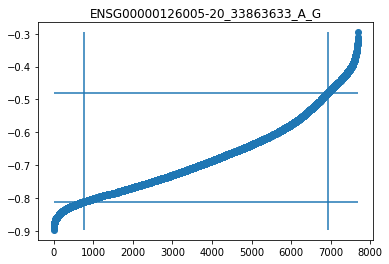

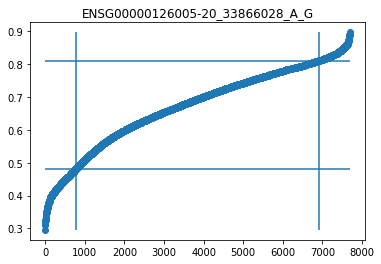

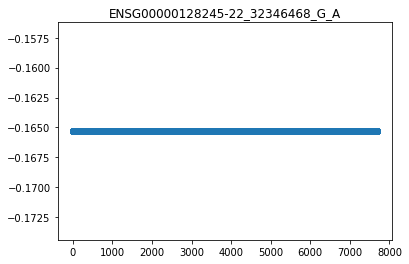

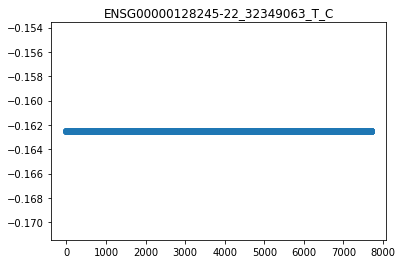

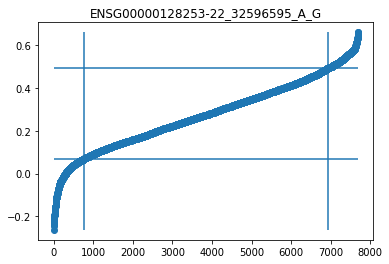

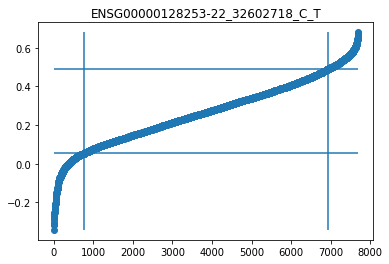

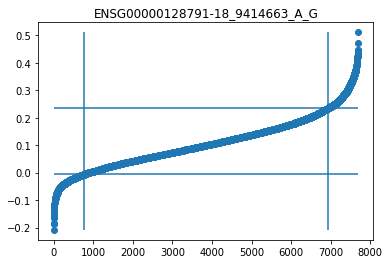

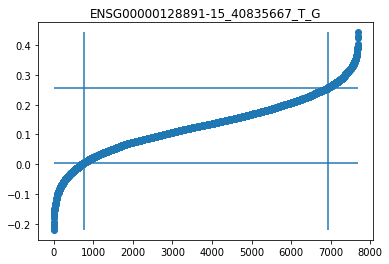

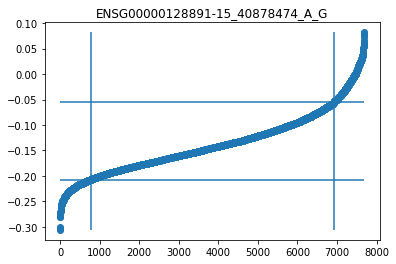

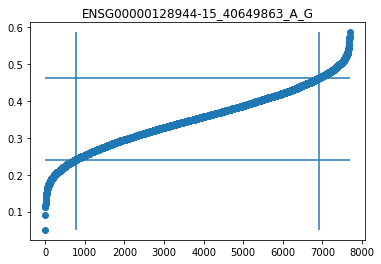

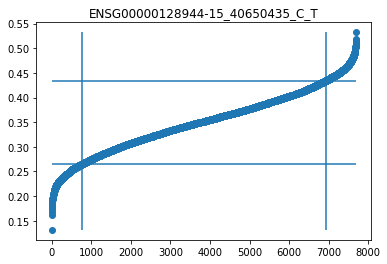

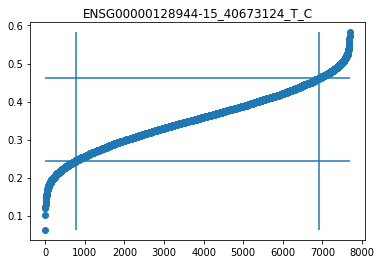

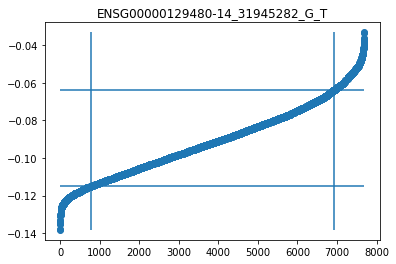

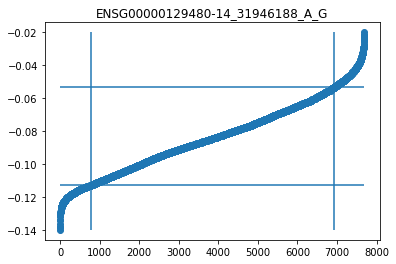

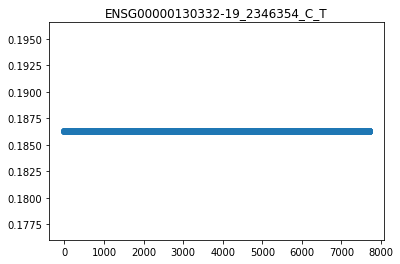

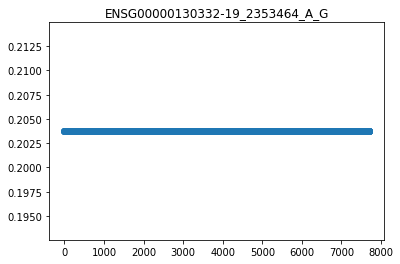

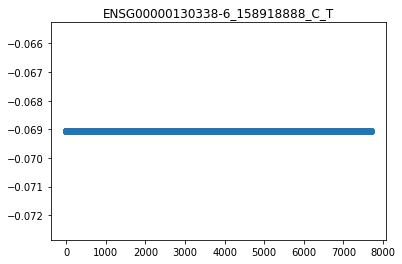

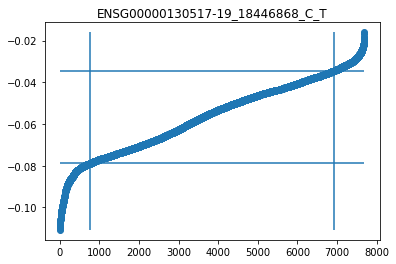

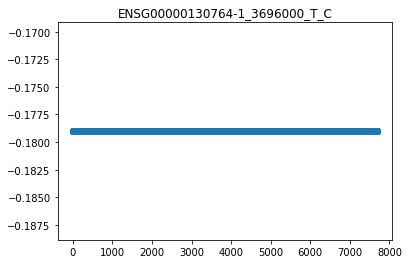

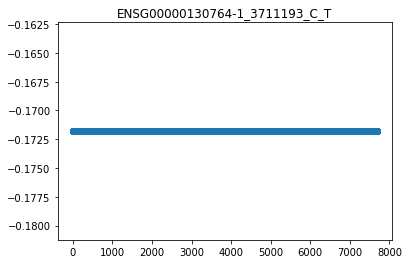

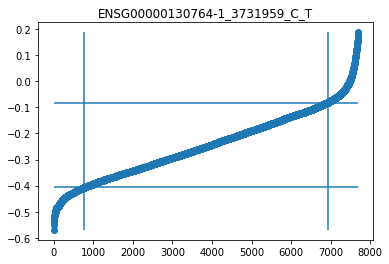

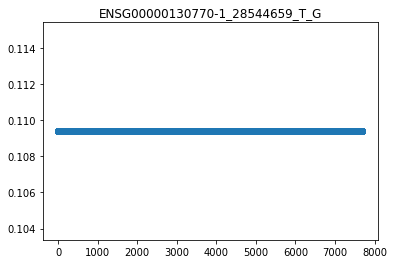

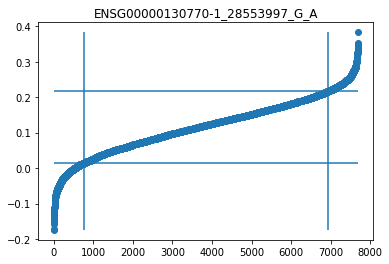

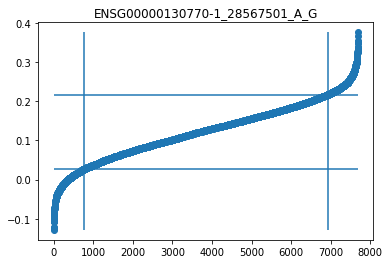

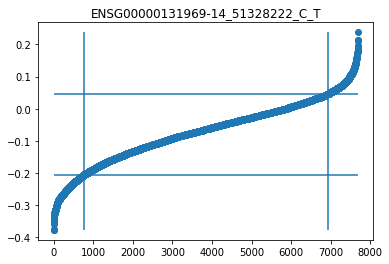

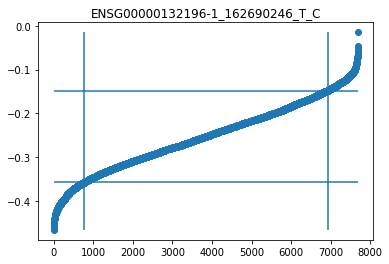

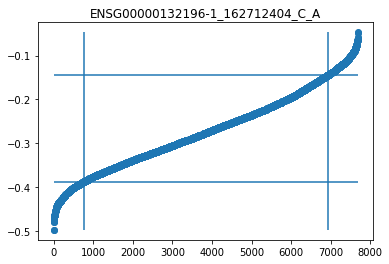

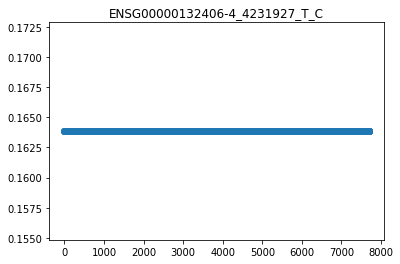

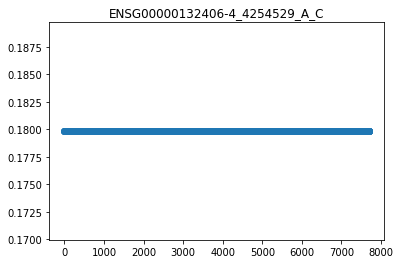

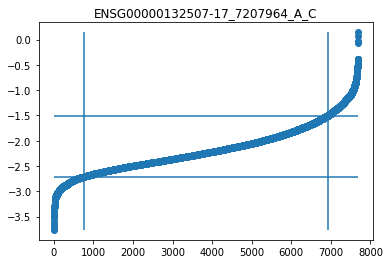

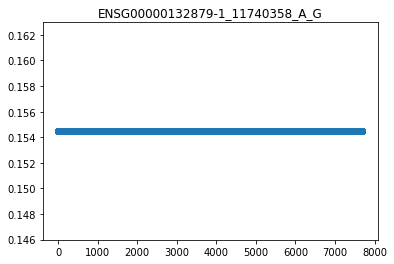

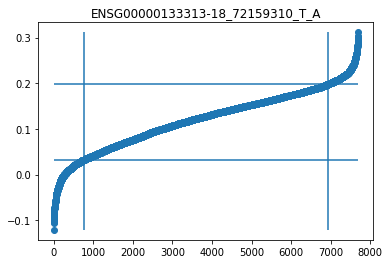

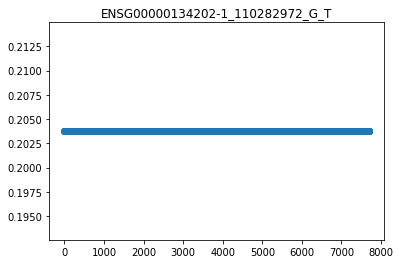

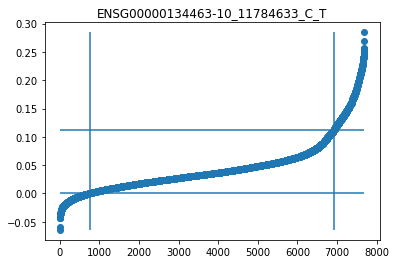

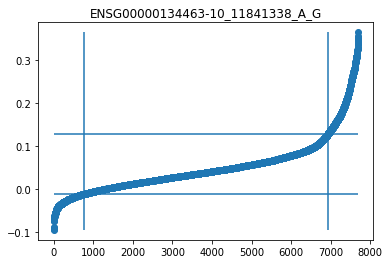

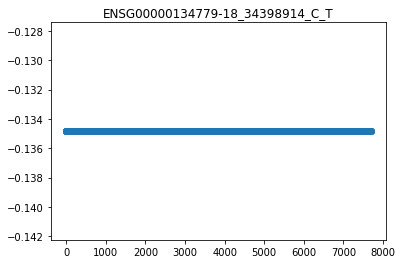

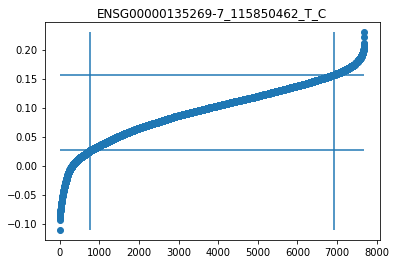

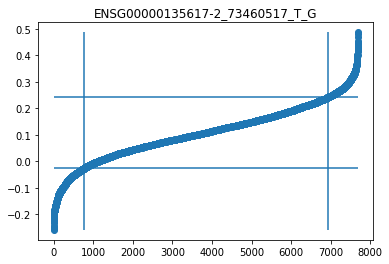

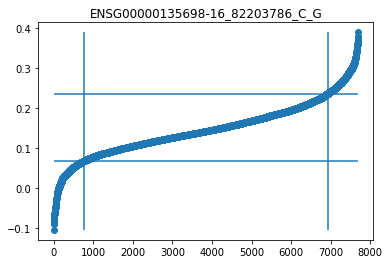

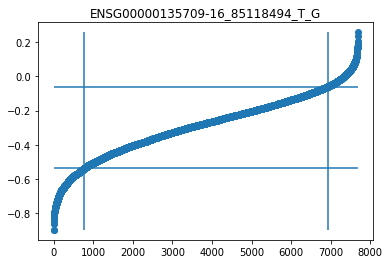

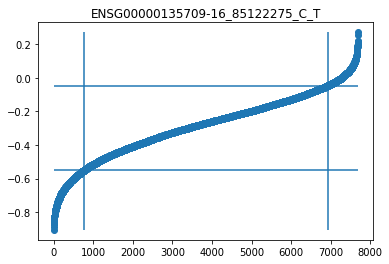

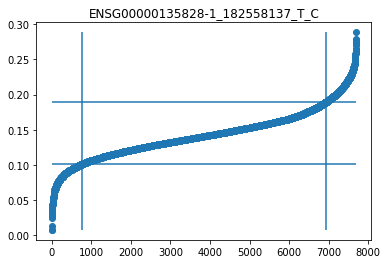

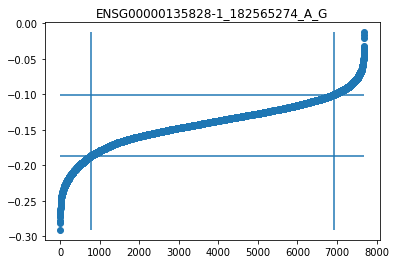

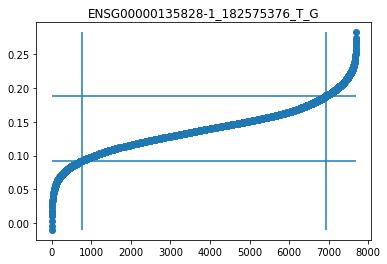

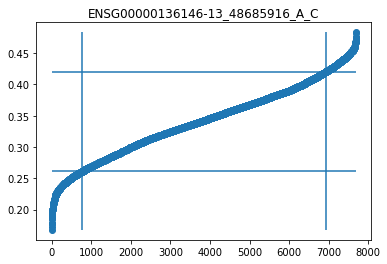

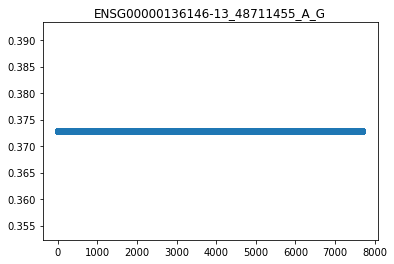

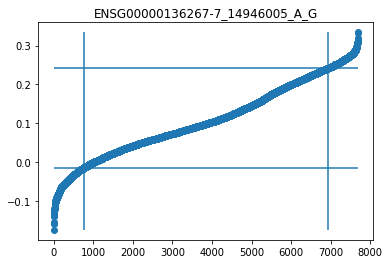

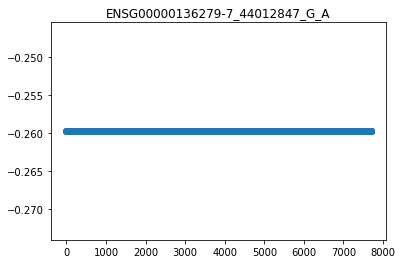

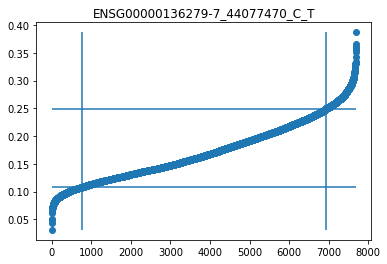

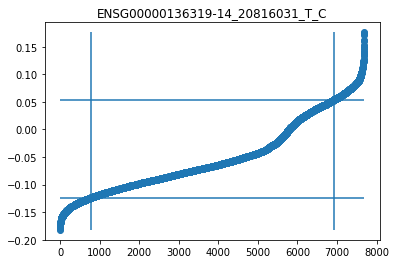

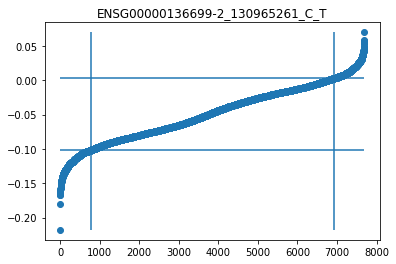

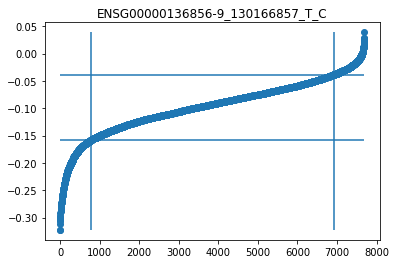

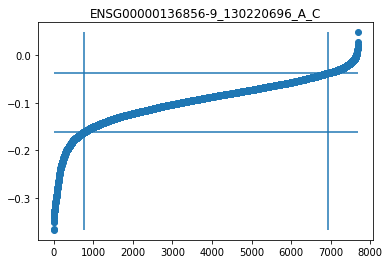

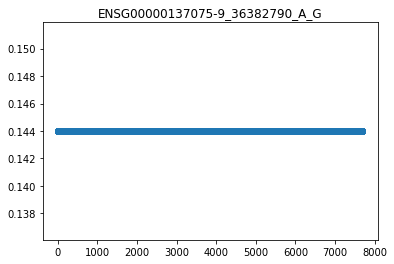

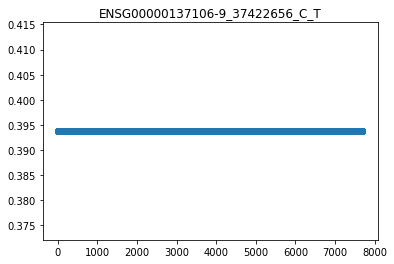

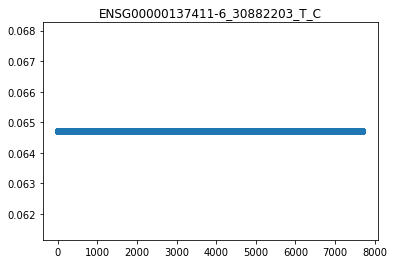

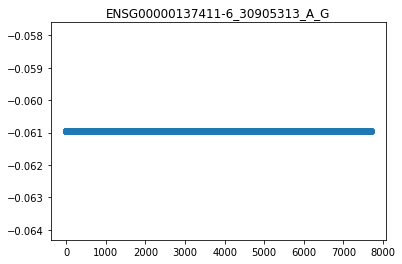

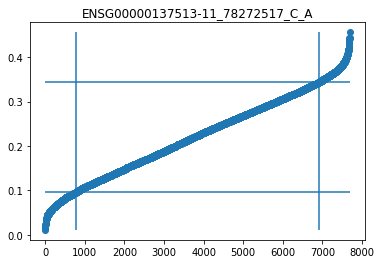

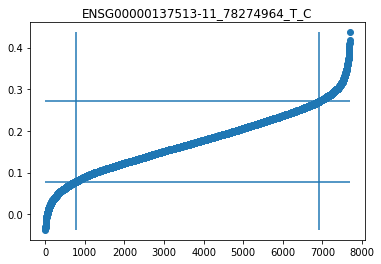

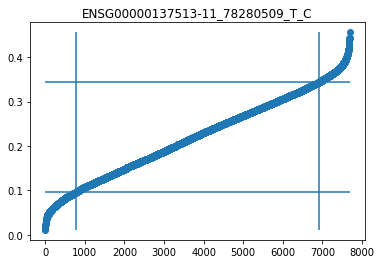

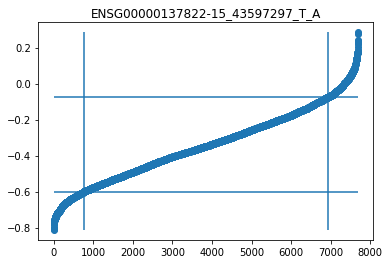

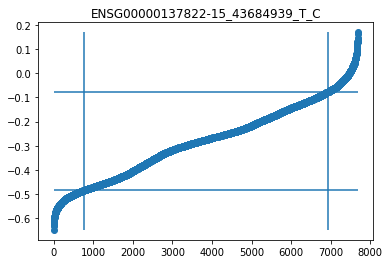

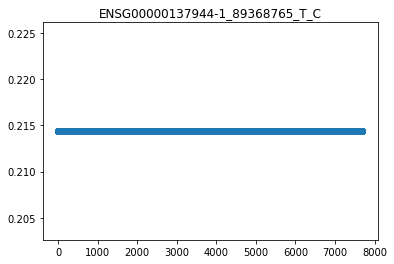

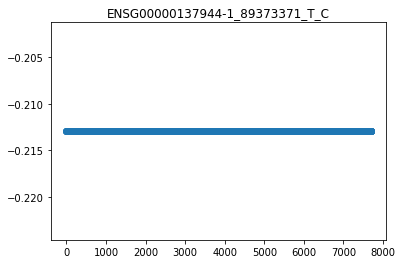

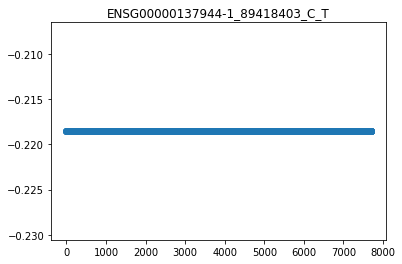

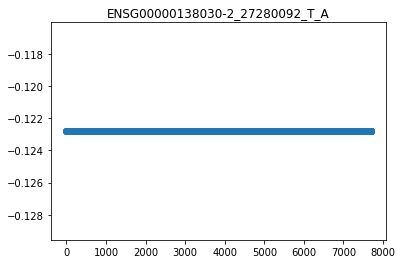

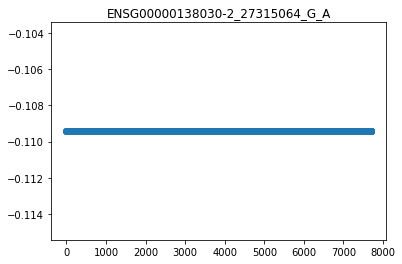

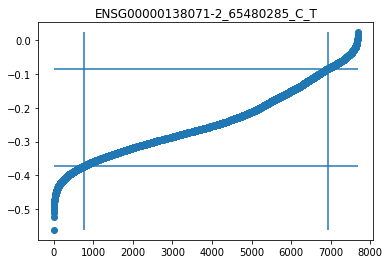

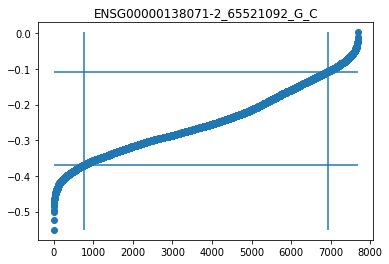

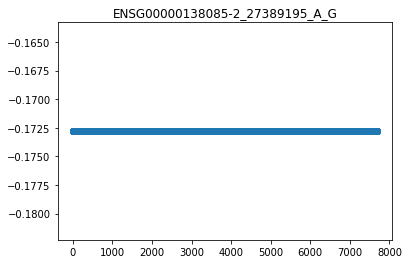

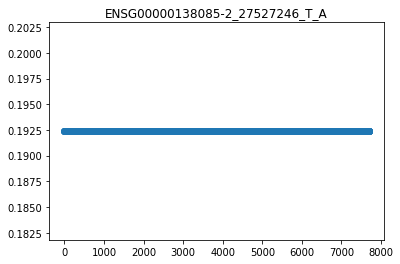

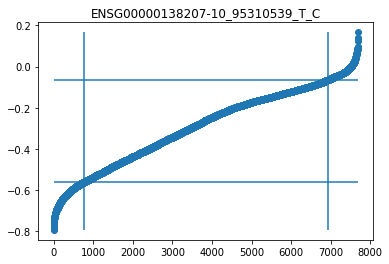

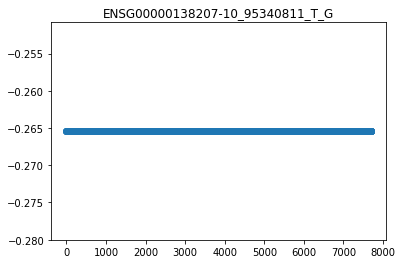

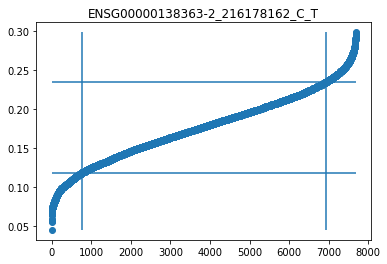

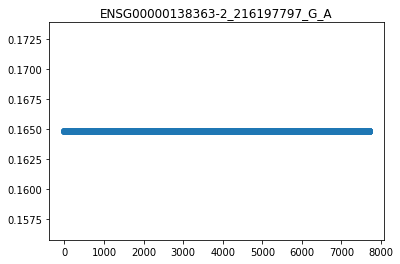

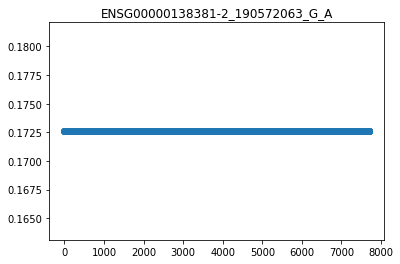

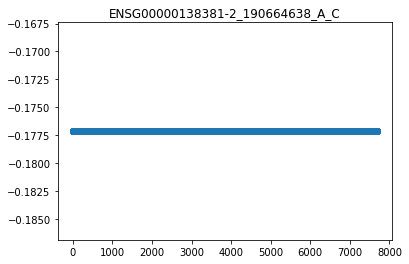

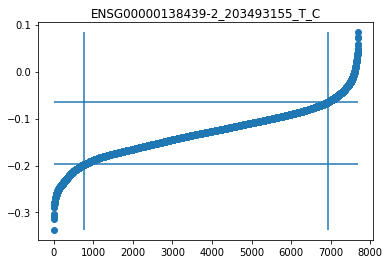

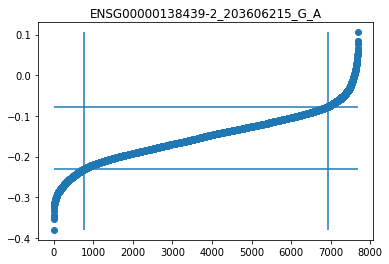

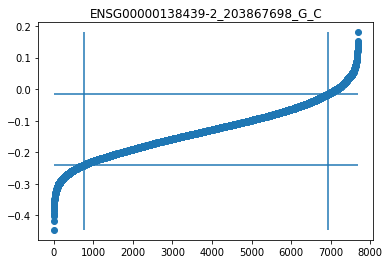

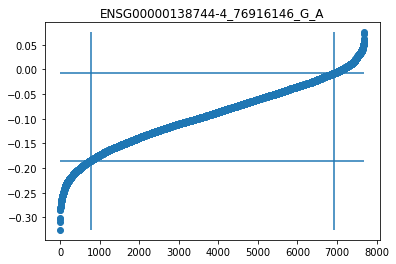

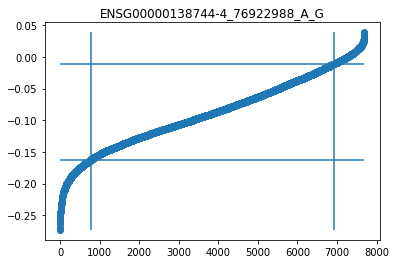

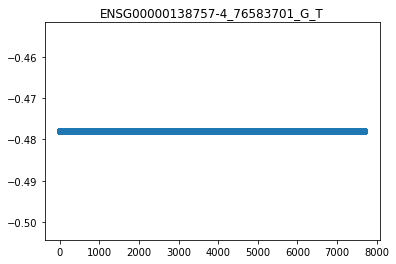

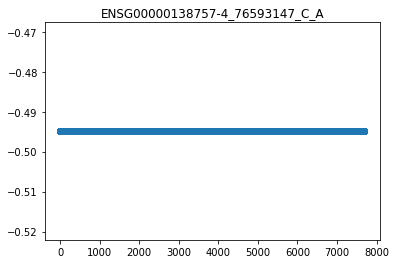

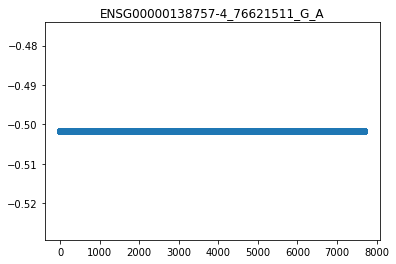

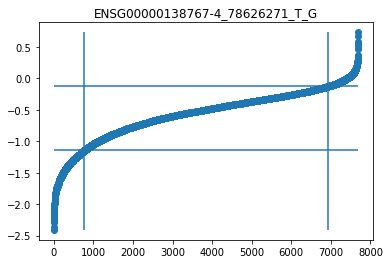

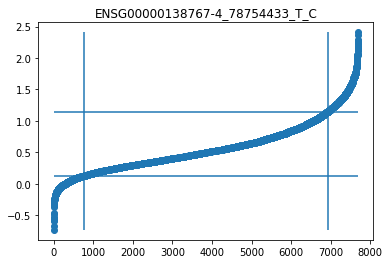

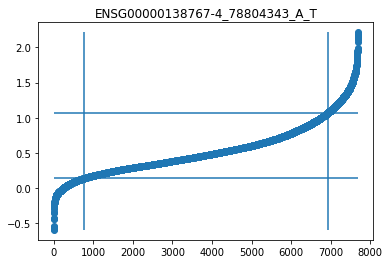

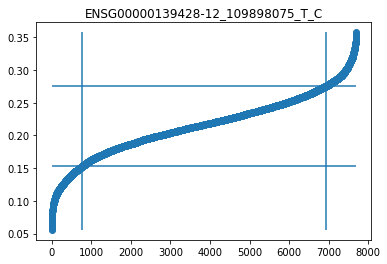

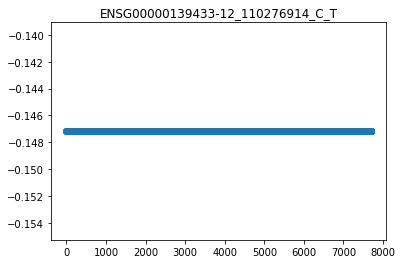

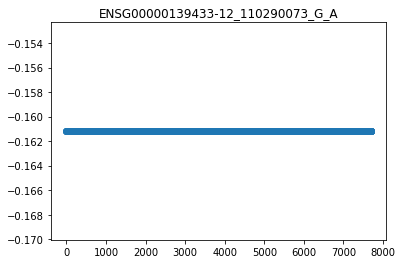

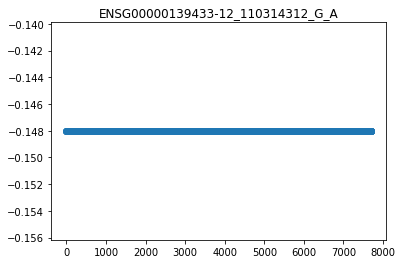

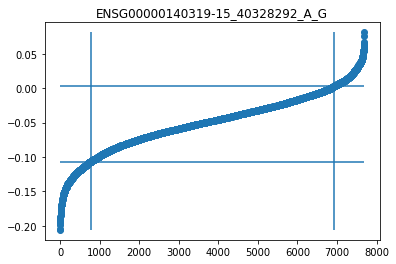

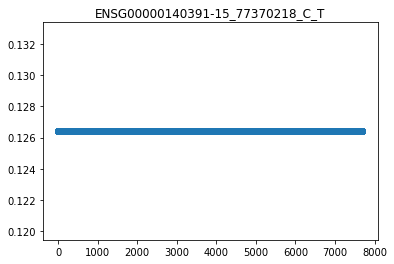

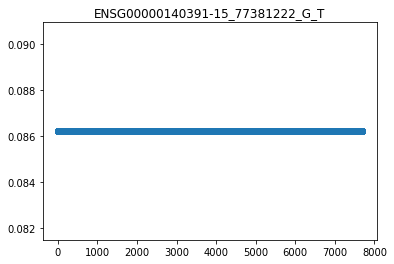

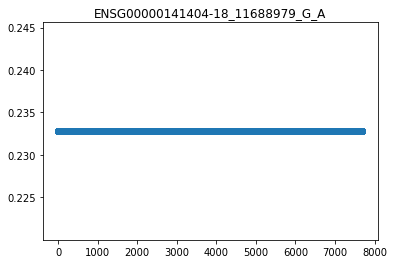

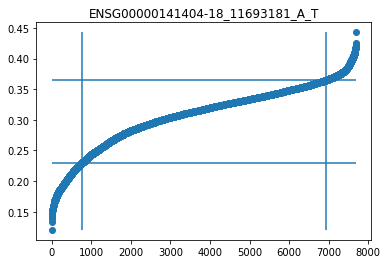

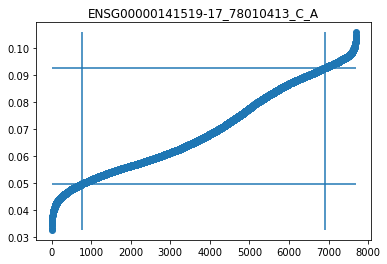

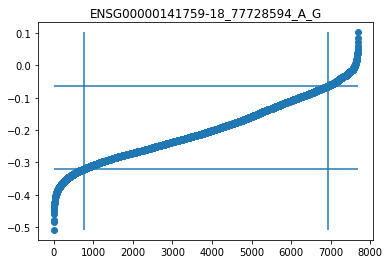

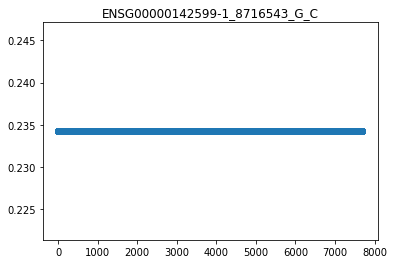

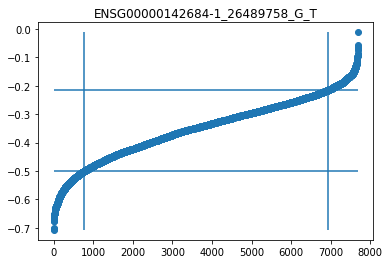

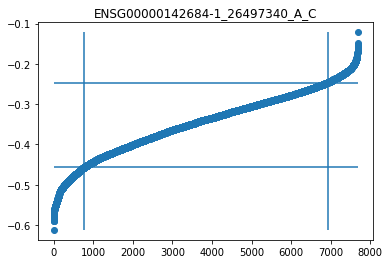

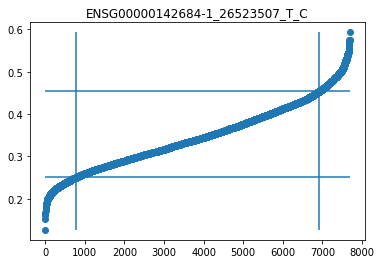

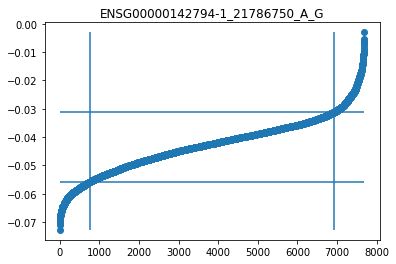

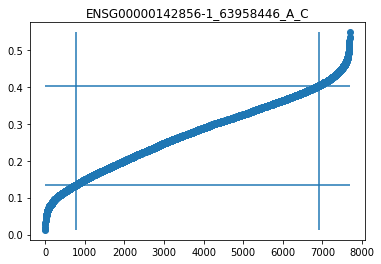

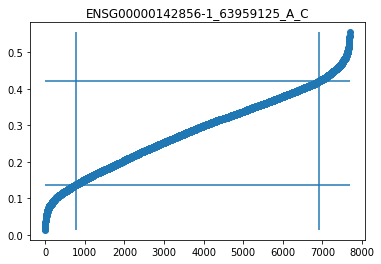

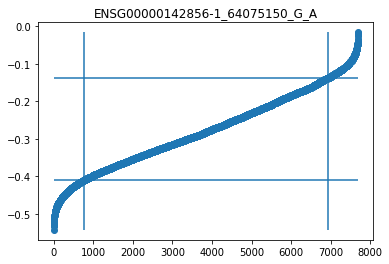

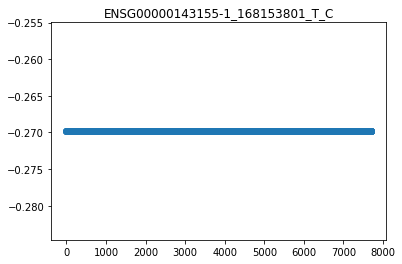

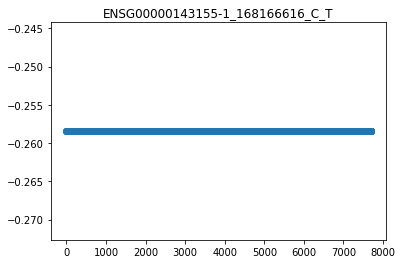

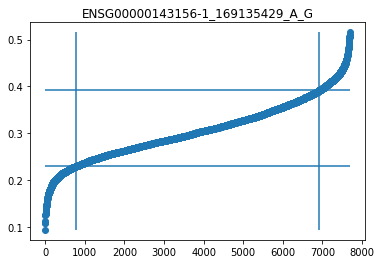

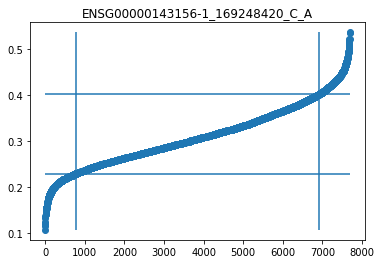

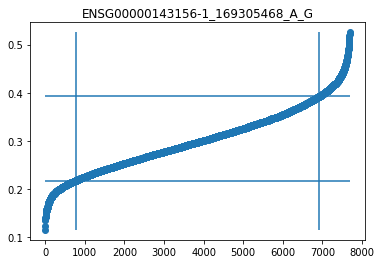

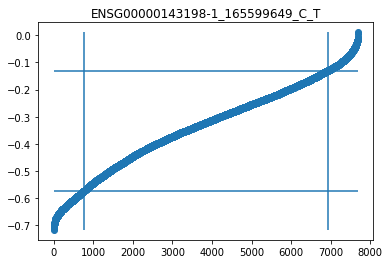

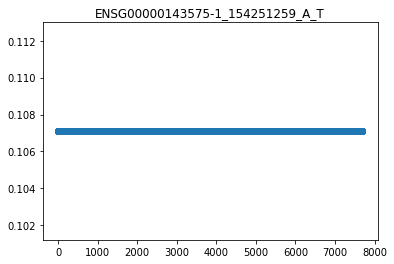

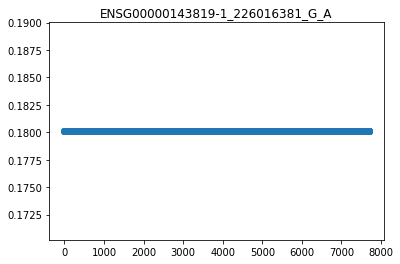

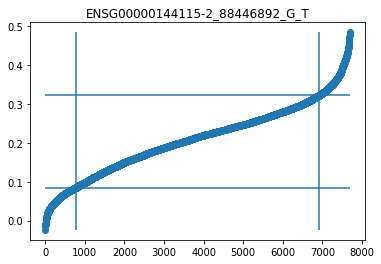

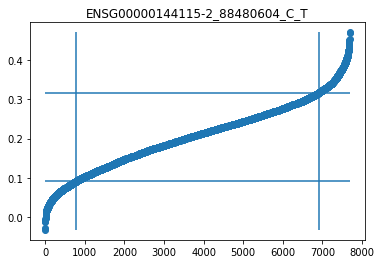

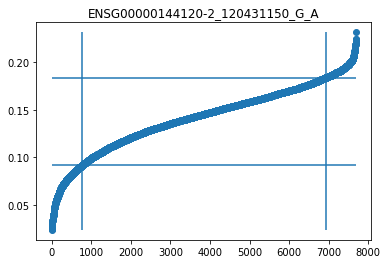

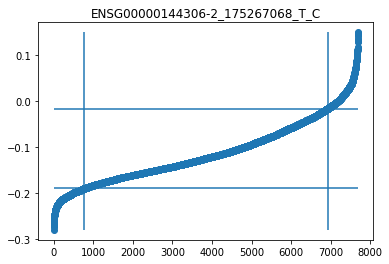

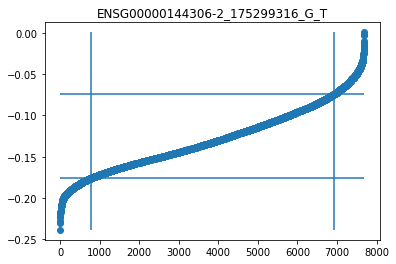

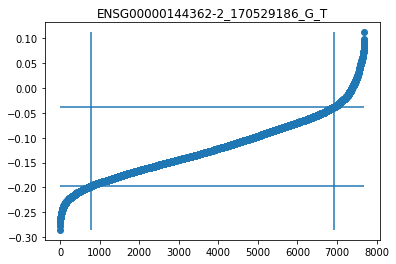

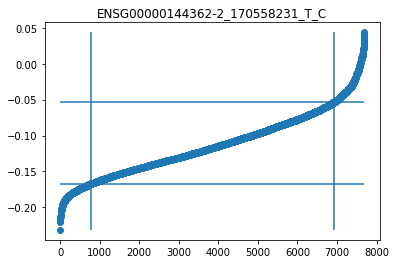

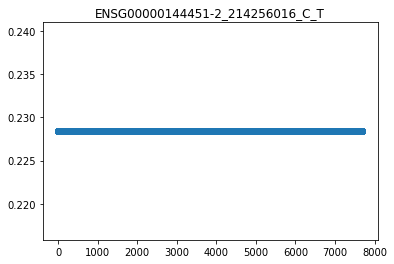

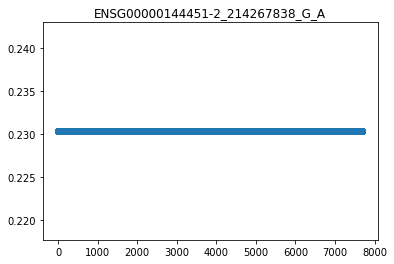

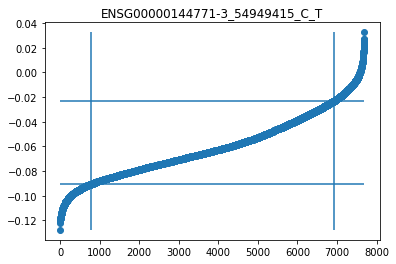

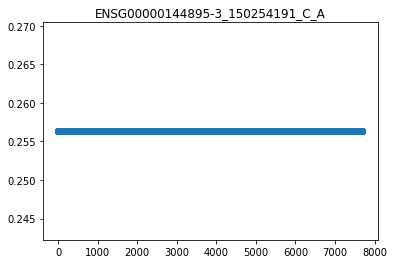

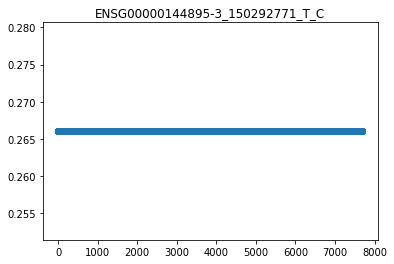

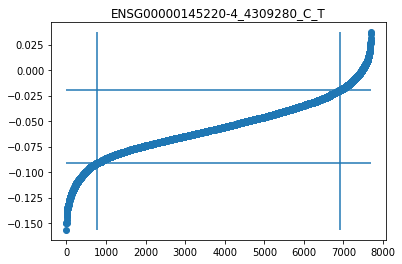

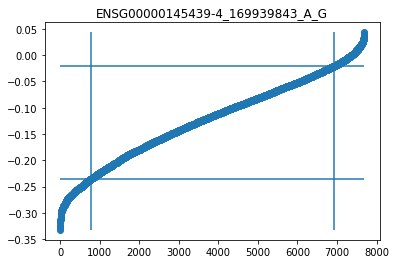

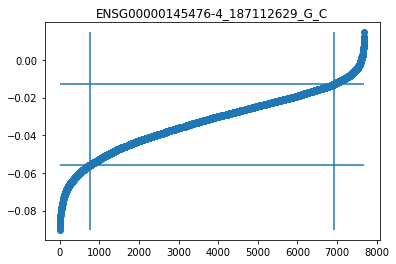

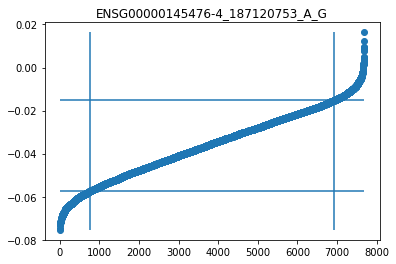

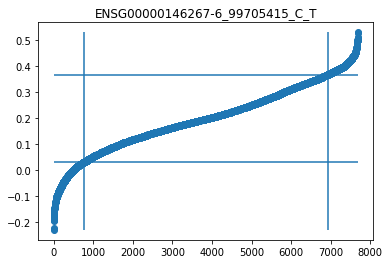

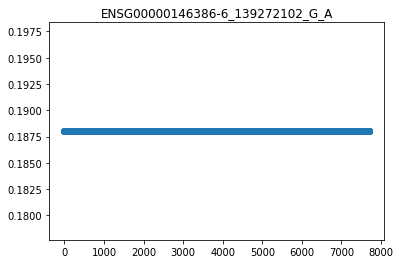

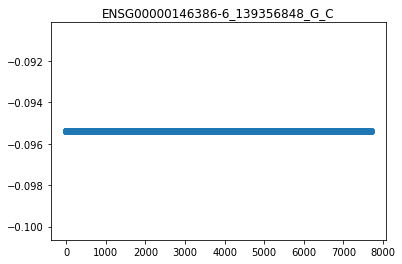

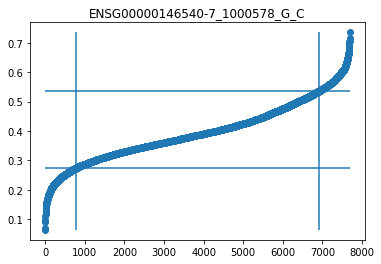

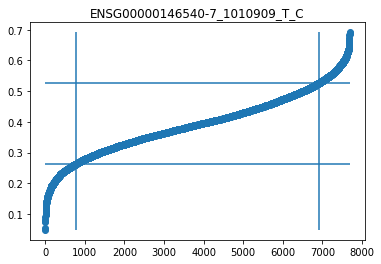

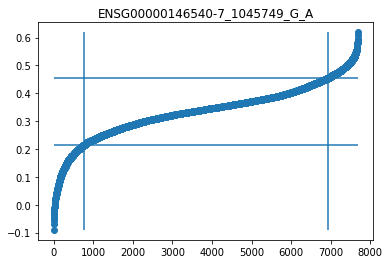

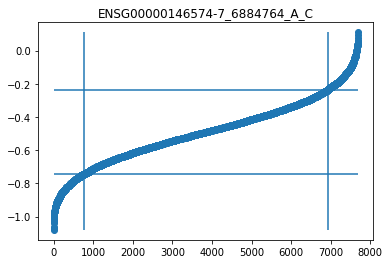

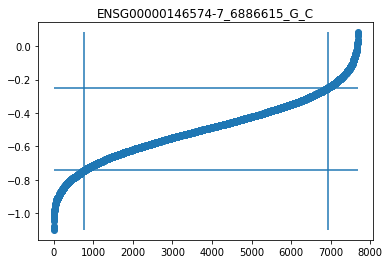

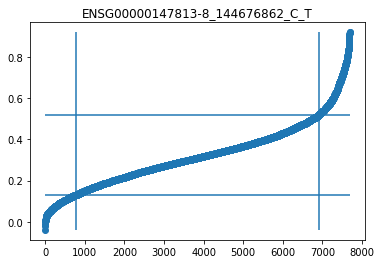

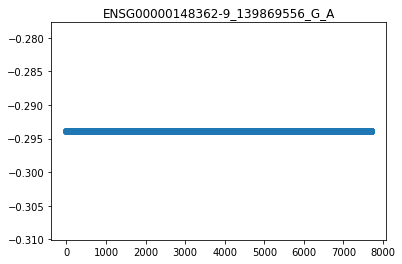

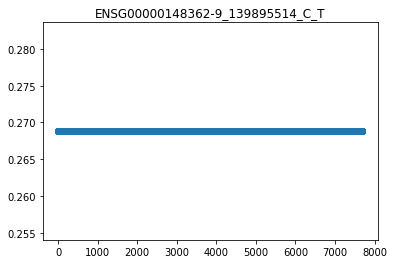

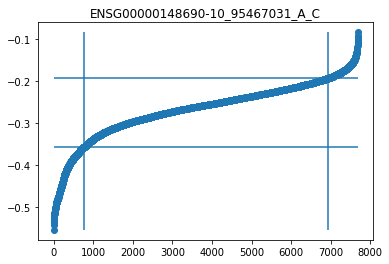

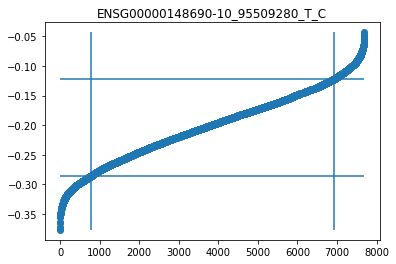

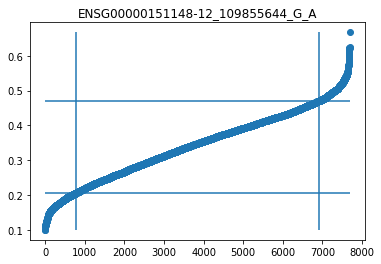

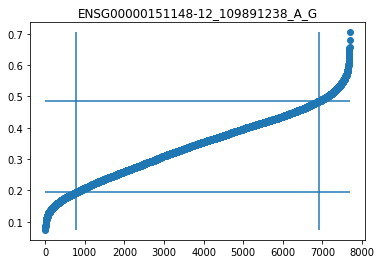

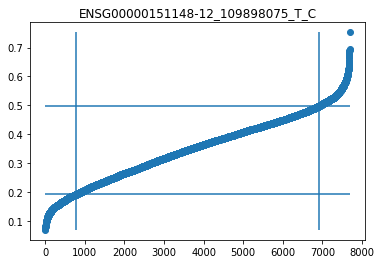

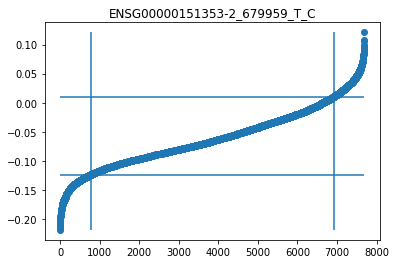

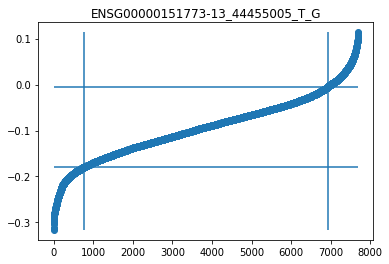

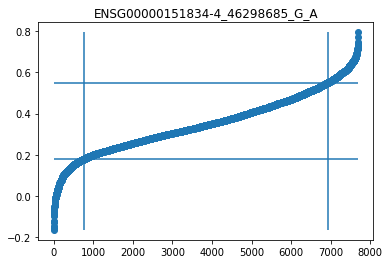

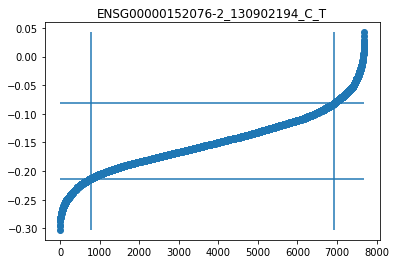

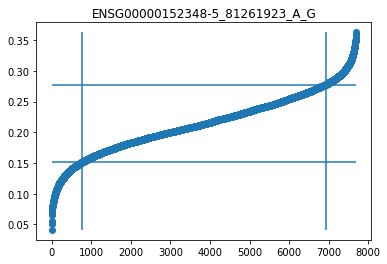

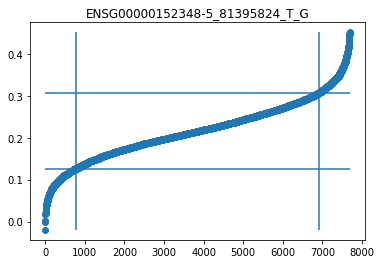

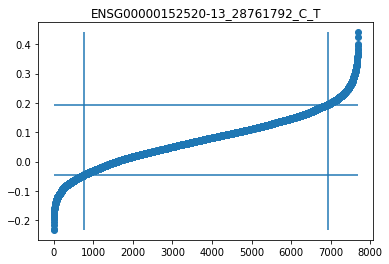

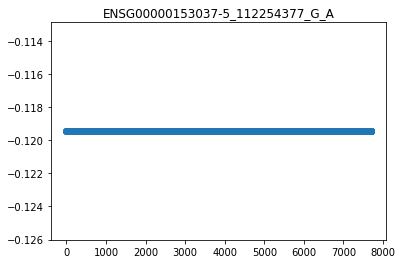

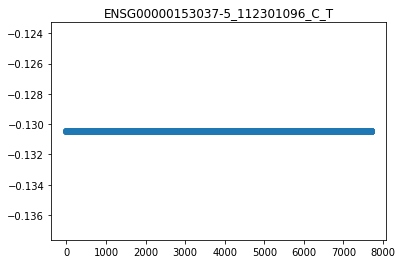

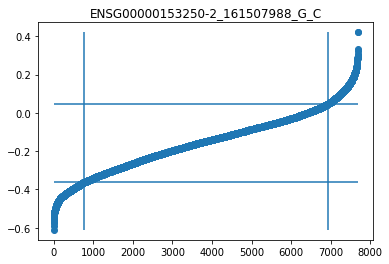

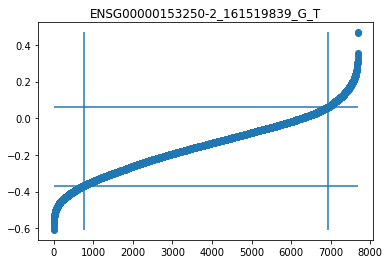

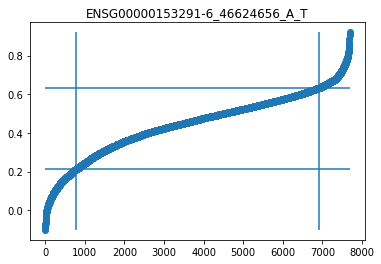

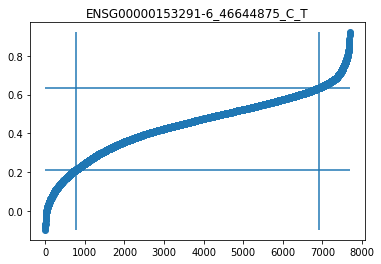

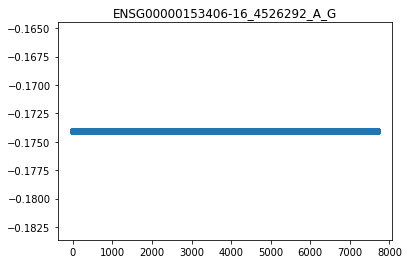

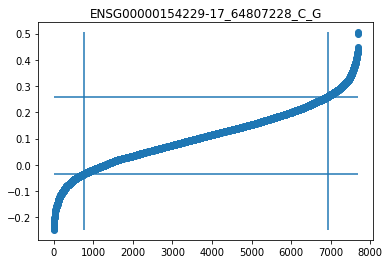

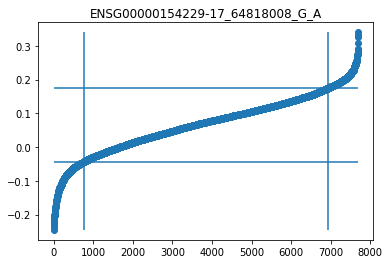

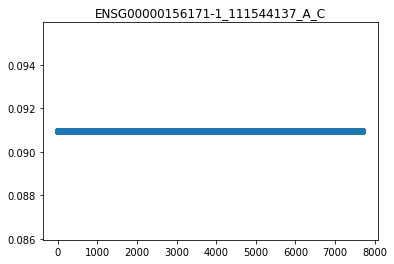

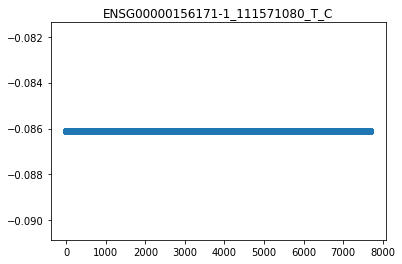

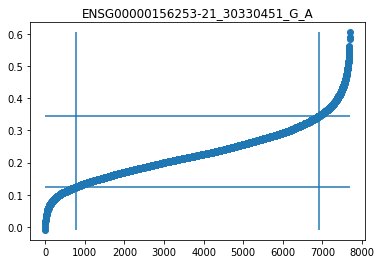

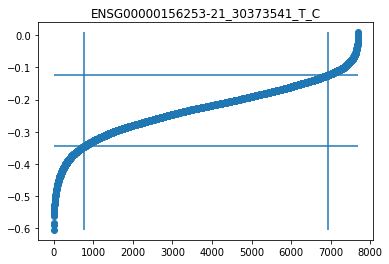

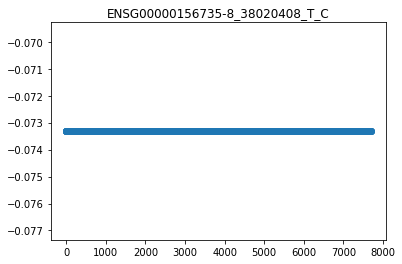

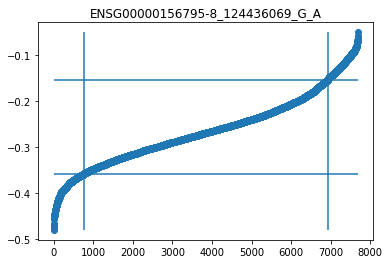

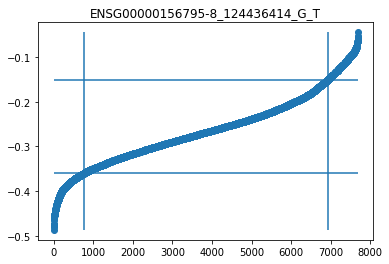

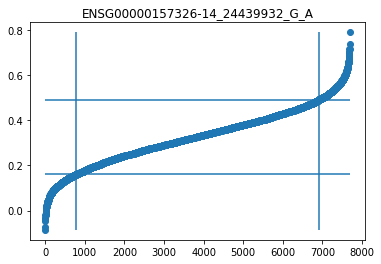

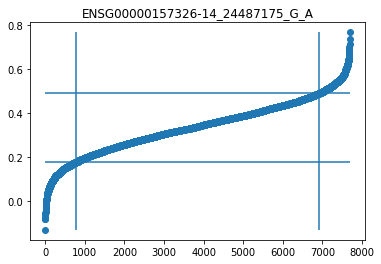

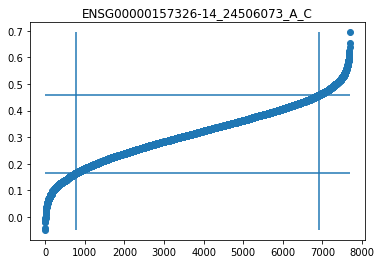

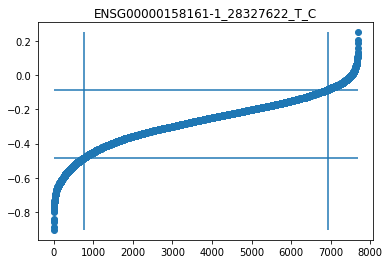

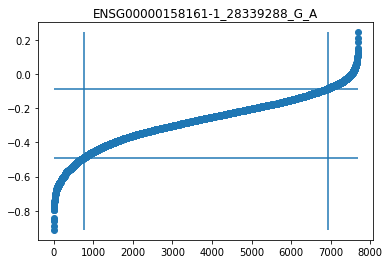

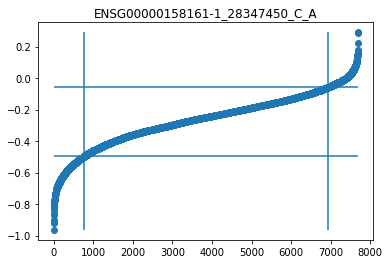

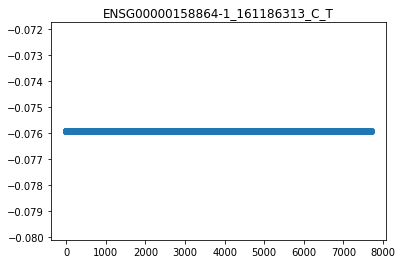

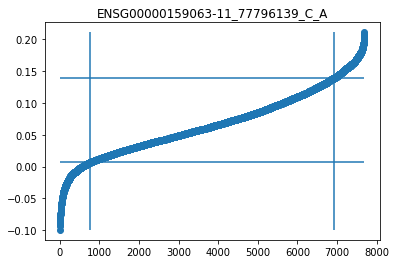

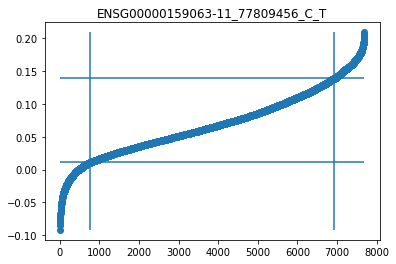

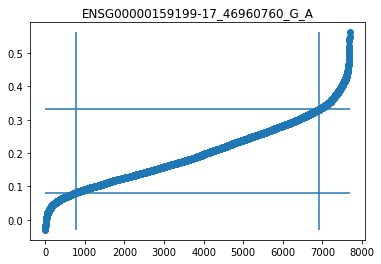

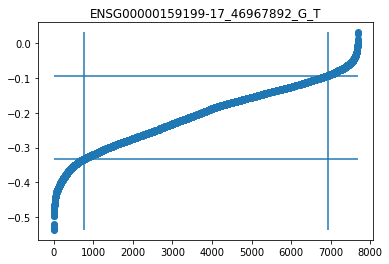

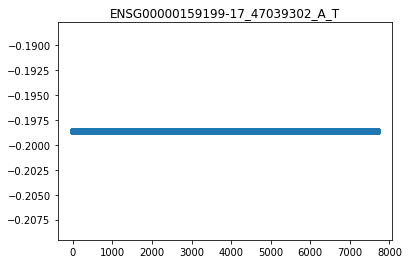

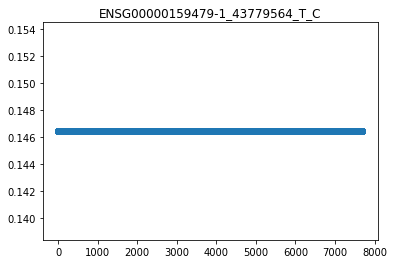

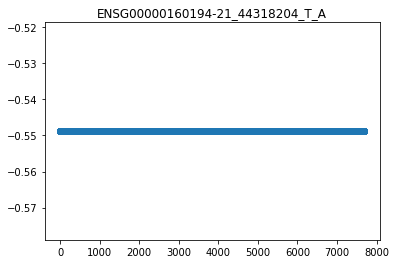

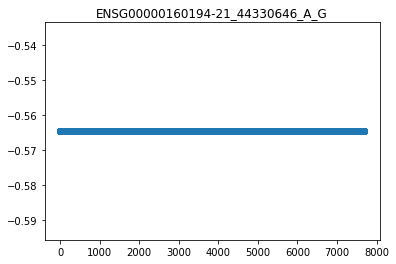

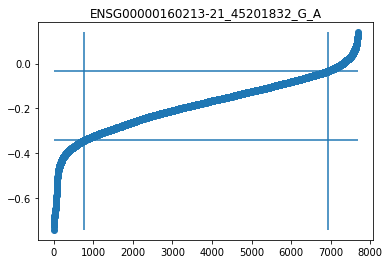

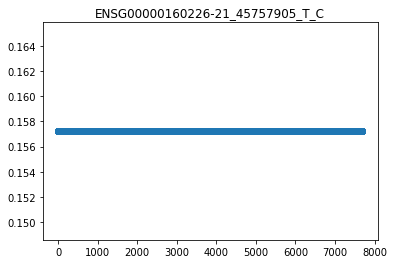

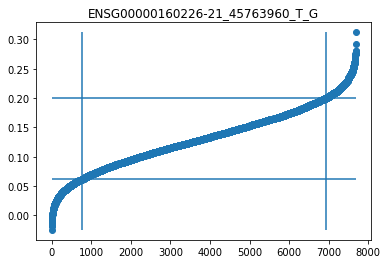

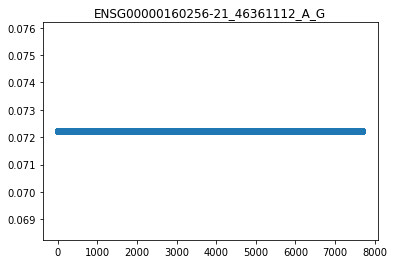

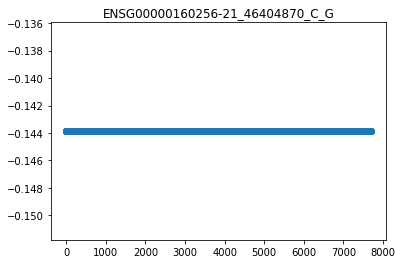

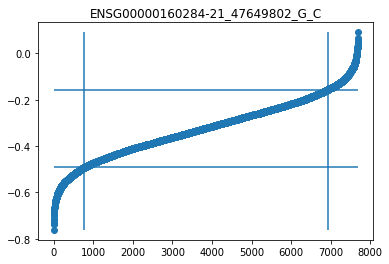

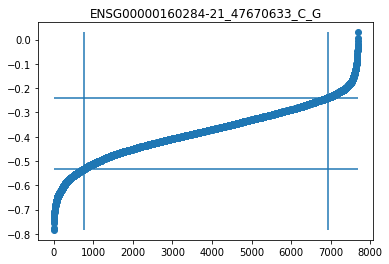

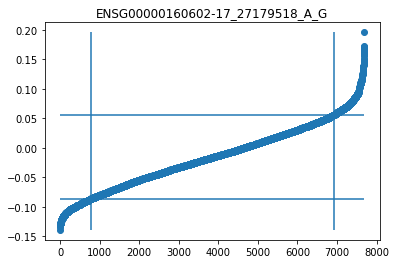

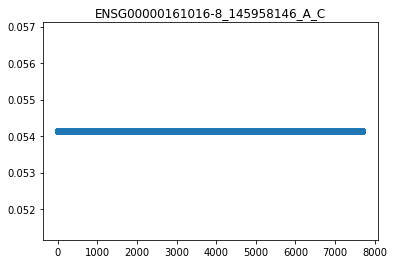

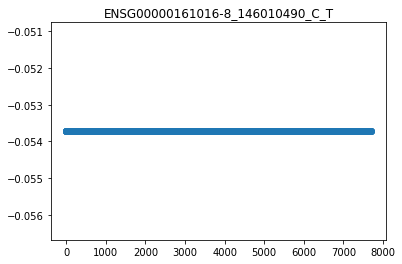

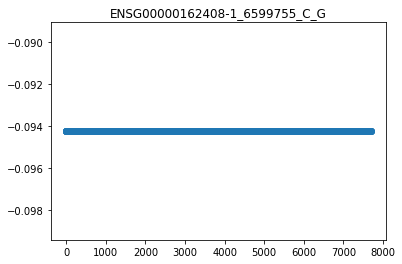

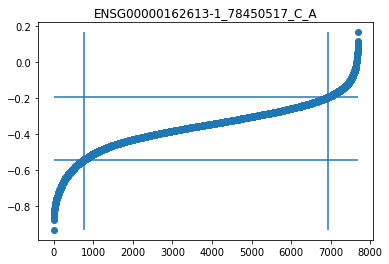

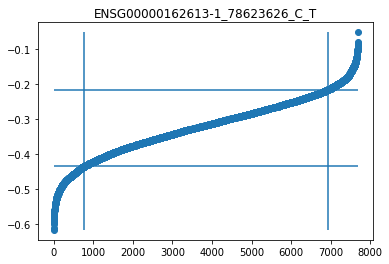

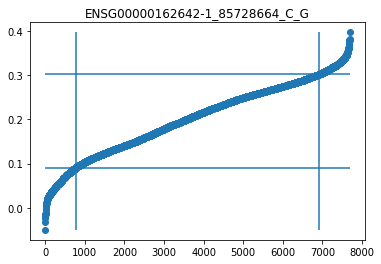

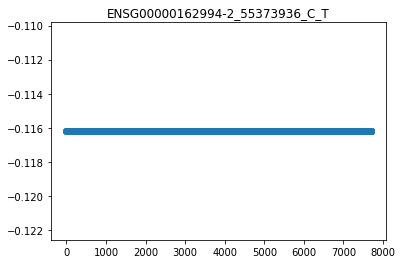

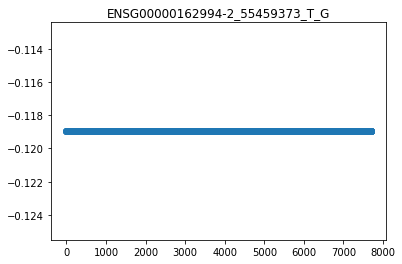

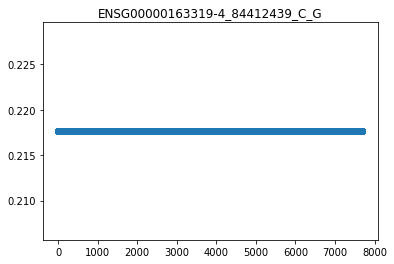

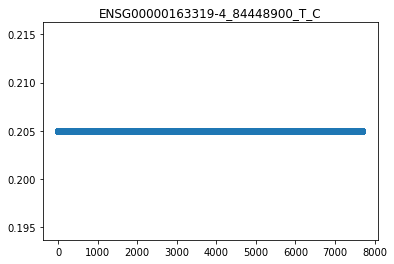

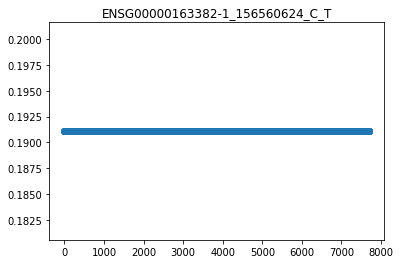

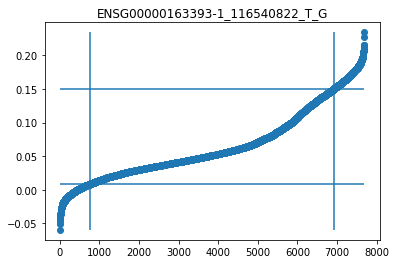

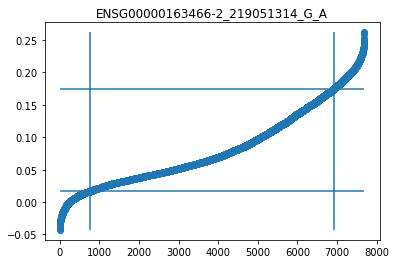

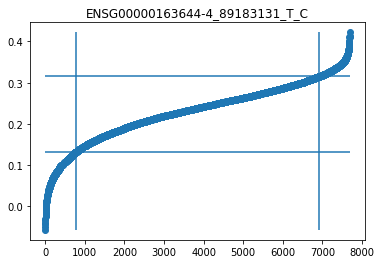

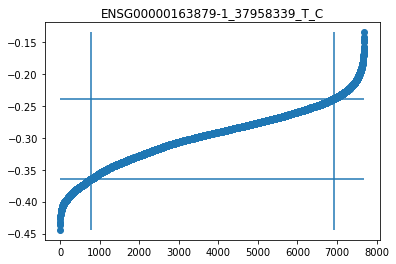

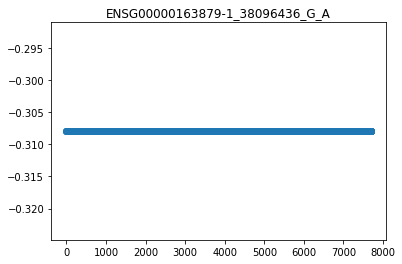

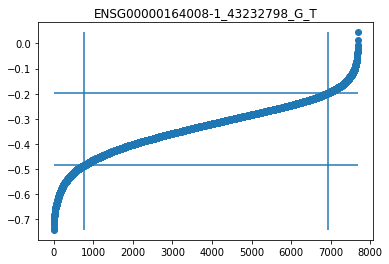

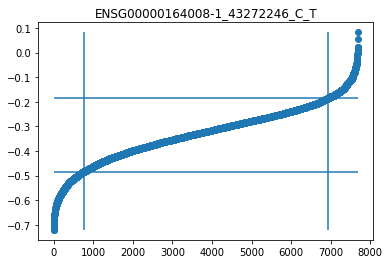

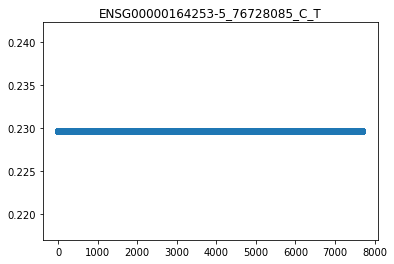

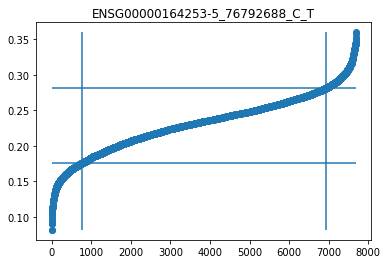

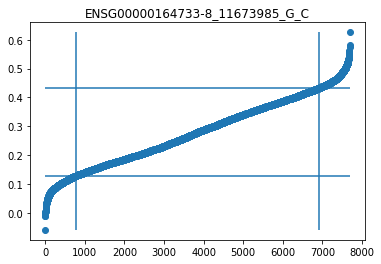

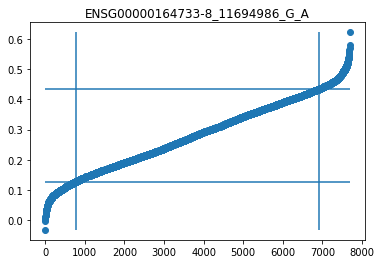

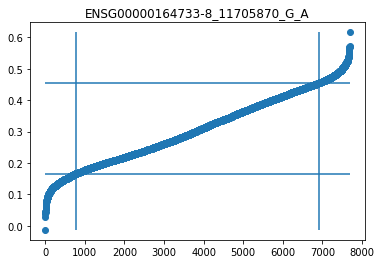

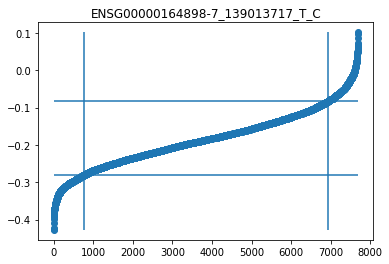

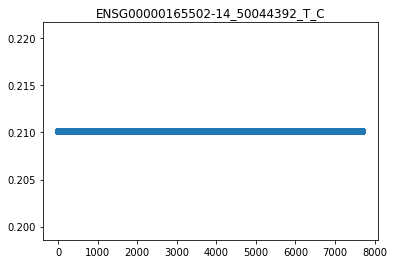

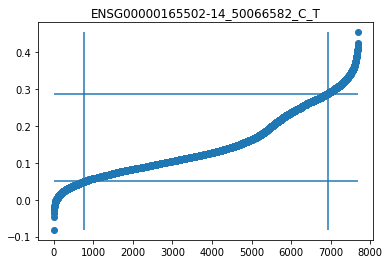

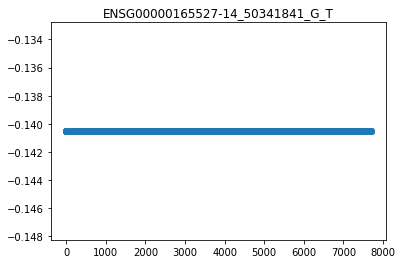

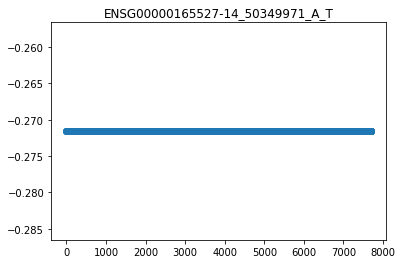

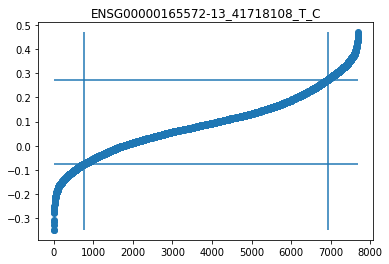

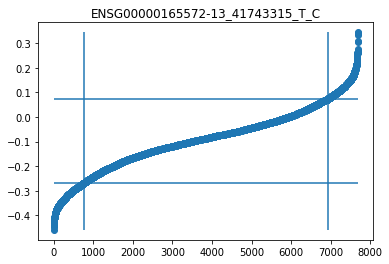

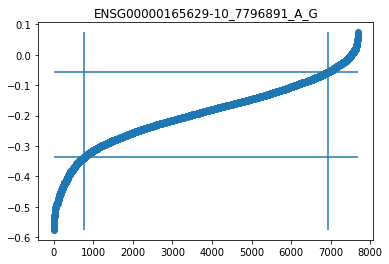

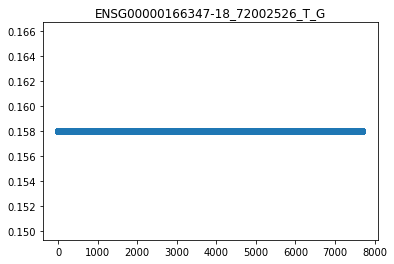

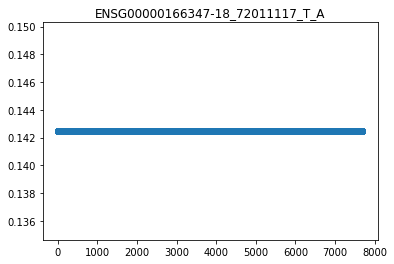

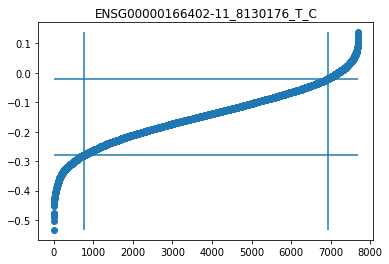

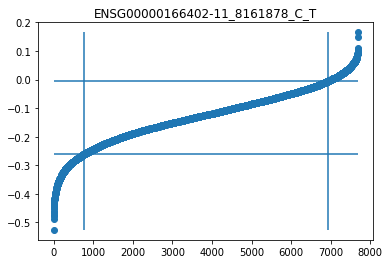

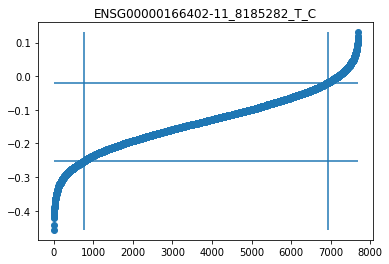

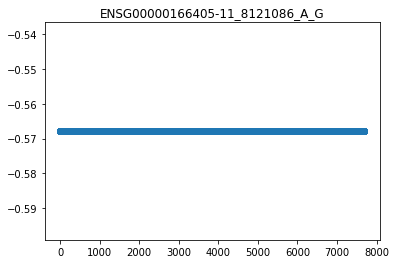

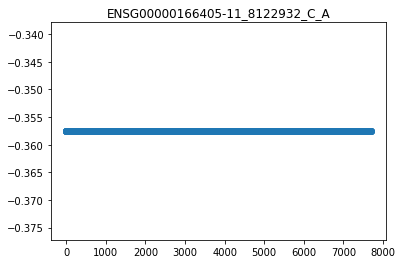

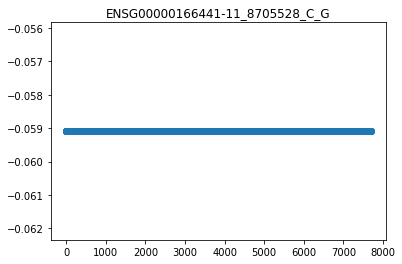

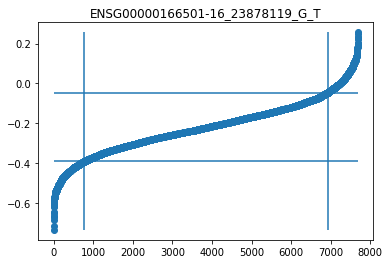

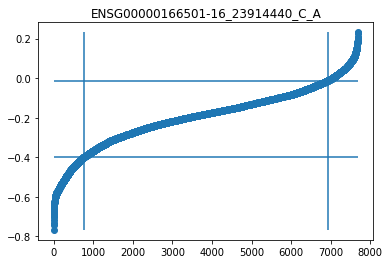

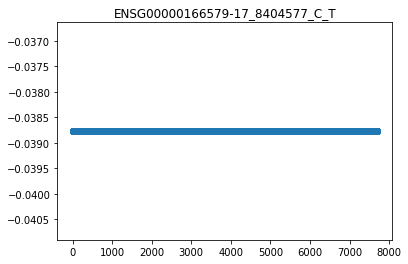

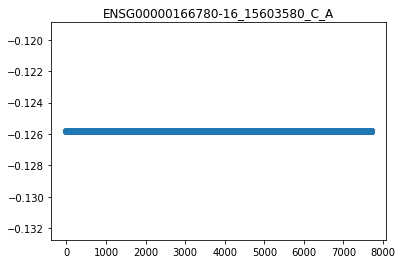

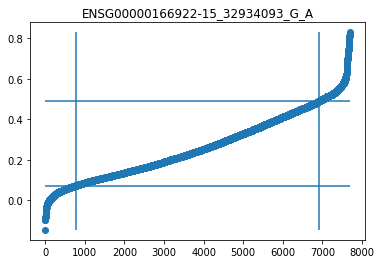

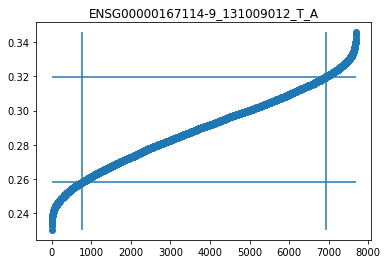

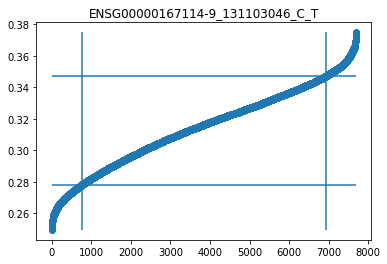

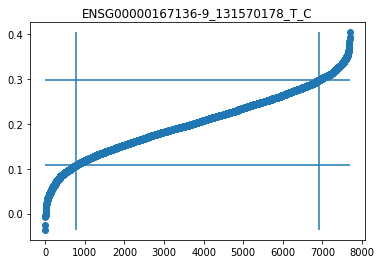

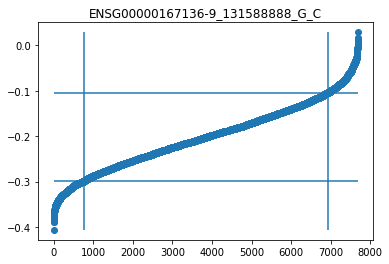

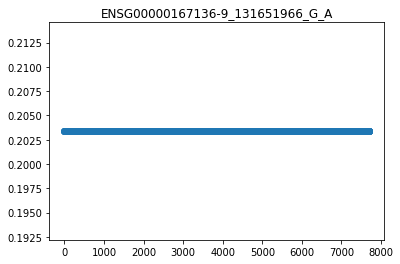

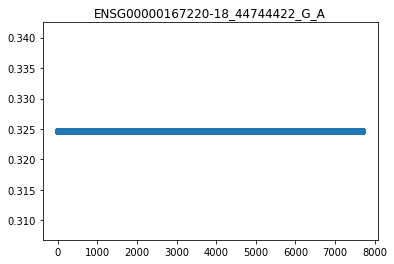

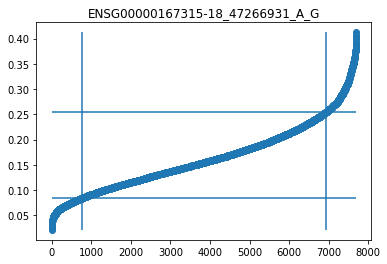

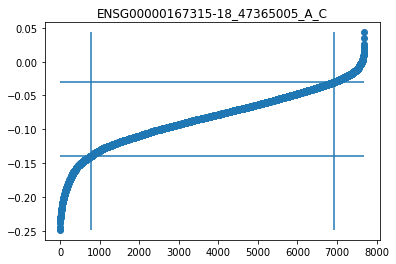

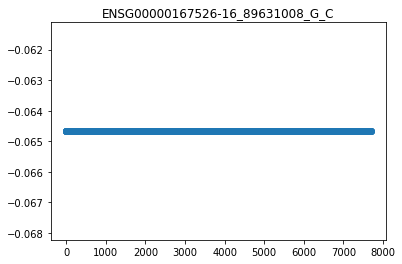

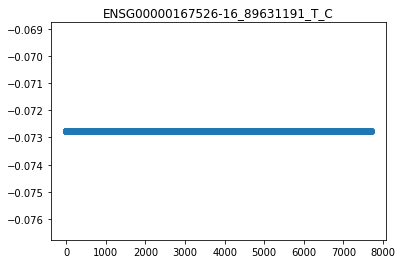

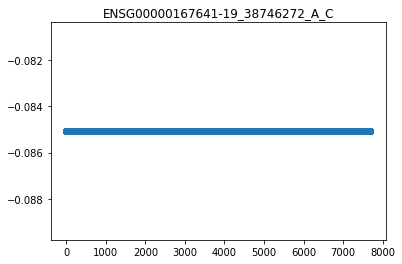

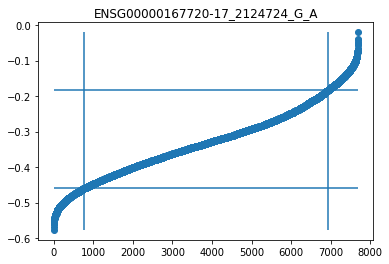

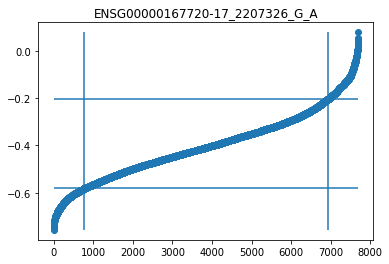

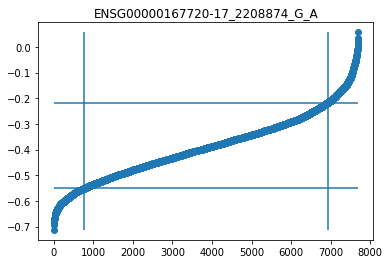

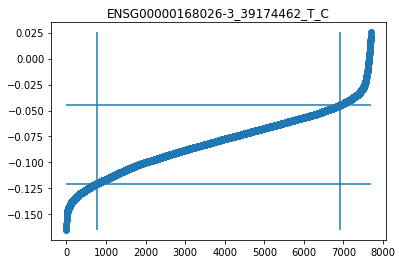

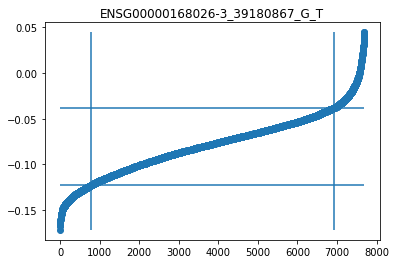

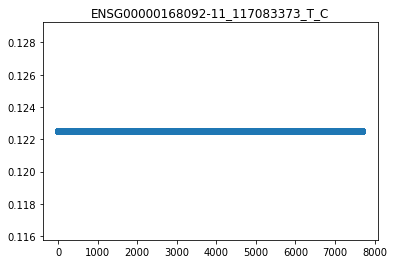

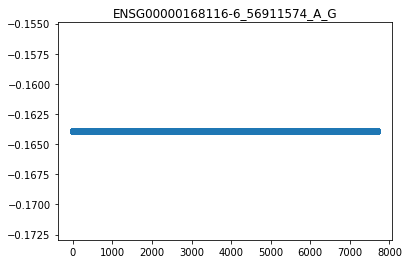

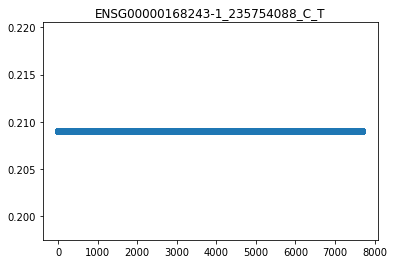

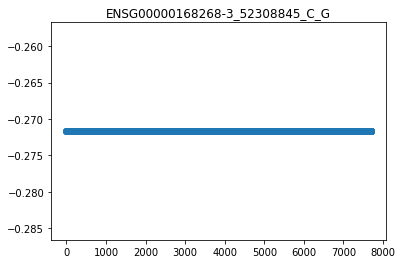

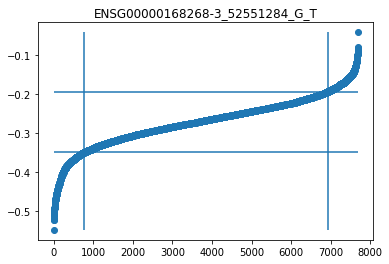

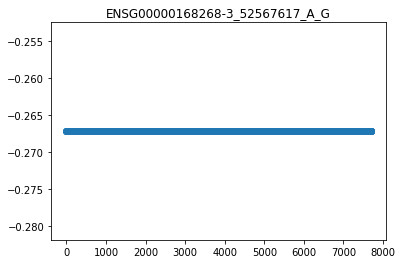

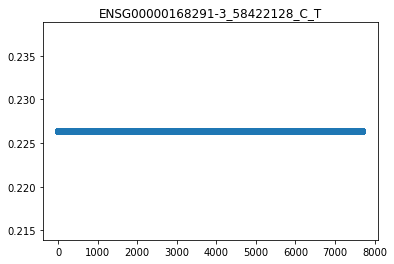

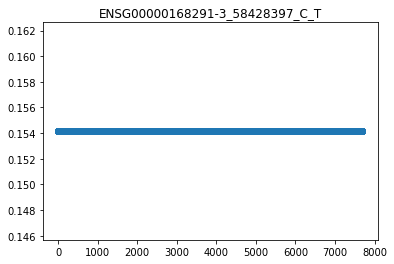

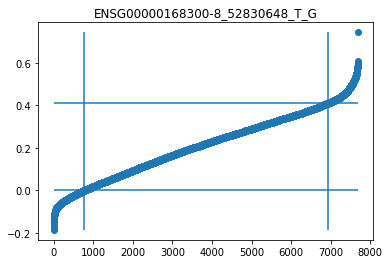

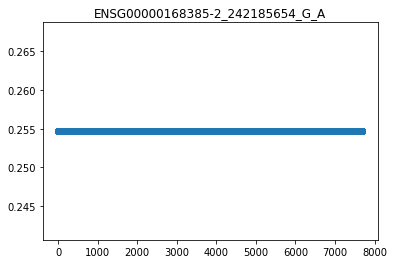

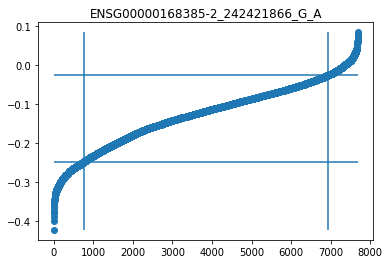

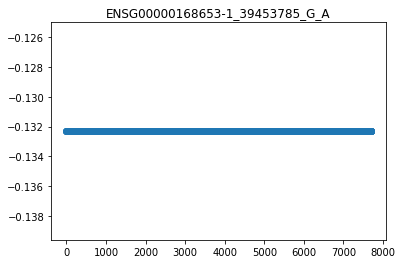

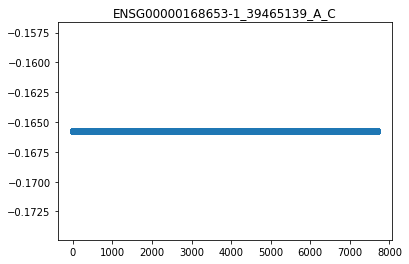

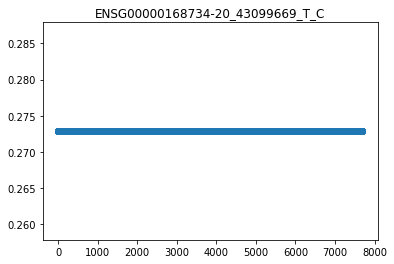

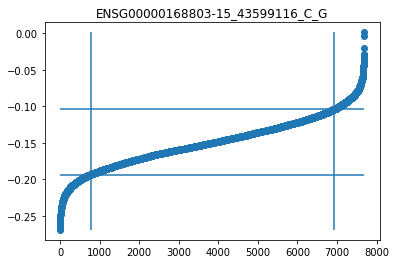

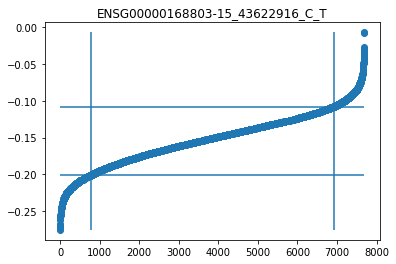

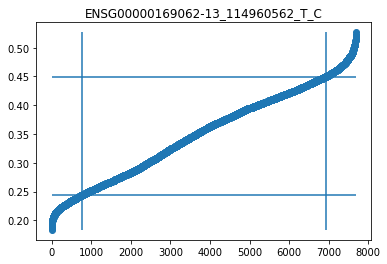

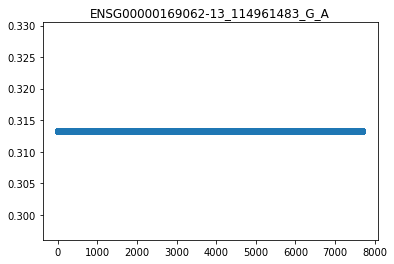

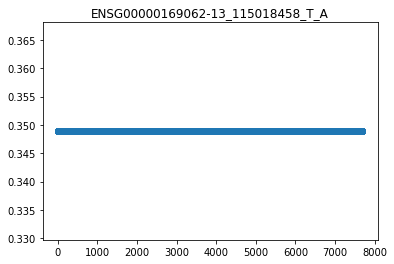

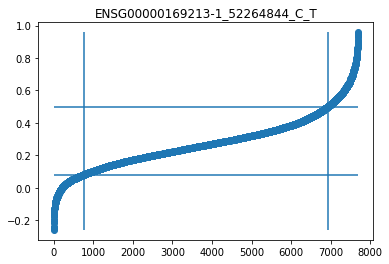

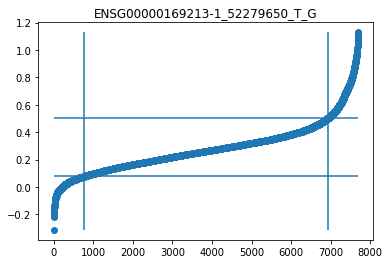

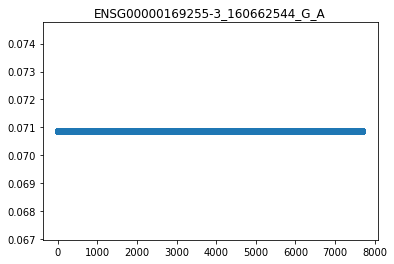

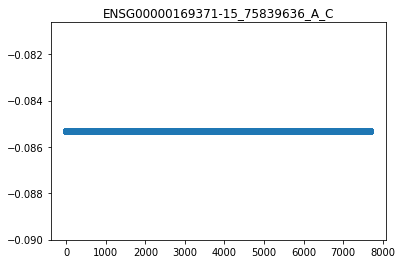

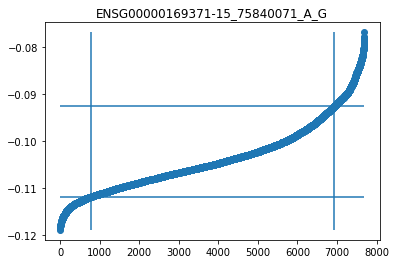

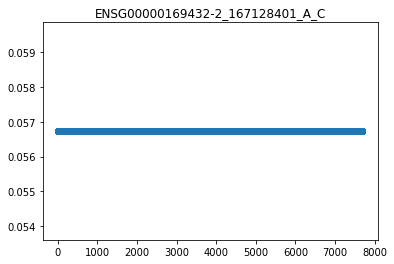

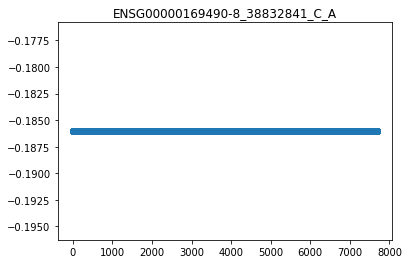

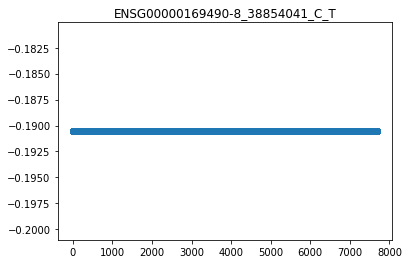

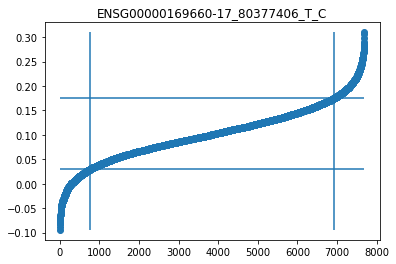

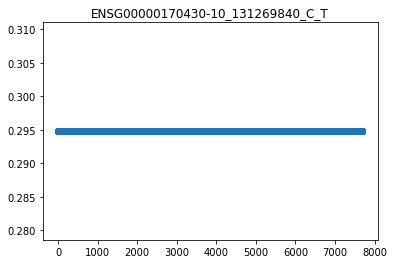

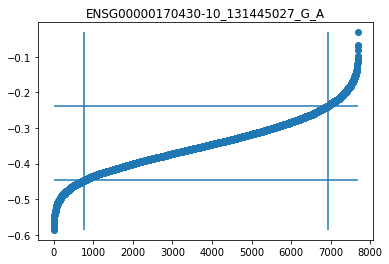

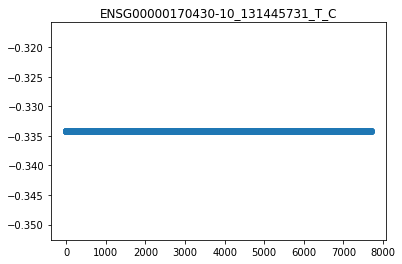

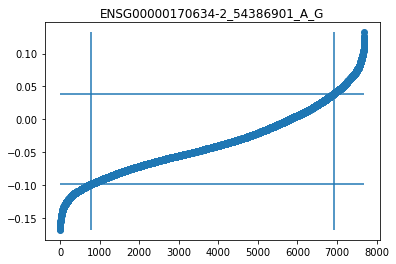

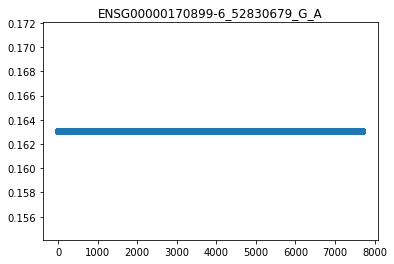

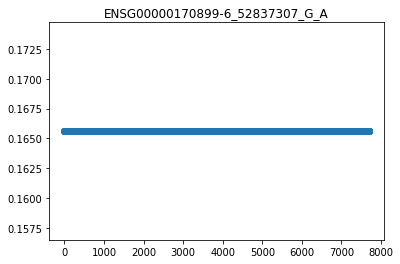

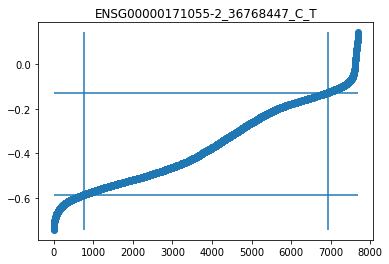

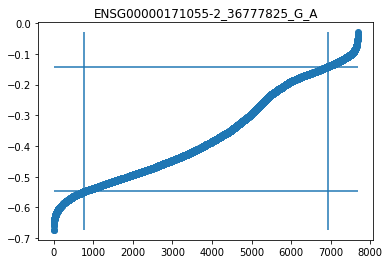

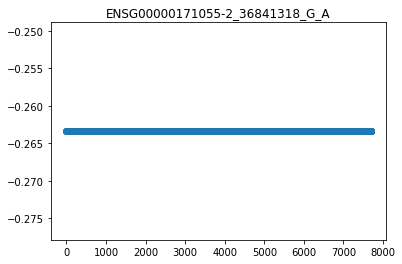

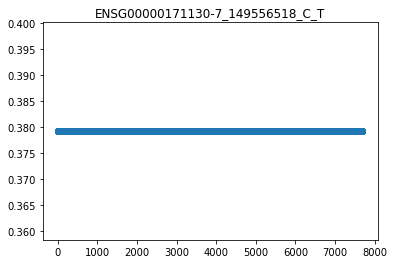

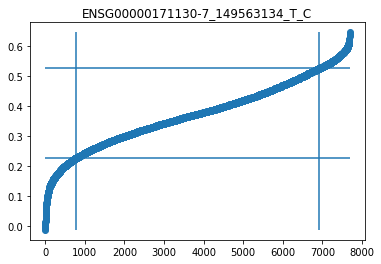

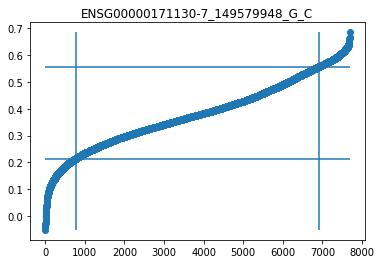

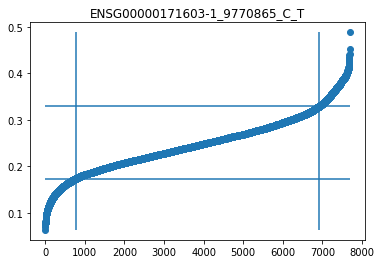

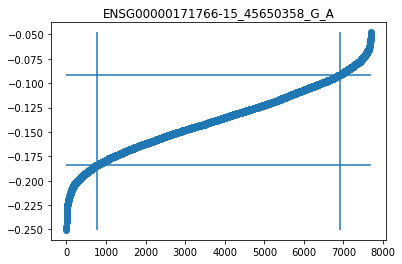

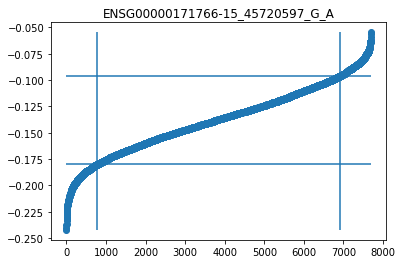

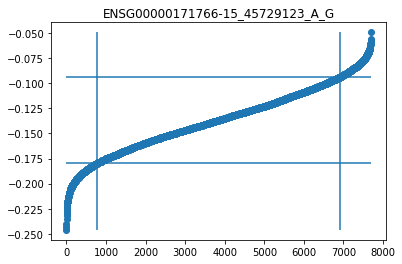

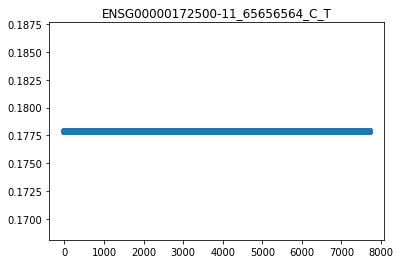

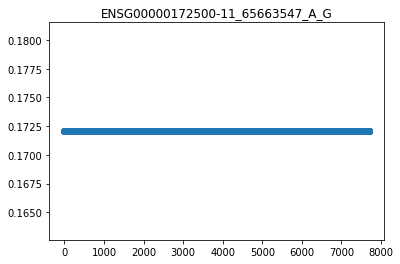

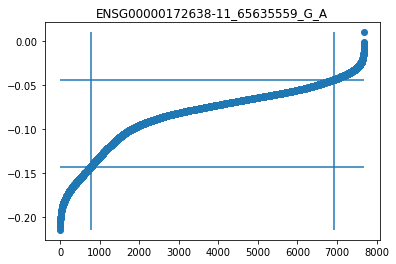

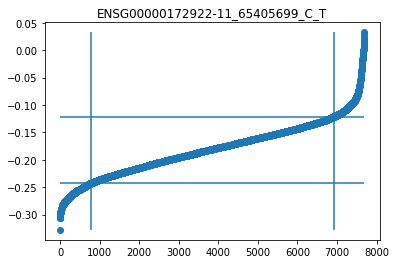

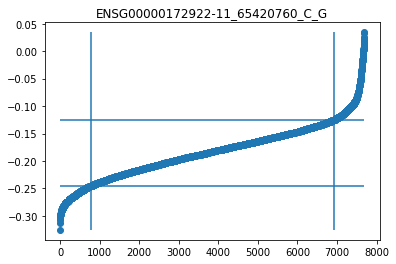

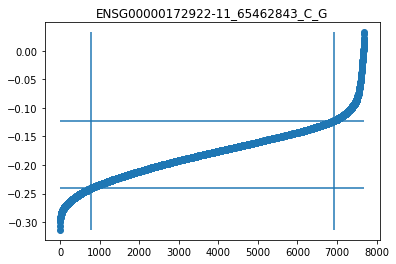

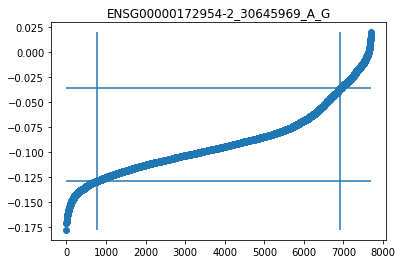

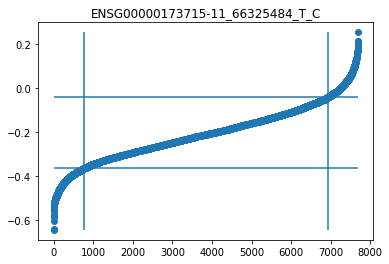

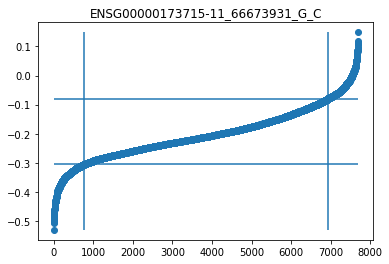

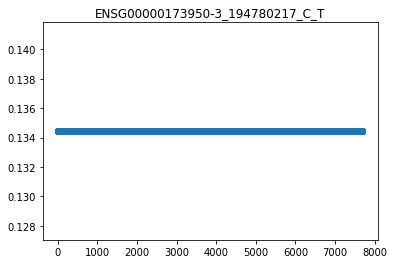

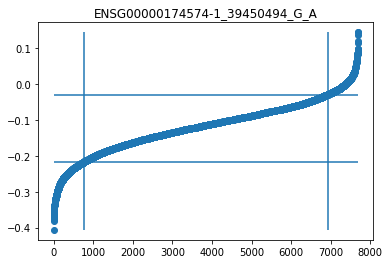

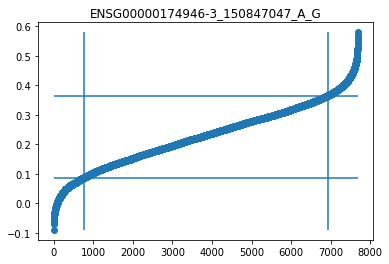

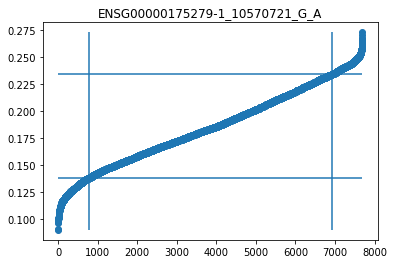

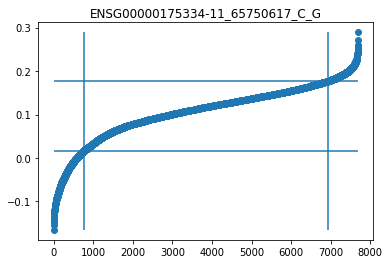

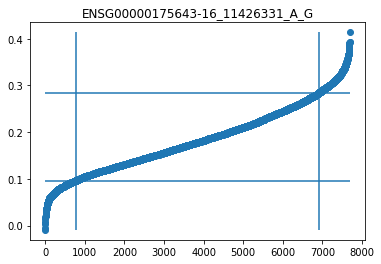

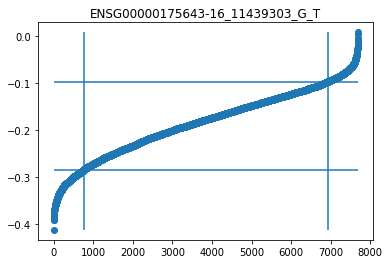

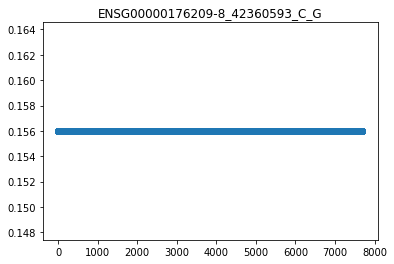

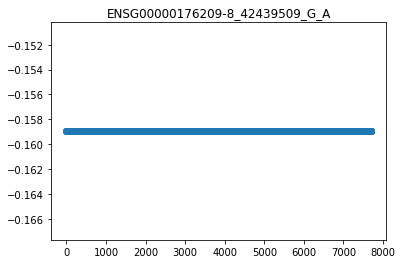

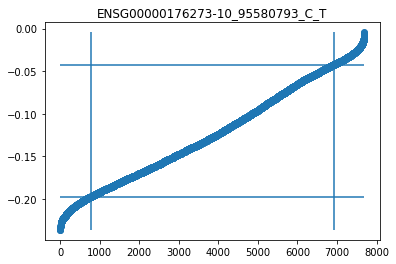

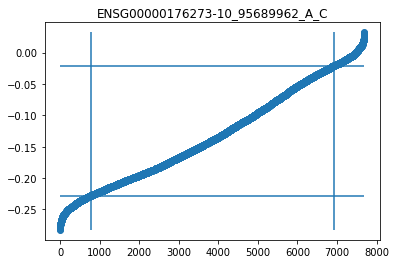

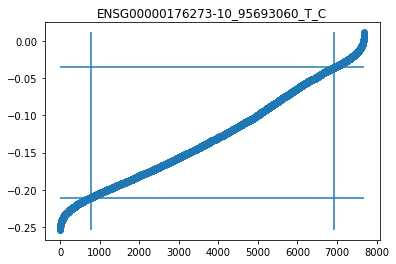

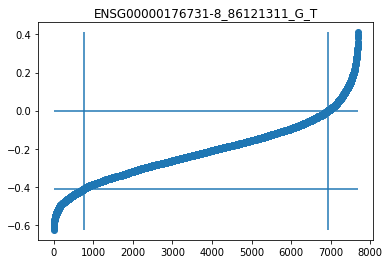

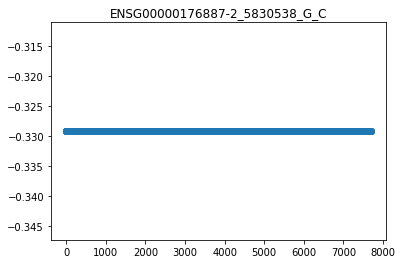

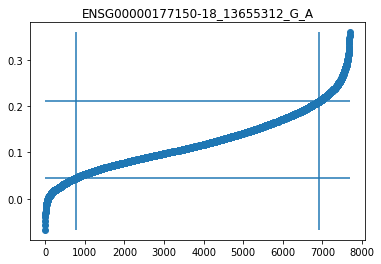

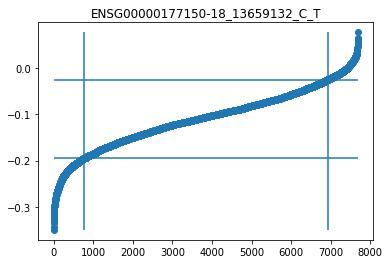

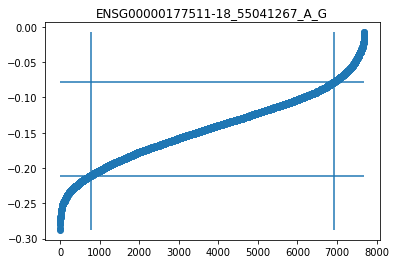

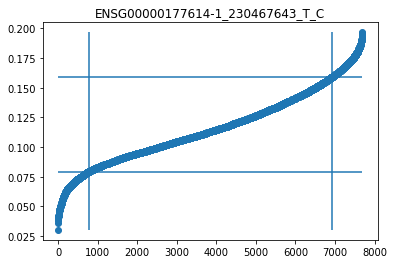

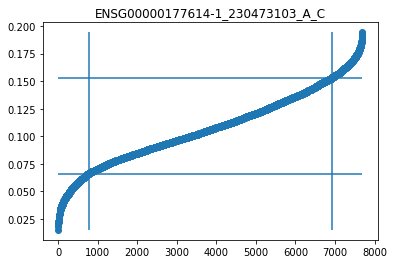

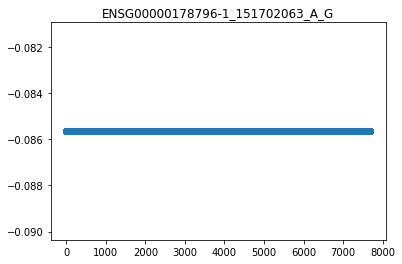

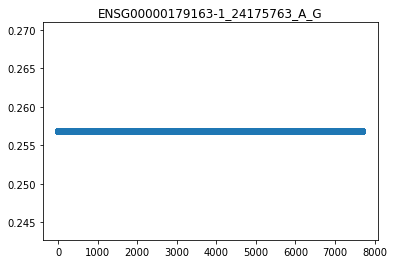

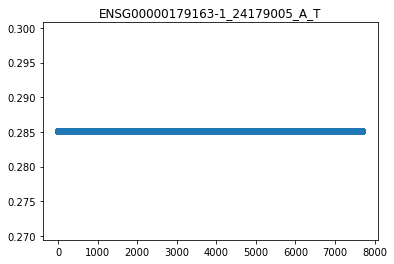

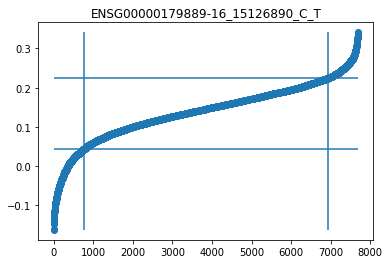

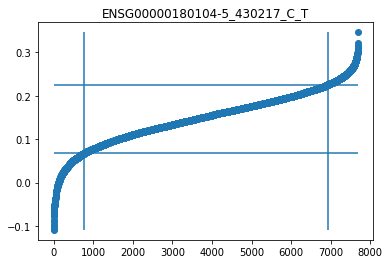

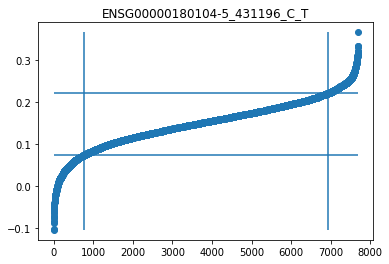

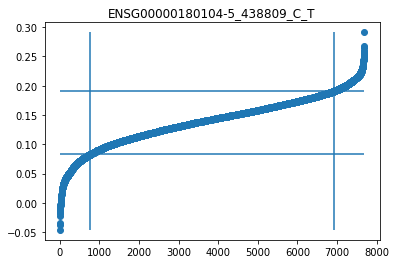

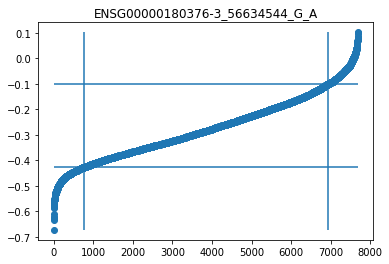

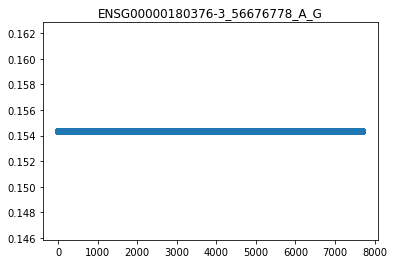

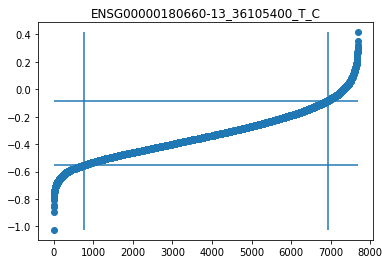

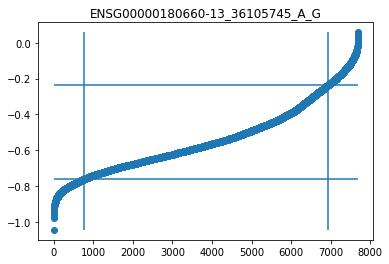

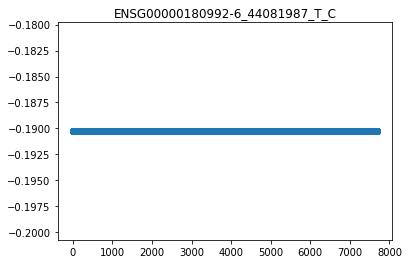

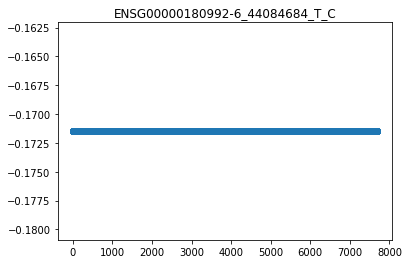

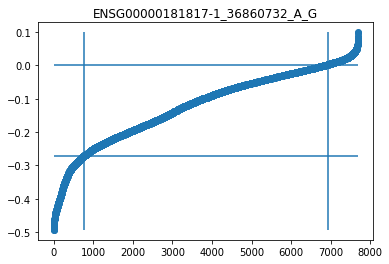

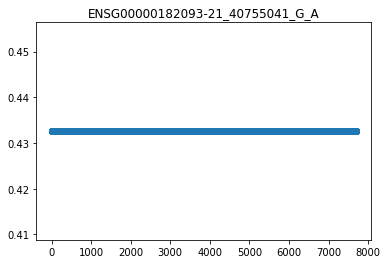

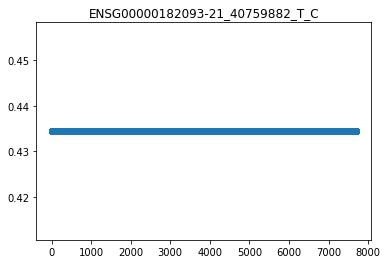

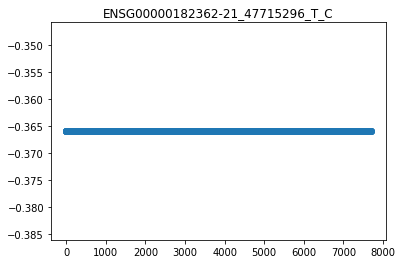

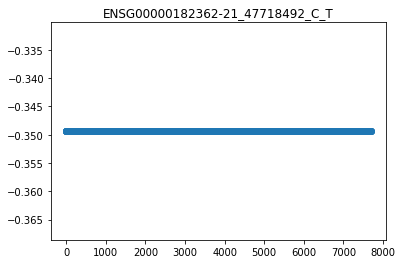

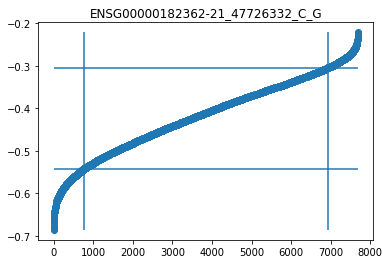

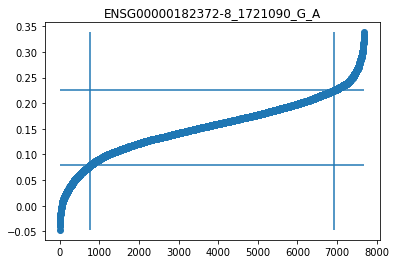

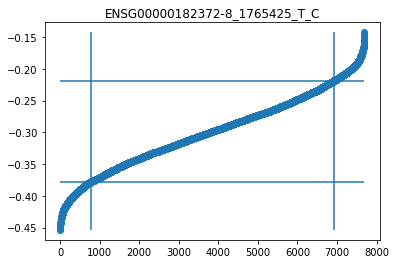

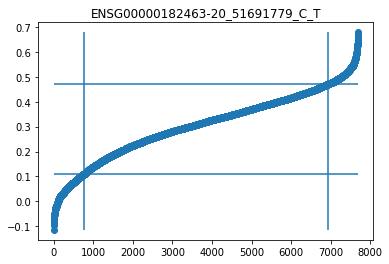

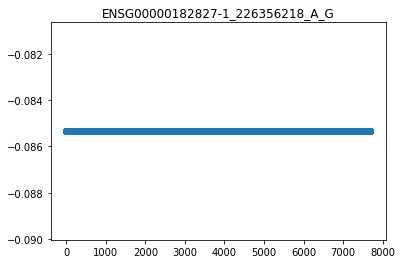

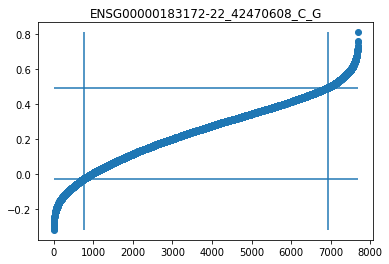

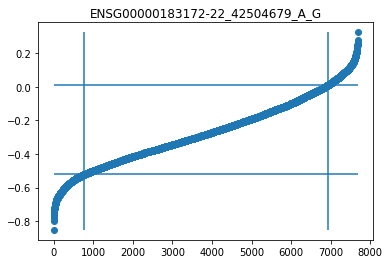

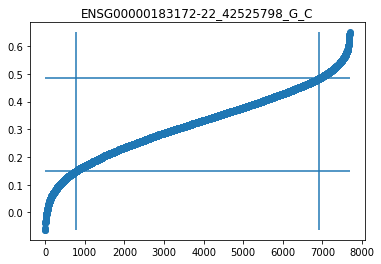

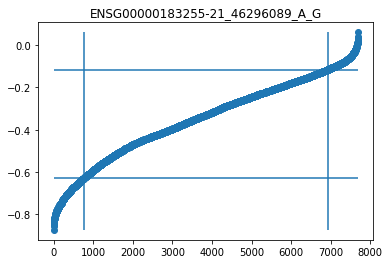

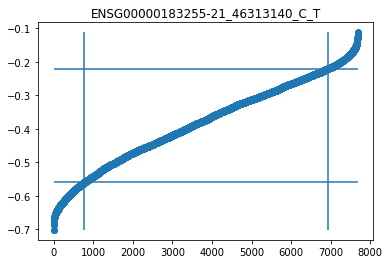

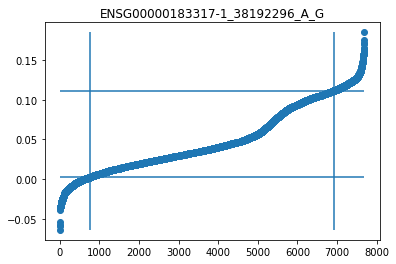

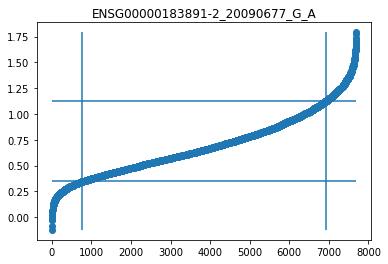

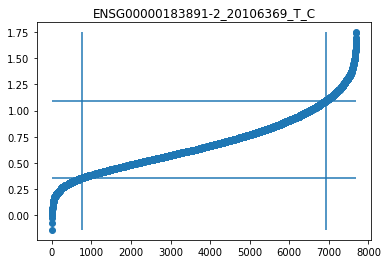

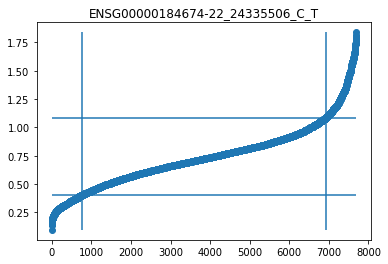

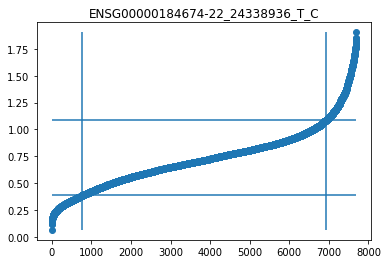

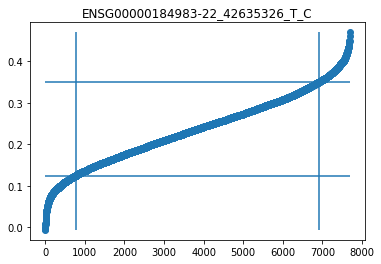

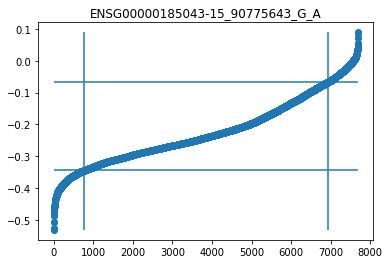

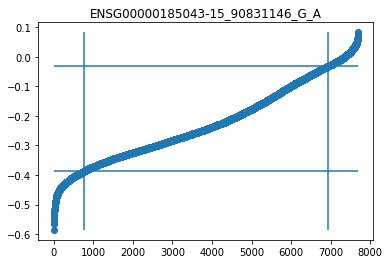

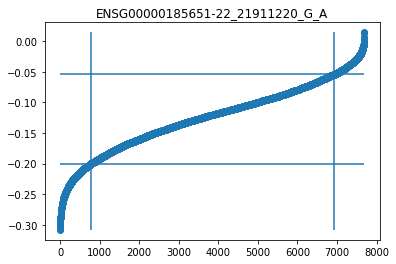

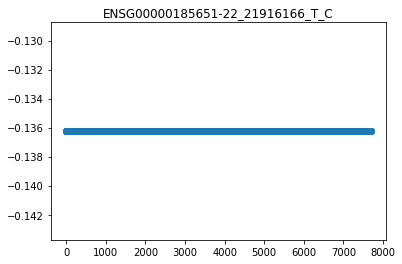

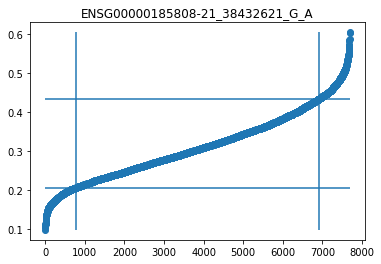

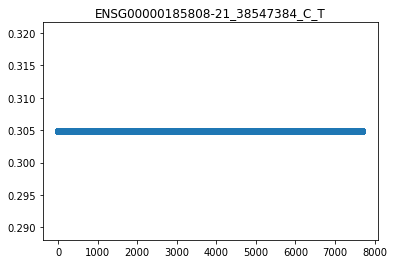

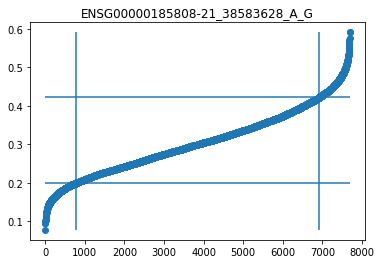

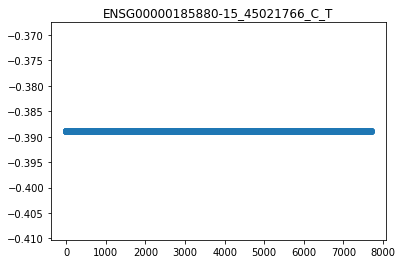

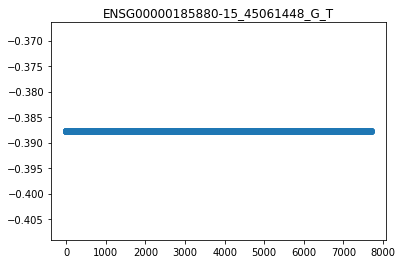

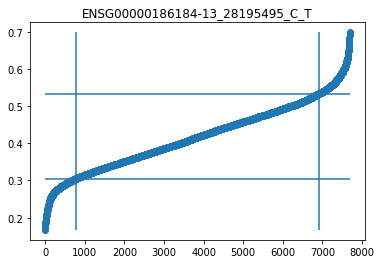

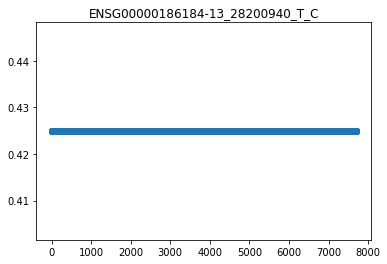

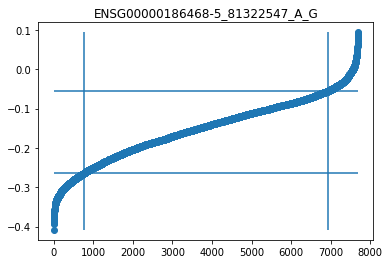

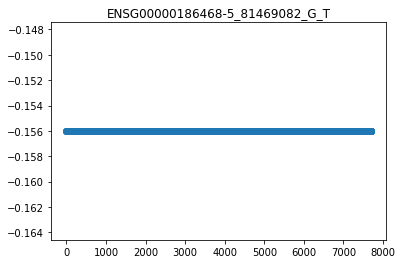

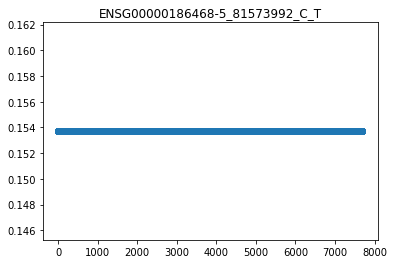

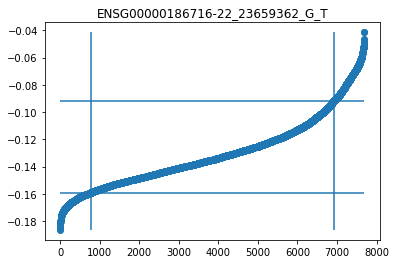

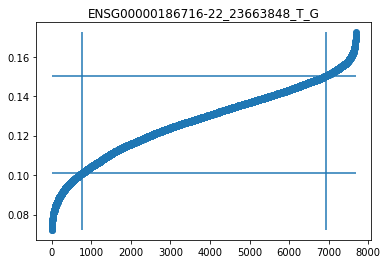

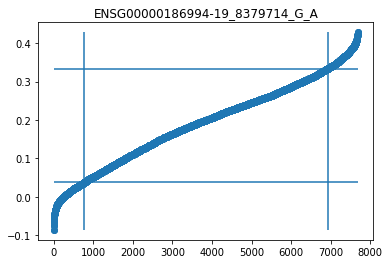

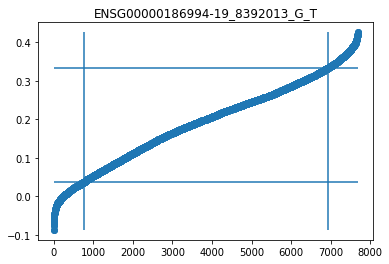

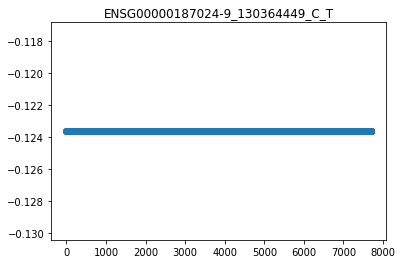

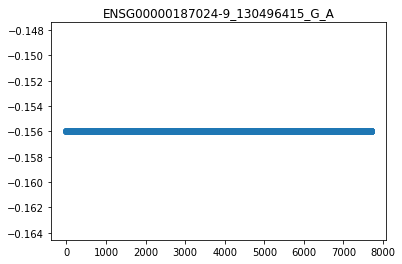

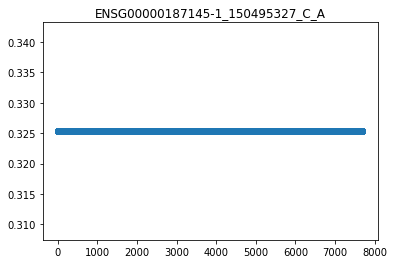

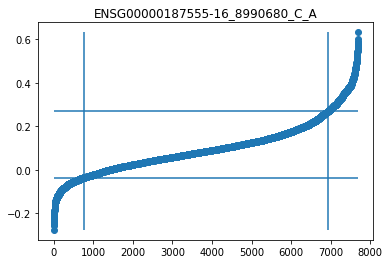

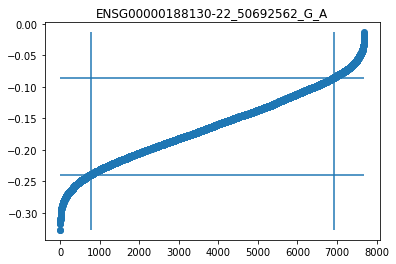

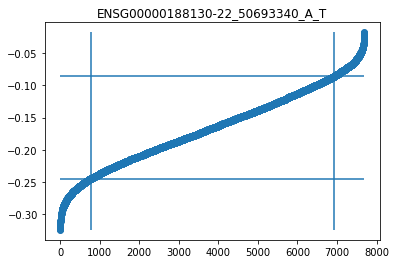

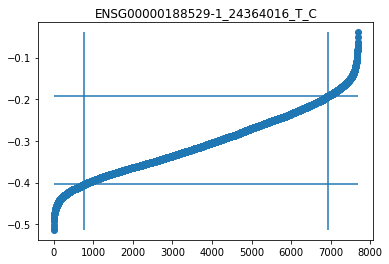

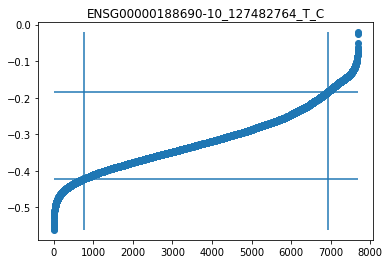

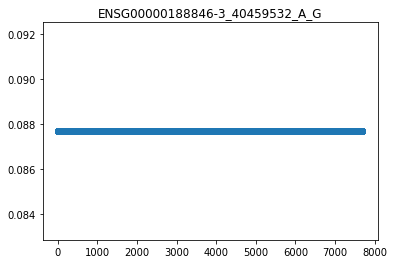

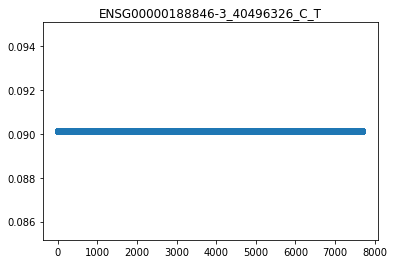

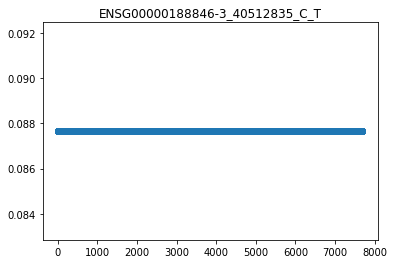

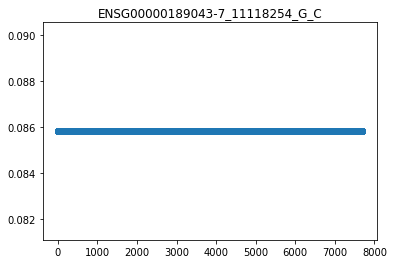

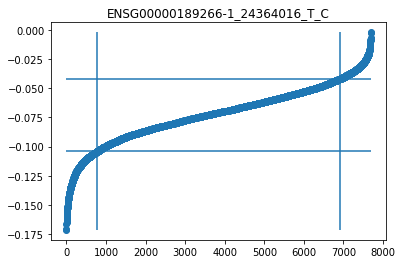

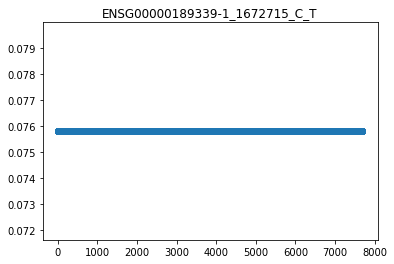

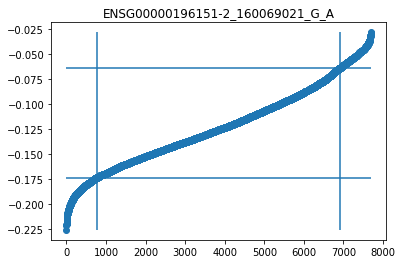

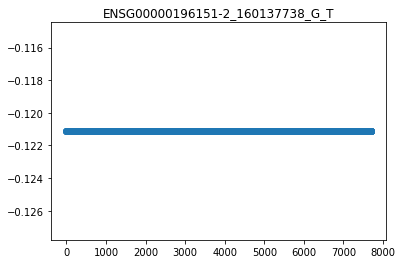

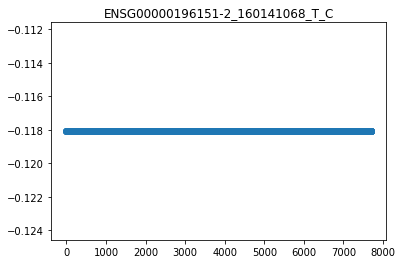

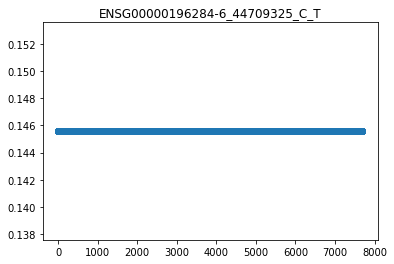

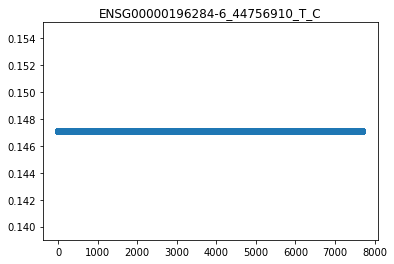

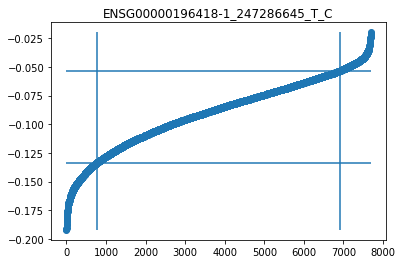

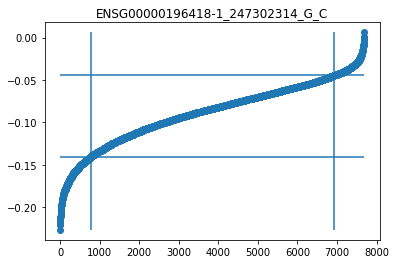

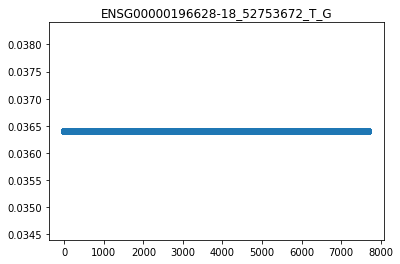

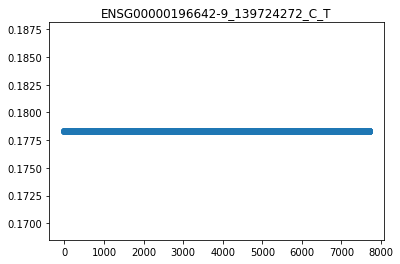

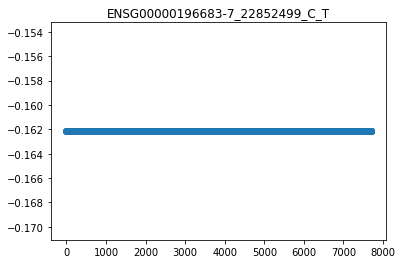

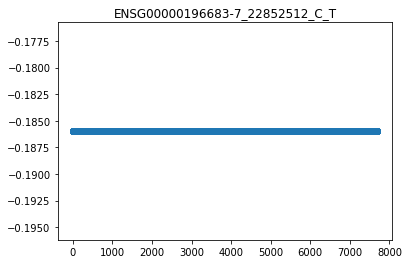

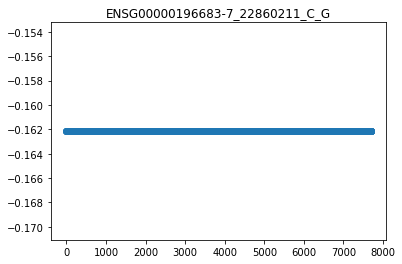

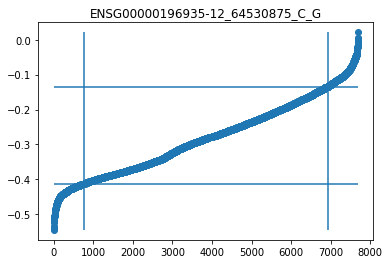

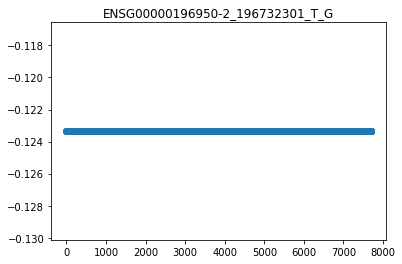

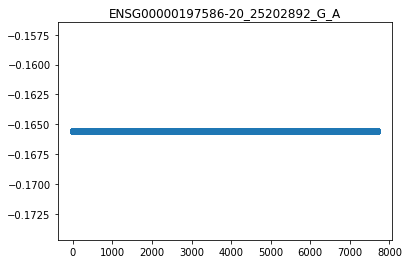

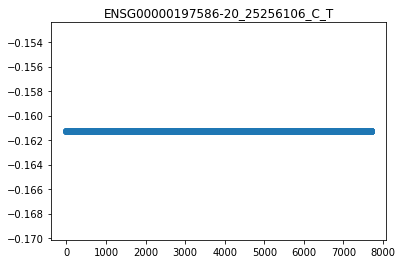

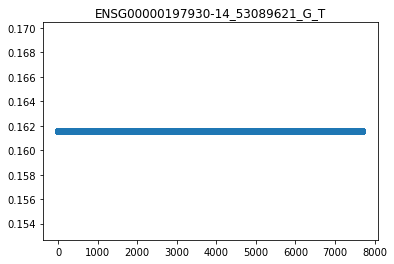

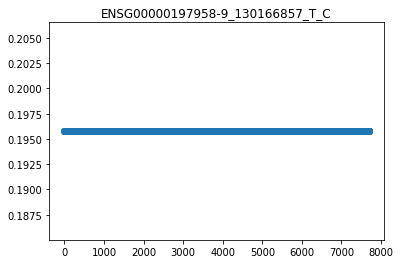

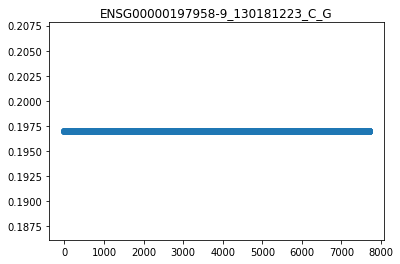

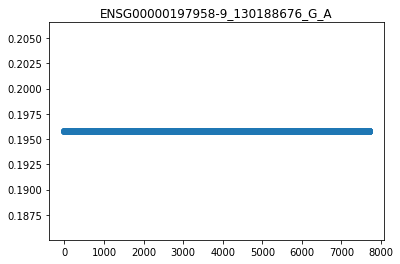

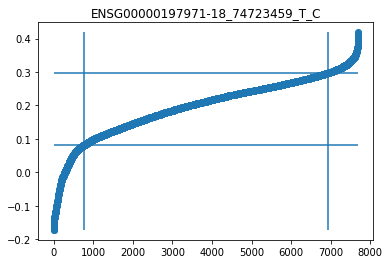

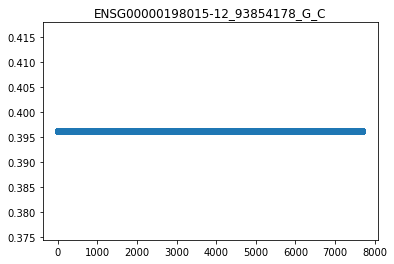

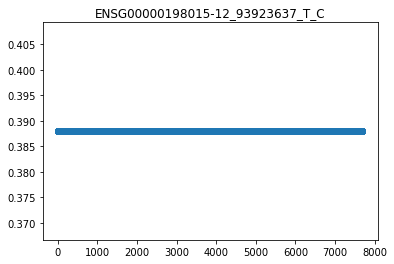

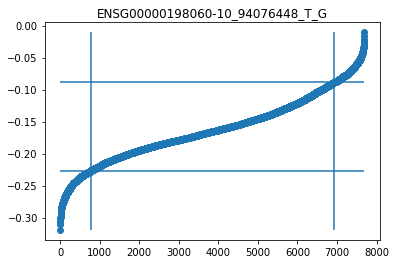

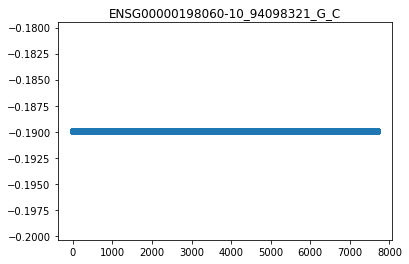

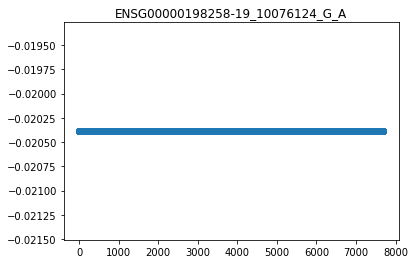

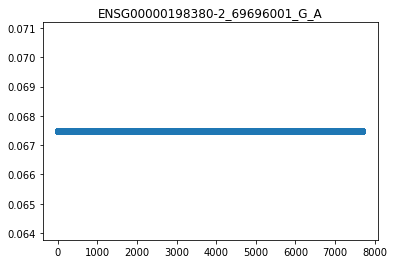

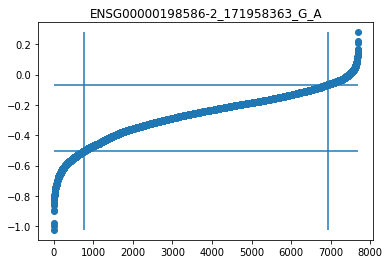

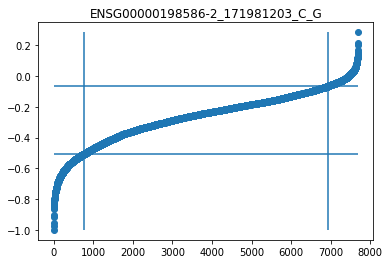

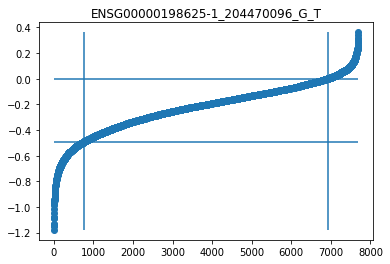

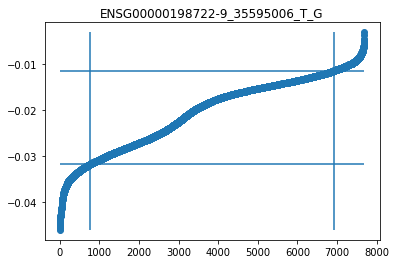

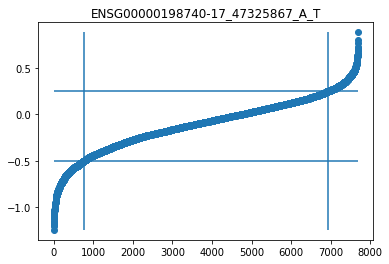

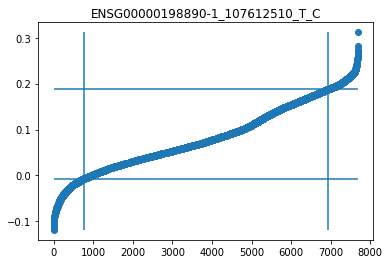

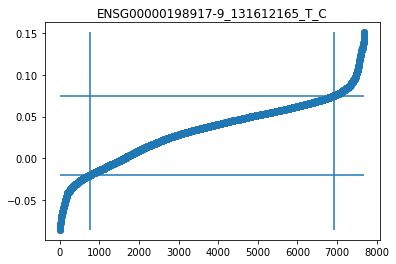

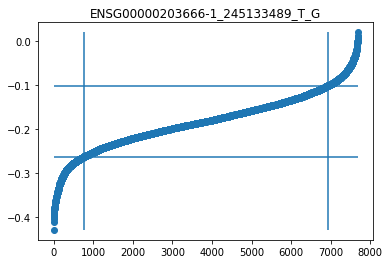

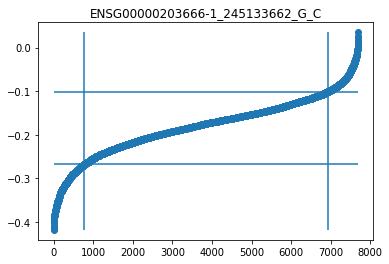

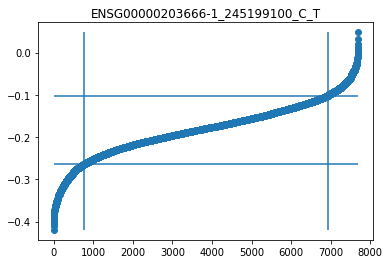

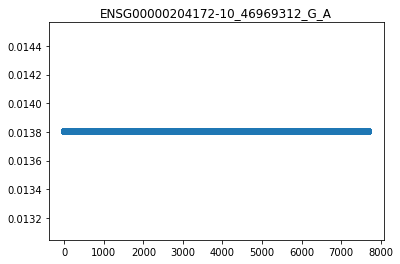

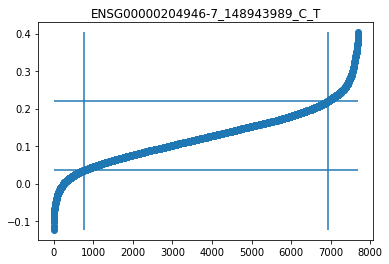

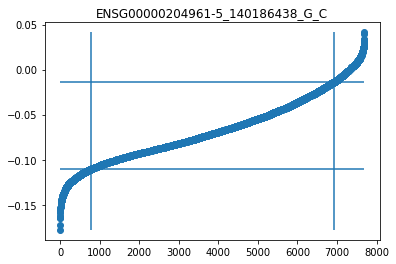

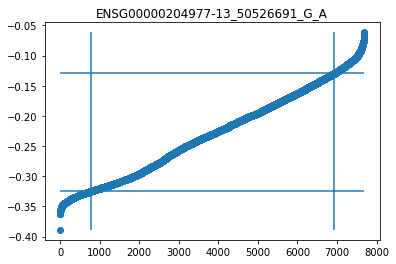

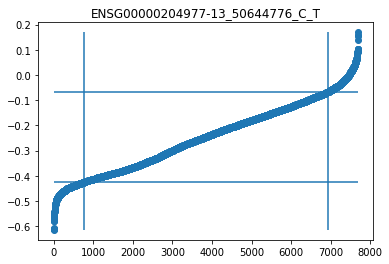

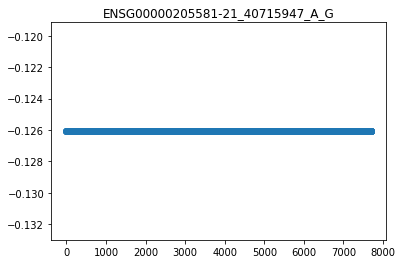

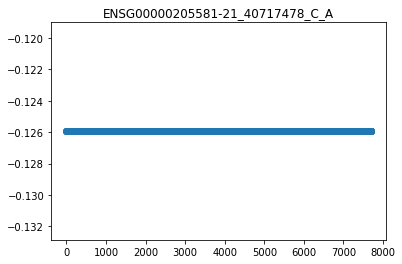

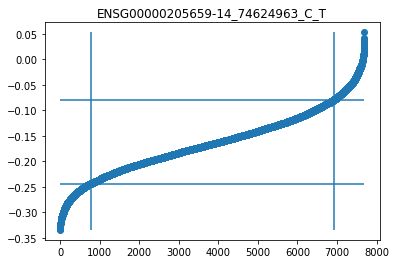

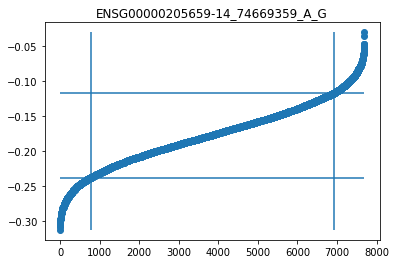

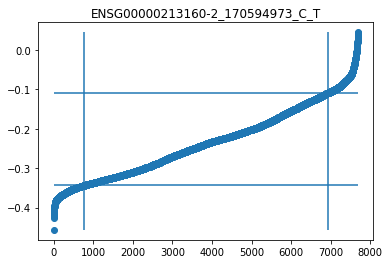

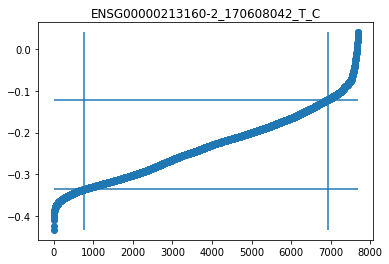

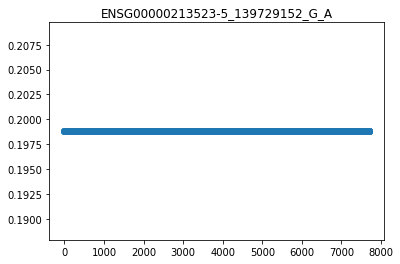

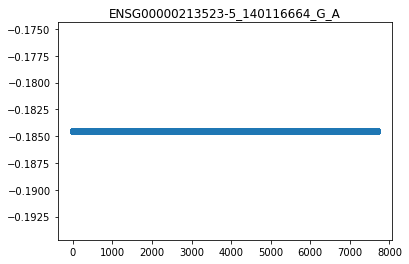

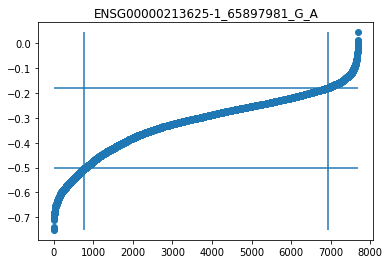

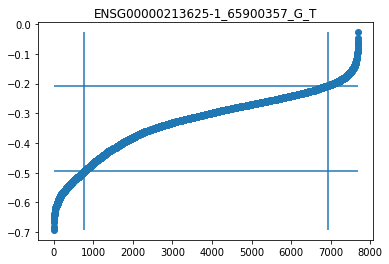

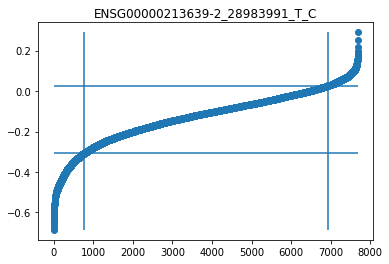

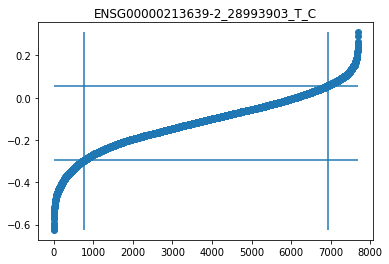

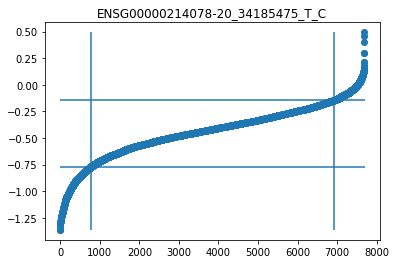

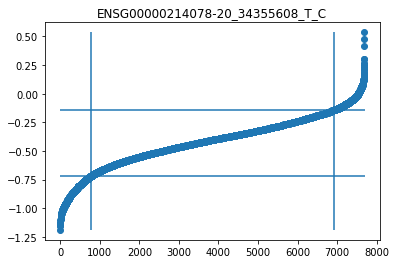

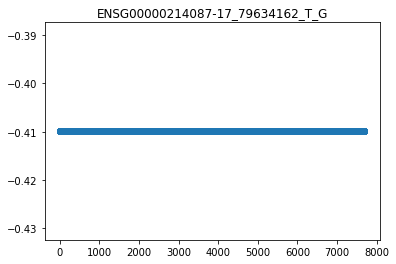

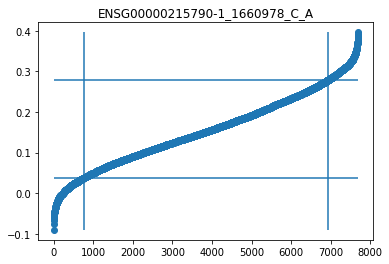

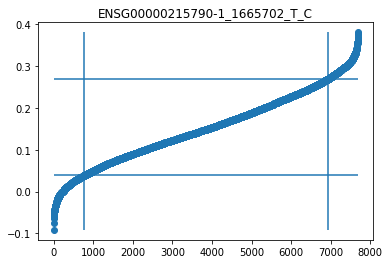

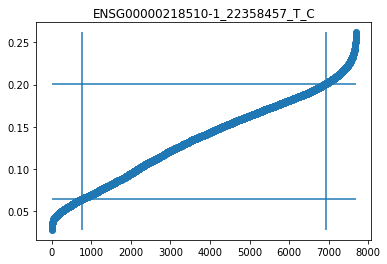

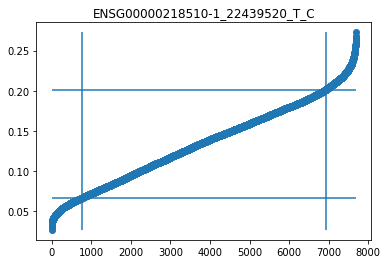

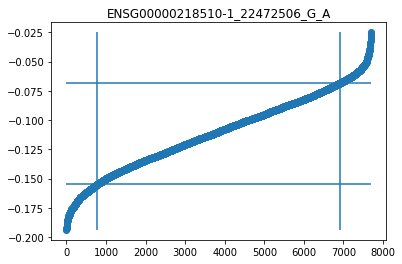

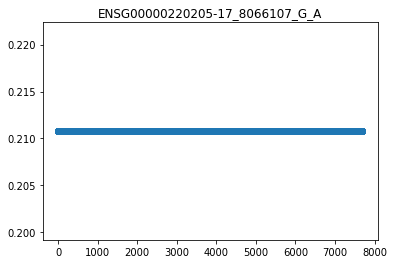

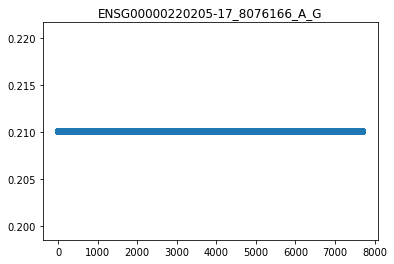

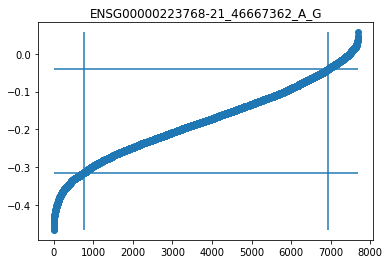

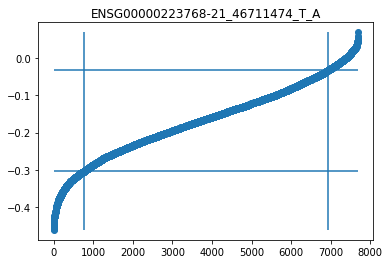

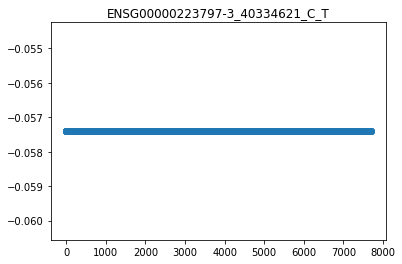

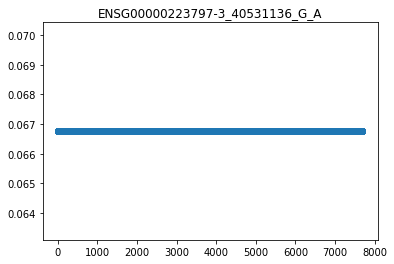

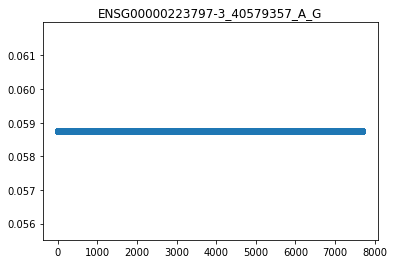

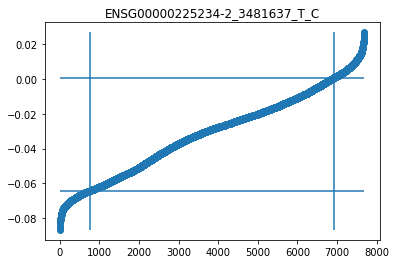

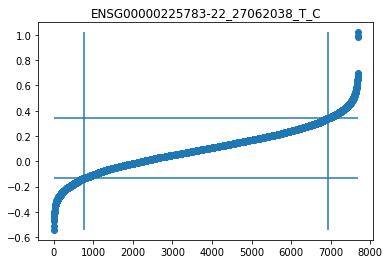

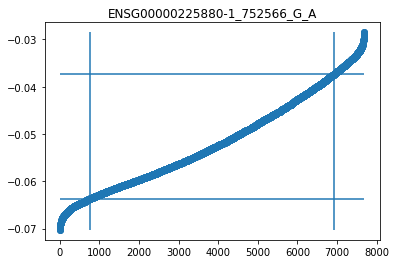

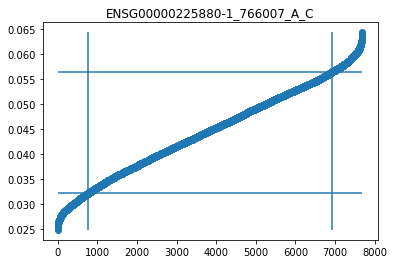

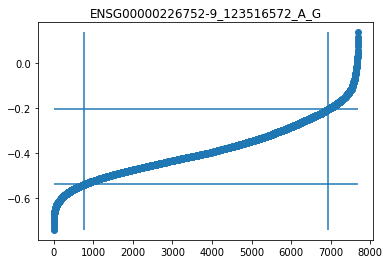

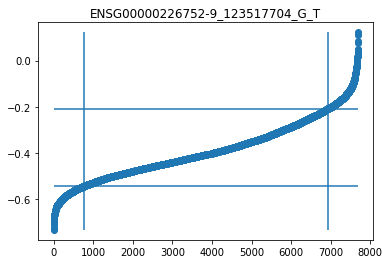

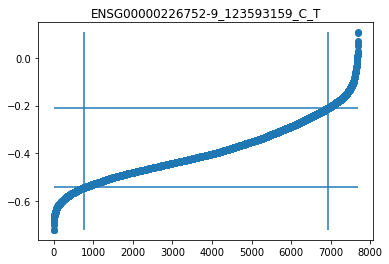

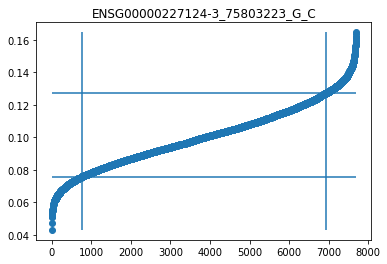

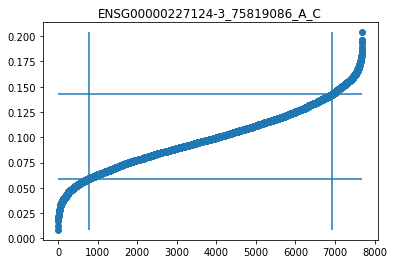

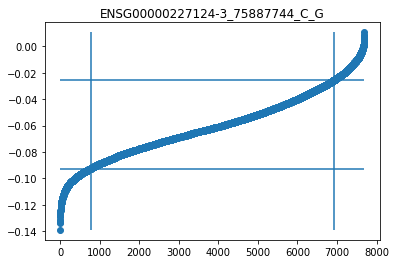

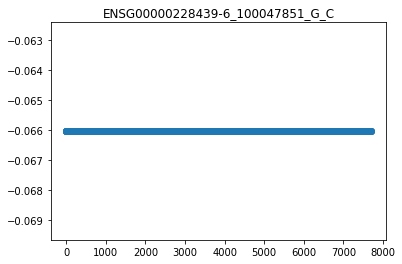

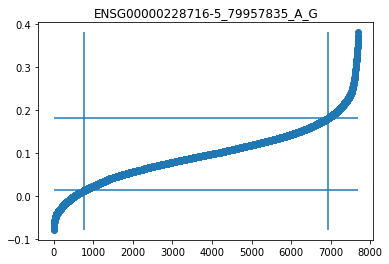

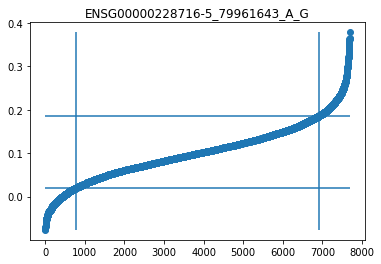

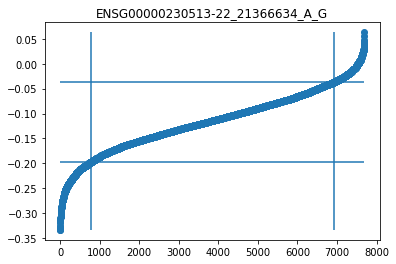

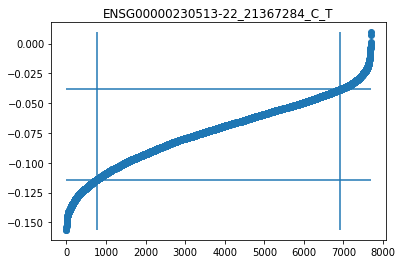

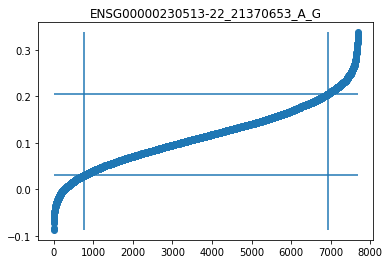

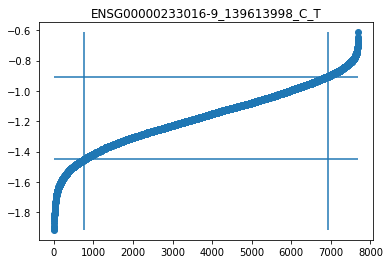

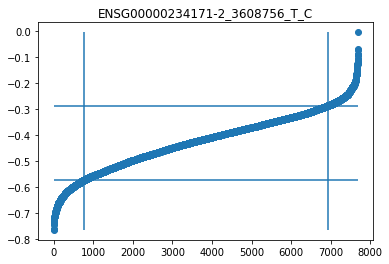

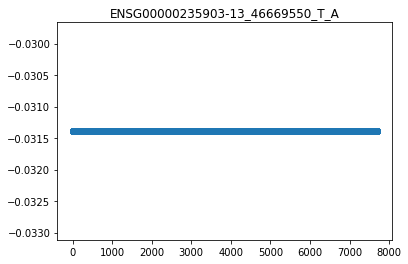

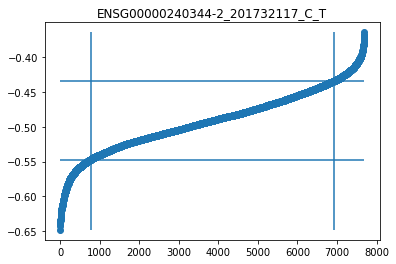

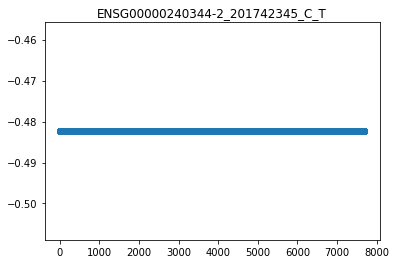

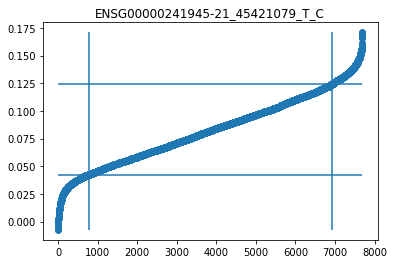

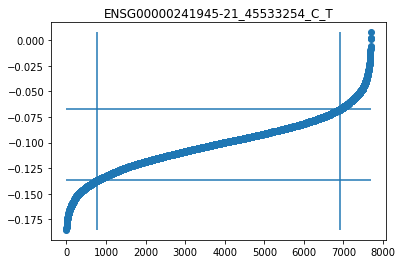

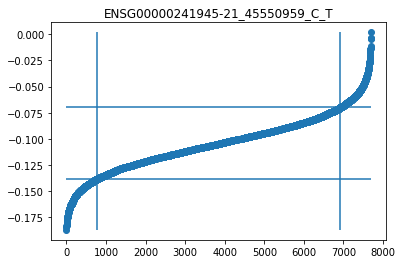

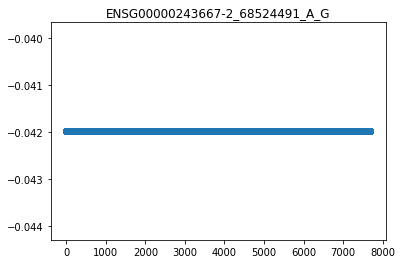

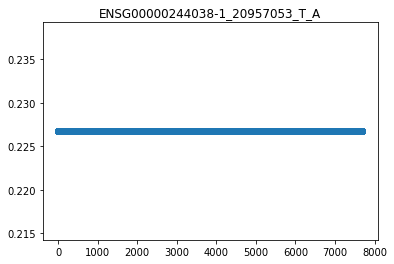

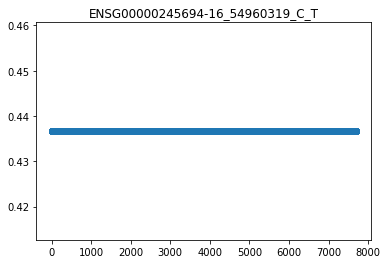

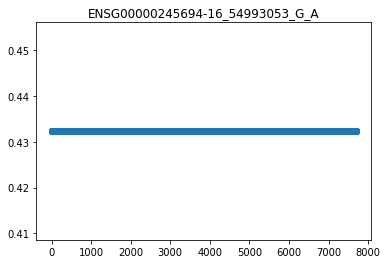

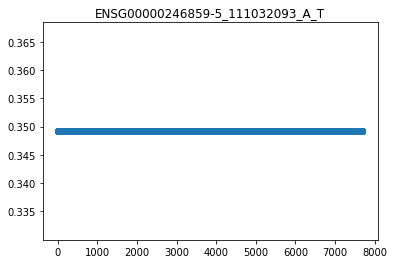

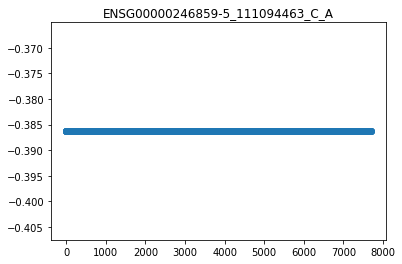

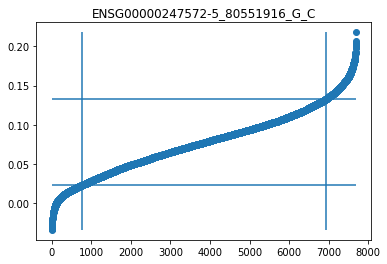

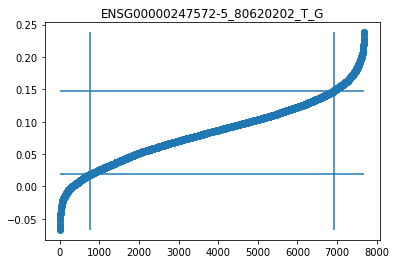

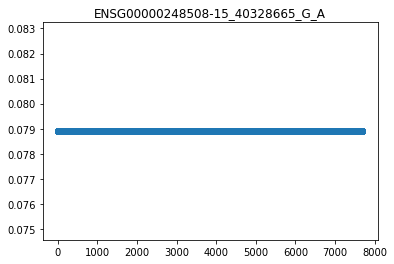

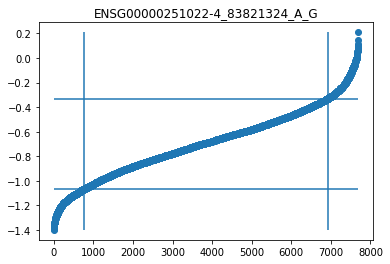

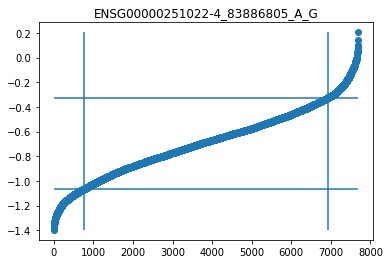

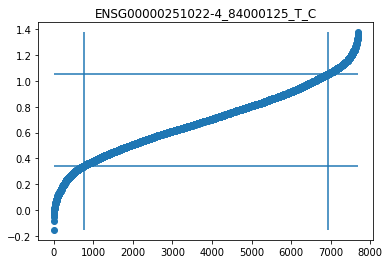

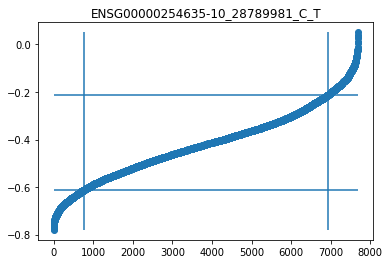

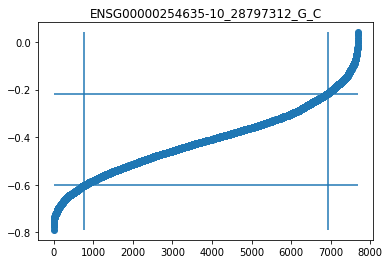

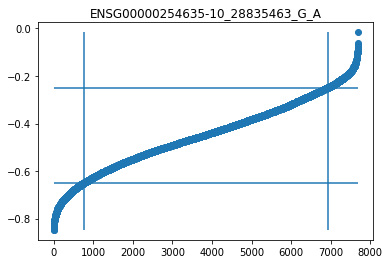

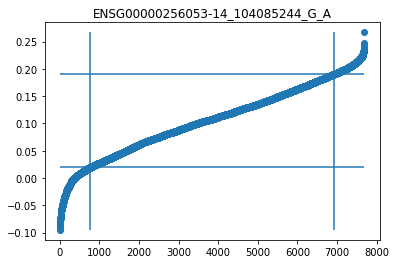

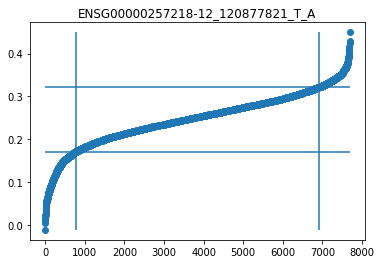

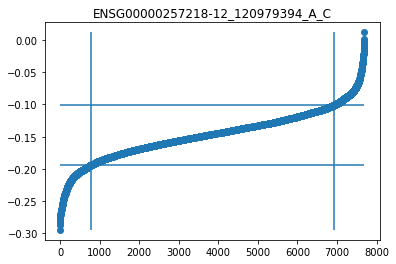

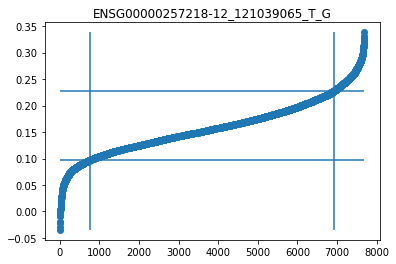

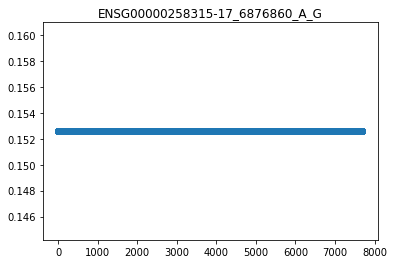

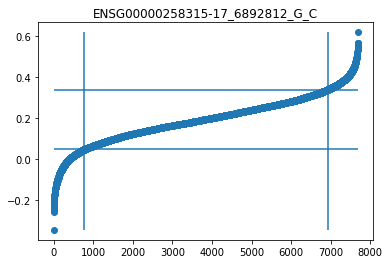

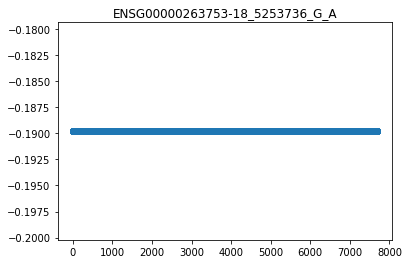

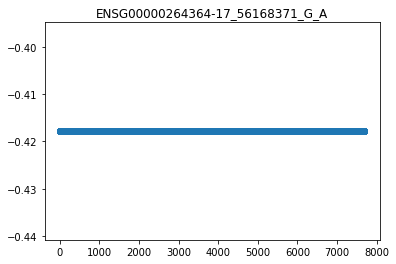

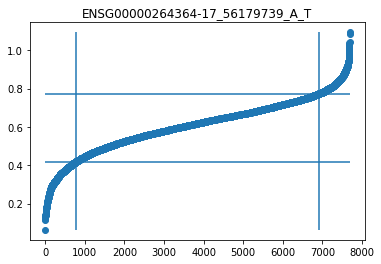

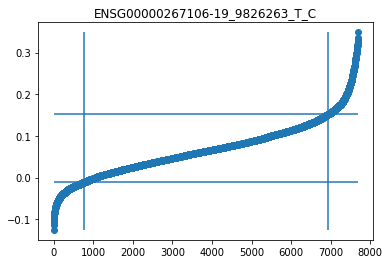

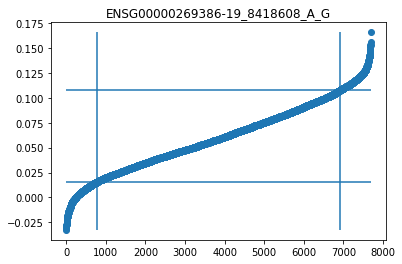

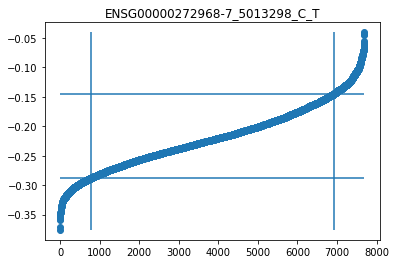

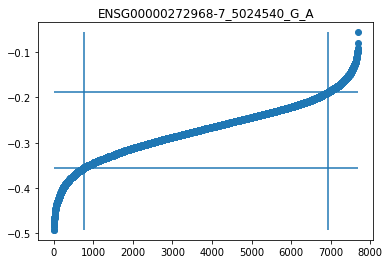

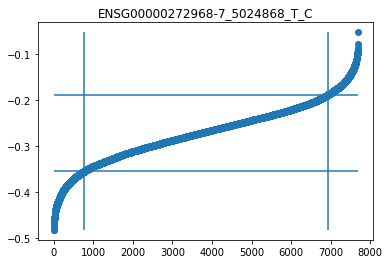

In [332]:
beta = np.array([])
for i in range(df.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = df.values[:,i]
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
    plt.title(df.columns.values[i])
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

In [333]:
beta.shape
df.columns.values.shape

(716,)

In [334]:
d = np.concatenate([beta.reshape(beta.shape[0],1),df.columns.values.reshape(beta.shape[0],1)], axis=1)
df_beta = pd.DataFrame(data = d, columns = ["beta","eqtl"])
df_beta.head()

beta                             eqtl
0  0.449925  ENSG00000006282-17_48615329_G_A
1       0.0  ENSG00000007341-1_113094022_G_A
2       0.0   ENSG00000008988-8_56894421_G_T
3       0.0   ENSG00000008988-8_56969683_T_C
4       0.0   ENSG00000008988-8_56996675_C_T

In [335]:
df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/PCA/genetic_effects/PCA15/eqtl_est_single_genetic_effects.csv")

In [336]:
max(beta)

1.652996373886293

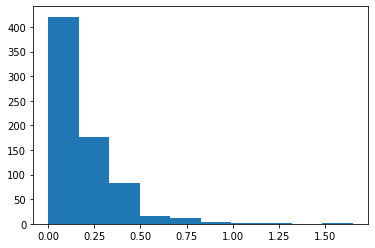

In [337]:
plt.hist(beta)
plt.show()

In [338]:
len(beta[beta>0])

453

In [339]:
len(beta[beta>0.1])

393

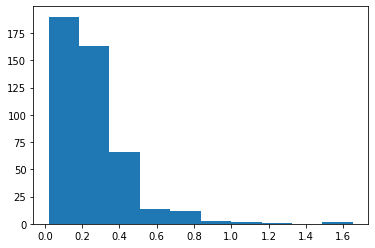

In [340]:
plt.hist(beta[beta>0])
plt.show()

In [341]:
beta[beta.argsort()]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [342]:
df_beta[df_beta["beta"]>0.8]

beta                            eqtl
10   1.652996   ENSG00000049247-1_7929819_T_C
11   1.530516   ENSG00000049247-1_7939923_T_A
177  0.854716  ENSG00000117569-1_97122353_G_T
178   0.85636  ENSG00000117569-1_97153245_G_A
232  1.206443  ENSG00000132507-17_7207964_A_C
288  1.017736  ENSG00000138767-4_78626271_T_G
289  1.018215  ENSG00000138767-4_78754433_T_C
290    0.9264  ENSG00000138767-4_78804343_A_T

In [343]:
df_betas_sel = df_beta[df_beta["beta"]>0.1]
df_betas_sel.head()

beta                             eqtl
0   0.449925  ENSG00000006282-17_48615329_G_A
6   0.105329  ENSG00000013573-12_31265823_A_G
7    0.10552  ENSG00000013573-12_31265925_C_G
8   0.188484   ENSG00000016391-3_53855083_C_T
10  1.652996    ENSG00000049247-1_7929819_T_C

In [344]:
eqtls = np.array(df_betas_sel["eqtl"])
# eqtls

In [345]:
df = df.loc[:,eqtls]
df.shape

(7691, 393)

In [346]:
### UMAP coordinates
umaps_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/PCA/umap_PC15.csv"
df_umaps = pd.read_csv(umaps_filename, index_col=0)
df_umaps.head()
df_umaps.index

Index(['iudw_1-d30-cluster0', 'iudw_1-d30-cluster1', 'iudw_1-d30-cluster2',
       'iudw_1-d30-cluster3', 'iudw_1-d30-cluster4', 'iudw_1-d30-cluster5',
       'iudw_1-d30-cluster7', 'iudw_1-d30-cluster8', 'iudw_1-d30-cluster9',
       'iudw_1-d30-cluster10',
       ...
       'rozh_4-d52_tr-cluster3', 'rozh_4-d52_tr-cluster4',
       'rozh_4-d52_tr-cluster5', 'rozh_4-d52_tr-cluster6',
       'rozh_4-d52_tr-cluster7', 'rozh_4-d52_tr-cluster8',
       'rozh_4-d52_tr-cluster9', 'rozh_4-d52_tr-cluster10',
       'rozh_4-d52_tr-cluster11', 'rozh_4-d52_tr-cluster12'],
      dtype='object', length=8237)

In [347]:
## consider only shared cells

In [348]:
all_cells = df_umaps.index.values

In [349]:
## sample p% of cells
p=1

In [350]:
cells = sample(list(all_cells), k = ceil(len(all_cells)*p))
cells = sorted(set(list(df.index.values)).intersection(cells))

In [351]:
df = df[df.index.isin(cells)]
df.shape

(7460, 393)

In [352]:
df_umaps = df_umaps[df_umaps.index.isin(cells)]
df_umaps.shape

(7460, 5)

In [353]:
# sort to ensure cells are in the same order
df = df.sort_index(axis=0)
df_umaps = df_umaps.sort_index(axis=0)

In [354]:
# scale values
mat = minmax_scale(df)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [355]:
# delect columns that are only 0s
df = df.loc[:, (df != 0).any(axis=0)]

In [356]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [357]:
# obs i.e. cells
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

7460

In [358]:
# vars i.e. genes (or in this case gene-SNP pairs)
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

393

In [359]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [360]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 7460 × 393

In [361]:
df_umaps.values[:,0:2]

array([[-2.75939901140957, -6.03007415005262],
       [-1.35161686854476, -6.44501453989112],
       [0.374762612141863, -7.52582169810199],
       ...,
       [-7.50907914119346, 7.77167536836327],
       [-7.14621393388572, 7.91858076277913],
       [-7.40917805729086, 7.75507916607537]], dtype=object)

In [362]:
## add UMAP coordinates as "spatial" coordinates
adata.obsm['spatial'] = df_umaps.values[:,0:2]
adata.obsm['spatial'].shape

(7460, 2)

In [363]:
adata

AnnData object with n_obs × n_vars = 7460 × 393
    obsm: 'spatial'

In [364]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [365]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

label                             gene
0     2  ENSG00000006282-17_48615329_G_A
1     2  ENSG00000013573-12_31265823_A_G
2     2  ENSG00000013573-12_31265925_C_G
3    10   ENSG00000016391-3_53855083_C_T
4    16    ENSG00000049247-1_7929819_T_C

In [366]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

pp0  pp1  pp2  pp3  pp4  pp5  pp6  pp7  pp8  pp9  pp10  pp11  pp12  pp13  \
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   

   pp14  pp15  pp16  
0   0.0   0.0   0.0  
1   0.0   0.0   0.0  
2   0.0   0.0   0.0  
3   0.0   0.0   0.0  
4   0.0   0.0   1.0

In [367]:
df_clusters = pd.concat([df_labels, df_pp], axis = 1)
df_clusters.head()

label                             gene  pp0  pp1  pp2  pp3  pp4  pp5  pp6  \
0     2  ENSG00000006282-17_48615329_G_A  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1     2  ENSG00000013573-12_31265823_A_G  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2     2  ENSG00000013573-12_31265925_C_G  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3    10   ENSG00000016391-3_53855083_C_T  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    16    ENSG00000049247-1_7929819_T_C  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   pp7  pp8  pp9  pp10  pp11  pp12  pp13  pp14  pp15  pp16  
0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
4  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0

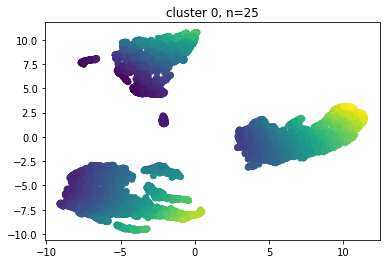

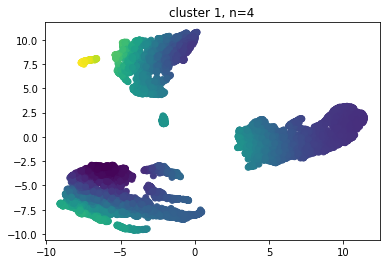

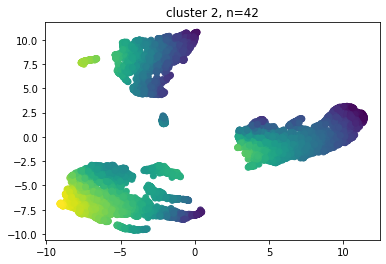

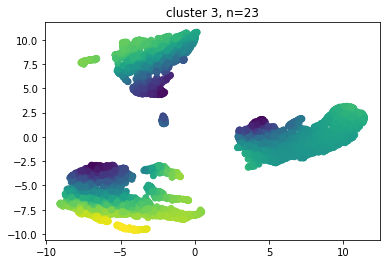

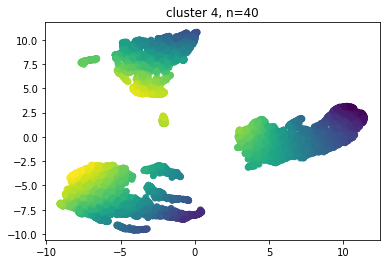

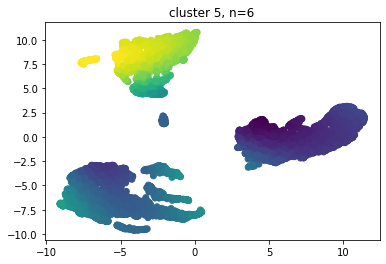

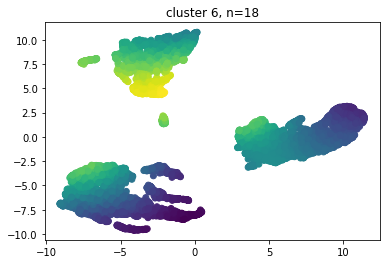

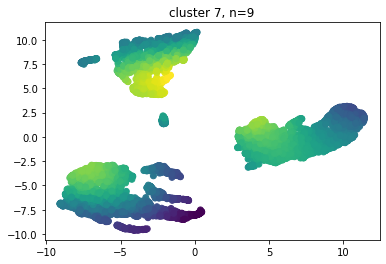

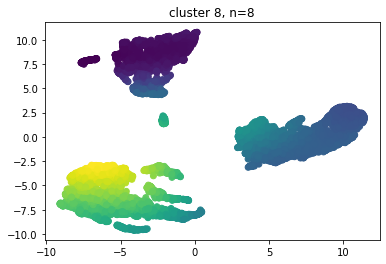

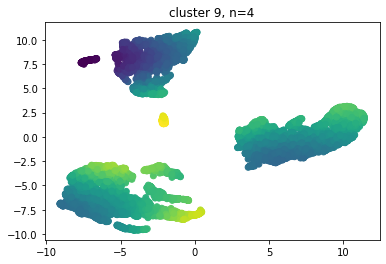

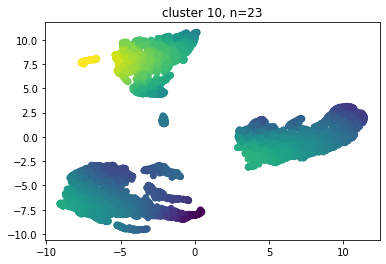

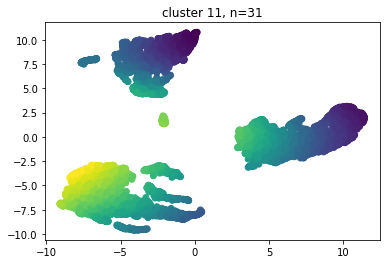

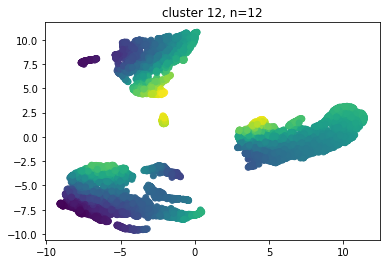

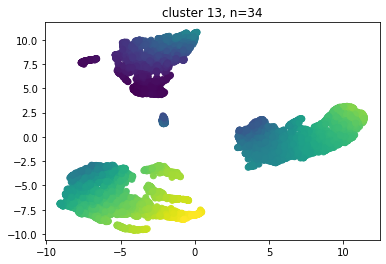

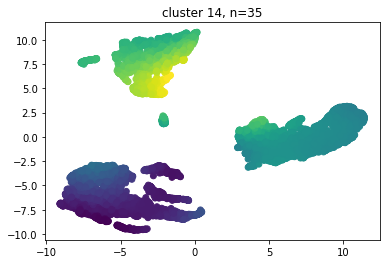

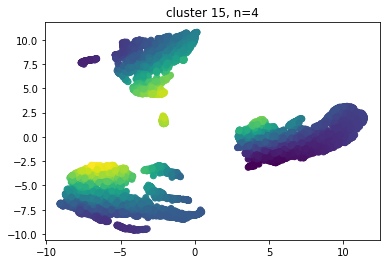

In [ ]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_umaps.values[:,0],df_umaps.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()

In [ ]:
# ENSG00000049247 = UTS2
# ENSG00000117569 = PTBP2
# ENSG00000132507 = EIF5A
# ENSG00000138767 = CNOT6L